# Capstone Project : Problem Statement(Eleckart E commerce)

##### The objective of this capstone project is to develop a data-driven Marketing Mix Model (MMM) for Eleckart's e-commerce platform. By analyzing a year's worth of sales data in relation to various marketing inputs (digital advertising, TV, print, promotions, and other channels), we will quantify the effectiveness of each lever. This analysis will serve as the foundation for our recommendations on how to best allocate Eleckart's marketing budget for the next year, with a focus on achieving optimal ROI and supporting overall business objectives.





# Our methodology for this project includes the following steps:

1) Library and Warning Management
2) Dataset Loading and Understanding
3) Data Cleaning and Preparation
4) KPI Feature Engineering
5) EDA and MMM Framework
6) Marketing Mix Model Building (Linear, Log, Multiplicative)
7) Conclusion

# Step 1: Library and Warning Management

In [4]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

In [5]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:0.3f}'.format)

# Step 2: Dataset Loading and Understanding

In [7]:
# Loading the dataset

consumer_elec = pd.read_csv(r"C:\Users\DELL\Downloads\ConsumerElectronics.csv", na_values=['\\N', ' '])
consumer_elec.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3419300926147000.000,3419300926147000.000,6400.000,1,NaN,NaN,COD,5,-1012991307785880064.000,-7791755829057349632.000,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1420830839915200.000,1420830839915200.000,6900.000,1,NaN,NaN,COD,7,-8990324579055120384.000,7335411490974310400.000,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2421912925714800.000,2421912925714800.000,1990.000,1,NaN,NaN,COD,10,-1040442942046599936.000,-7477687762286570496.000,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4416592101738400.000,4416592101738400.000,1690.000,1,NaN,NaN,Prepaid,4,-7604960843527140352.000,-5835931638776609792.000,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4419525153426400.000,4419525153426400.000,1618.000,1,NaN,NaN,Prepaid,6,2894557208345299968.000,534735360997241984.000,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3


In [8]:
consumer_elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648824 entries, 0 to 1648823
Data columns (total 20 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   fsn_id                           1648824 non-null  object 
 1   order_date                       1648824 non-null  object 
 2   Year                             1648824 non-null  int64  
 3   Month                            1648824 non-null  int64  
 4   order_id                         1648824 non-null  float64
 5   order_item_id                    1648824 non-null  float64
 6   gmv                              1643920 non-null  float64
 7   units                            1648824 non-null  int64  
 8   deliverybdays                    335852 non-null   float64
 9   deliverycdays                    335853 non-null   float64
 10  s1_fact.order_payment_type       1648824 non-null  object 
 11  sla                              1648824 non-null 

In [9]:
consumer_elec.describe()

,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,sla,cust_id,pincode,product_mrp,product_procurement_sla
count,1648824.000,1648824.000,1648824.000,1648824.000,1643920.000,1648824.000,335852.000,335853.000,1648824.000,1643920.000,1643920.000,1648824.000,1648824.000
mean,2015.519,6.586,2842444674146622.000,13756277530325592.000,2461.124,1.022,4.575,5.248,5.688,-7057686221886114.000,100212752554976384.000,4108.309,5.403
std,0.500,3.623,1269134332596894.250,55945981798631008.000,5618.842,0.254,3.383,12.521,2.983,5327063552104650752.000,5312978967974574080.000,8510.918,53.466
min,2015.000,1.000,76331515.000,108016495.000,0.000,1.000,-98.000,-5345.000,0.000,-9223350545281059840.000,-9221830354194010112.000,0.000,-1.000
25%,2015.000,3.000,1602588503969575.000,1606725138262300.000,340.000,1.000,3.000,3.000,4.000,-4616853753330214912.000,-4414802399060830208.000,799.000,1.000
50%,2016.000,6.000,2611824528743350.000,2619185472741150.000,750.000,1.000,4.000,5.000,6.000,-17380549602964150.000,124091127596468000.000,1599.000,2.000
75%,2016.000,10.000,3610613539366250.000,4397705931628400.000,1999.000,1.000,6.000,7.000,7.000,4603580472579527680.000,4786651404994039808.000,3499.000,3.000
max,2016.000,12.000,5395076790260600.000,300037347717704000.000,226947.000,50.000,238.000,278.000,1006.000,9223362162226820096.000,9222980202332239872.000,299999.000,1000.000


In [10]:
consumer_elec.shape

(1648824, 20)

In [11]:
# Checking for any missing data
consumer_elec.isnull().sum()

fsn_id                                   0
order_date                               0
Year                                     0
Month                                    0
order_id                                 0
order_item_id                            0
gmv                                   4904
units                                    0
deliverybdays                      1312972
deliverycdays                      1312971
s1_fact.order_payment_type               0
sla                                      0
cust_id                               4904
pincode                               4904
product_analytic_super_category          0
product_analytic_category                0
product_analytic_sub_category            0
product_analytic_vertical             5828
product_mrp                              0
product_procurement_sla                  0
dtype: int64

##

In [13]:
# Checking the columns of the dataset

consumer_elec.columns

Index(['fsn_id', 'order_date', 'Year', 'Month', 'order_id', 'order_item_id', 'gmv', 'units', 'deliverybdays', 'deliverycdays', 's1_fact.order_payment_type', 'sla', 'cust_id', 'pincode', 'product_analytic_super_category', 'product_analytic_category', 'product_analytic_sub_category', 'product_analytic_vertical', 'product_mrp', 'product_procurement_sla'], dtype='object')

In [14]:
# Checking the distribution to understand the dataset

consumer_elec.describe(percentiles = [0.25, 0.5, 0.75, 0.90, 0.99, 0.999])

,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,sla,cust_id,pincode,product_mrp,product_procurement_sla
count,1648824.000,1648824.000,1648824.000,1648824.000,1643920.000,1648824.000,335852.000,335853.000,1648824.000,1643920.000,1643920.000,1648824.000,1648824.000
mean,2015.519,6.586,2842444674146622.000,13756277530325592.000,2461.124,1.022,4.575,5.248,5.688,-7057686221886114.000,100212752554976384.000,4108.309,5.403
std,0.500,3.623,1269134332596894.250,55945981798631008.000,5618.842,0.254,3.383,12.521,2.983,5327063552104650752.000,5312978967974574080.000,8510.918,53.466
min,2015.000,1.000,76331515.000,108016495.000,0.000,1.000,-98.000,-5345.000,0.000,-9223350545281059840.000,-9221830354194010112.000,0.000,-1.000
25%,2015.000,3.000,1602588503969575.000,1606725138262300.000,340.000,1.000,3.000,3.000,4.000,-4616853753330214912.000,-4414802399060830208.000,799.000,1.000
50%,2016.000,6.000,2611824528743350.000,2619185472741150.000,750.000,1.000,4.000,5.000,6.000,-17380549602964150.000,124091127596468000.000,1599.000,2.000
75%,2016.000,10.000,3610613539366250.000,4397705931628400.000,1999.000,1.000,6.000,7.000,7.000,4603580472579527680.000,4786651404994039808.000,3499.000,3.000
90%,2016.000,11.000,4520541993801910.000,4561094519921880.000,4399.000,1.000,7.000,8.000,9.000,7380783103378041856.000,7346497166693510144.000,7120.000,5.000
99%,2016.000,12.000,4626530348261358.000,300037347714467776.000,30912.150,2.000,11.000,13.000,13.000,9040910900134359040.000,8999192351624340480.000,45990.000,13.000
99.9%,2016.000,12.000,4639920775381027.000,300037347717600000.000,44980.000,4.000,45.000,52.000,17.000,9205334333215547392.000,9205085774634370048.000,54950.000,1000.000


##### Despite the presence of a diverse array of variables encompassing e-commerce sales, product pricing, and logistics, the dataset necessitates further exploration and preprocessing to prepare it for effective modeling.The dataset appears to be well-rounded, containing a diverse set of variables related to e-commerce sales, product pricing, and logistics. However, several aspects of the data warrant further exploration and preprocessing before proceeding with modelling.

# Step 3: Data Cleaning and Preparation

In [17]:
#Removing the NaN's and \N's so that there are no empty points in the dataset

consumer_elec.replace(r'^\s+$', np.nan, regex=True, inplace = True)
#consumer_elec.replace('\\N', np.nan, inplace = True)

In [18]:
# Checking the null percentage for each column
round(100*(consumer_elec.isnull().sum()/len(consumer_elec.index)), 2)

fsn_id                             0.000
order_date                         0.000
Year                               0.000
Month                              0.000
order_id                           0.000
order_item_id                      0.000
gmv                                0.300
units                              0.000
deliverybdays                     79.630
deliverycdays                     79.630
s1_fact.order_payment_type         0.000
sla                                0.000
cust_id                            0.300
pincode                            0.300
product_analytic_super_category    0.000
product_analytic_category          0.000
product_analytic_sub_category      0.000
product_analytic_vertical          0.350
product_mrp                        0.000
product_procurement_sla            0.000
dtype: float64

In [19]:
# We can see that there are columns now which are empty as there were null values in it, now we are going to evaluate one by one
# Keeping only rows where GMV is not missing

consumer_elec = consumer_elec[consumer_elec['gmv'].notna()]


In [20]:
# Checking the null percentage for each column once again to make sure the missing percentages
round(100*(consumer_elec.isnull().sum()/len(consumer_elec.index)), 2)

fsn_id                             0.000
order_date                         0.000
Year                               0.000
Month                              0.000
order_id                           0.000
order_item_id                      0.000
gmv                                0.000
units                              0.000
deliverybdays                     79.570
deliverycdays                     79.570
s1_fact.order_payment_type         0.000
sla                                0.000
cust_id                            0.000
pincode                            0.000
product_analytic_super_category    0.000
product_analytic_category          0.000
product_analytic_sub_category      0.000
product_analytic_vertical          0.350
product_mrp                        0.000
product_procurement_sla            0.000
dtype: float64

#### We can se that the 'deliverybdays', 'deliverycdays' and 'product_analytic_vertical' are the ones having missing value and in the rows, let us inspect them to make the dataset clearer.

In [22]:
consumer_elec = consumer_elec[consumer_elec['product_analytic_vertical'].notna()]
consumer_elec['product_analytic_super_category'].unique()


array(['CE'], dtype=object)

##### We can see that there is only one unique value in the column so we can drop it as we wont be needing this in our analysis

In [24]:
consumer_elec.drop('product_analytic_super_category', axis=1, inplace=True)
consumer_elec.columns

Index(['fsn_id', 'order_date', 'Year', 'Month', 'order_id', 'order_item_id', 'gmv', 'units', 'deliverybdays', 'deliverycdays', 's1_fact.order_payment_type', 'sla', 'cust_id', 'pincode', 'product_analytic_category', 'product_analytic_sub_category', 'product_analytic_vertical', 'product_mrp', 'product_procurement_sla'], dtype='object')

##### Checking the products present in different category

In [26]:
consumer_elec.product_analytic_category.unique()

array(['CameraAccessory', 'GamingHardware', 'EntertainmentSmall',
       'GameCDDVD', 'Camera'], dtype=object)

In [27]:
consumer_elec.product_analytic_sub_category.unique()

array(['CameraAccessory', 'GamingAccessory', 'Speaker', 'HomeAudio',
       'CameraStorage', 'AmplifierReceiver', 'AudioMP3Player', 'Game',
       'Camera', 'GamingConsole', 'HomeTheatre', 'AudioAccessory',
       'TVVideoSmall', 'GameMembershipCards'], dtype=object)

In [28]:
#The three product sub categories for the MMM are - Camera Accessory, Home Audio and Gaming Accessory.
#Removing the rows with other sub categories as we dont clean the dataset as much as we can

consumer_elec = consumer_elec.loc[(consumer_elec.product_analytic_sub_category=='CameraAccessory') |
                       (consumer_elec.product_analytic_sub_category=='GamingAccessory')|
                       (consumer_elec.product_analytic_sub_category=='HomeAudio')]

In [29]:
#Checking the product assortment where the product belongs to

consumer_elec.product_analytic_vertical.unique()

array(['CameraTripod', 'Lens', 'CameraBag', 'Flash', 'CameraBattery',
       'CameraBatteryCharger', 'GamePad', 'GamingAccessoryKit',
       'GamingHeadset', 'GamingMemoryCard', 'MotionController',
       'GamingMouse', 'GamingAdapter', 'TVOutCableAccessory', 'GamingGun',
       'JoystickGamingWheel', 'HomeAudioSpeaker', 'CameraRemoteControl',
       'Binoculars', 'Filter', 'GamingMousePad', 'Strap',
       'GamingKeyboard', 'Dock', 'SlingBox', 'GamingSpeaker',
       'CoolingPad', 'BoomBox', 'CameraBatteryGrip', 'CameraAccessory',
       'CameraFilmRolls', 'CameraMount', 'DockingStation', 'DJController',
       'ExtensionTube', 'FMRadio', 'HiFiSystem', 'KaraokePlayer',
       'Telescope', 'VoiceRecorder', 'GamingChargingStation',
       'CameraEyeCup', 'GameControlMount', 'SoundMixer', 'CameraLEDLight',
       'CameraMicrophone', 'FlashShoeAdapter', 'Softbox',
       'ReflectorUmbrella', 'Teleconverter', 'CameraHousing'],
      dtype=object)

In [30]:
# Let us check and convert the GMV - Gross Merchendising Value to undetstand better

consumer_elec['gmv'] = pd.to_numeric(consumer_elec['gmv'])
consumer_elec.gmv.unique()

array([6400., 6900., 1990., ..., 4487., 4909., 5487.])

In [31]:
#Checking the minimum and maximum values of GMV
print(consumer_elec.gmv.min())
print(consumer_elec.gmv.max())

0.0
148050.0


## Insights
#### The GMV values range from 0.0 to 148050.0. 
#### While typically positive, the presence of 0.0 GMV warrants investigation. 
#### These instances could represent promotional items or free offers, providing valuable context despite not directly contributing to GMV. 
#### For now, we will retain these entries as they reflect actual transactions and could be useful for flagging zero-value events later. We will also briefly check for potential duplicates.


In [33]:
duplicates = consumer_elec[consumer_elec.duplicated(['fsn_id','order_date','order_id','order_item_id',
                               'gmv','cust_id','pincode',
                               'product_analytic_category','product_analytic_sub_category',
                               'product_analytic_vertical'])]
duplicates

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
76506,ACCE6YVWVHXXKCHW,2016-02-22 14:52:12,2016,2,3417290135521600.000,3417290135521600.000,350.000,1,7.000,8.000,Prepaid,8,-1070357817353149952.000,8456408856164330496.000,GamingHardware,GamingAccessory,JoystickGamingWheel,599,2
675305,ACCE7AV9TZHHAESC,2016-04-27 07:03:09,2016,4,2532857872757300.000,2532857872757300.000,4090.000,1,2.000,3.000,Prepaid,5,233114630667481984.000,-4071447699433639936.000,GamingHardware,GamingAccessory,GamePad,4990,2
944830,ACCDH7MFZJGRWJCW,2016-04-27 00:19:25,2016,4,3575842474884000.000,300037347717633984.000,287.000,1,5.000,6.000,Prepaid,5,8788006738130379776.000,2175163142166510080.000,GamingHardware,GamingAccessory,GamePad,410,1
944903,ACCDH7MFZJGRWJCW,2016-04-27 00:19:25,2016,4,3575842474884000.000,3575842474884000.000,287.000,1,NaN,NaN,Prepaid,7,8788006738130379776.000,2175163142166510080.000,GamingHardware,GamingAccessory,GamePad,410,1
969493,ACCE94WYZR6GFDFP,2016-04-27 00:33:53,2016,4,1569690464156100.000,1569690464156100.000,190.000,1,NaN,NaN,Prepaid,6,6615160307439460352.000,-7307608120567170048.000,CameraAccessory,CameraAccessory,Filter,380,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647201,VOREYV2HWZDUFZ9Y,2015-09-29 23:19:16,2015,9,4404040347013500.000,4404040347013500.000,5200.000,1,NaN,NaN,Prepaid,11,-8745173106362900480.000,3111585584864399872.000,EntertainmentSmall,HomeAudio,VoiceRecorder,10500,5
1647202,VOREYV2HWZDUFZ9Y,2015-09-30 22:08:55,2015,9,2404860211262700.000,2404860211262700.000,5200.000,1,NaN,NaN,COD,10,-8903792869007869952.000,-5601647511496970240.000,EntertainmentSmall,HomeAudio,VoiceRecorder,10500,5
1647203,VOREYV2HWZDUFZ9Y,2015-09-06 22:14:34,2015,9,3381987673542980.000,300037347712641984.000,4299.000,1,NaN,NaN,COD,7,6097758079601179648.000,-5152522226055449600.000,EntertainmentSmall,HomeAudio,VoiceRecorder,10500,5
1647204,VOREYV2HWZDUFZ9Y,2015-09-11 16:11:52,2015,9,2388231540197500.000,300037347714801984.000,4599.000,1,NaN,NaN,COD,7,2831220753928549888.000,3607820238384010240.000,EntertainmentSmall,HomeAudio,VoiceRecorder,10500,5


###### There are 37355 rows which are duplicated, the best way is to remove them to tighten our dataset!

In [35]:
consumer_elec.drop_duplicates(subset=['fsn_id','order_date','order_id','order_item_id',
                                 'gmv','cust_id','pincode',
                                 'product_analytic_category','product_analytic_sub_category',
                                 'product_analytic_vertical'], inplace=True)
consumer_elec.shape

(527240, 19)

In [36]:
#Checking for missing data in columns once again
consumer_elec.isnull().sum()

fsn_id                                0
order_date                            0
Year                                  0
Month                                 0
order_id                              0
order_item_id                         0
gmv                                   0
units                                 0
deliverybdays                    410026
deliverycdays                    410026
s1_fact.order_payment_type            0
sla                                   0
cust_id                               0
pincode                               0
product_analytic_category             0
product_analytic_sub_category         0
product_analytic_vertical             0
product_mrp                           0
product_procurement_sla               0
dtype: int64

##### We can still see that the dataset has missing values in 'deliverybdays' and 'deliverycdays'. Let us see how can we manage them

In [38]:
# The columns deliverybdays and deliverycdays are populated with \N, which is incorrect.In order to solve it, we need to replace them with null.
print(consumer_elec.deliverybdays.isnull().sum()/len(consumer_elec))
print(consumer_elec.deliverycdays.isnull().sum()/len(consumer_elec))

0.7776837872695547
0.7776837872695547


In [39]:
# We can drop delivercdays and deliverybdays column as it has 77% null values, wont serve any purpose
consumer_elec.drop(['deliverybdays', 'deliverycdays'],axis=1, inplace = True)
len(consumer_elec.columns)

17

In [40]:
#Moving to 'order_date' column and check for datatype and nulls and manage them

consumer_elec['order_date'] = pd.to_datetime(consumer_elec['order_date'])
len(consumer_elec.order_date.unique())

460448

##### As mentioned in the dataset, we need to use the data from July 2015 to June 2016. We will make a quick check of such data and make sure our dataset tightens going forward!

In [42]:
consumer_elec.loc[(consumer_elec.order_date < '2015-07-01') | (consumer_elec.order_date >= '2016-07-01')]

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
1071934,ACCCX3SGRHSRGTHZ,2016-07-01 01:07:36,2016,7,1611380362751500.000,1611380362751500.000,9999.000,1,COD,6,-6062166819020010496.000,8011106654138590208.000,CameraAccessory,CameraAccessory,Lens,19500,2
1074944,ACCD6HEGVCDHXPNQ,2016-07-03 16:12:47,2016,7,2602425887006100.000,2602425887006100.000,399.000,1,COD,6,2872406203167170048.000,-7543985763413010432.000,GamingHardware,GamingAccessory,GamePad,449,-1
1077916,ACCDFZEJAXVJDGS7,2016-07-01 01:03:17,2016,7,4611922526101700.000,4611922526101700.000,3699.000,1,Prepaid,2,-2126839628533280000.000,-3973362991373910016.000,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,5290,-1
1080123,ACCDHQ8N6DGBYGKZ,2016-07-02 07:04:29,2016,7,3612045698494600.000,3612045698494600.000,949.000,1,COD,1,1164936338609760000.000,2370358404467279872.000,CameraAccessory,CameraAccessory,CameraTripod,1499,2
1082641,ACCDPYBFTPE5PRGT,2016-07-02 06:49:00,2016,7,4609992565256700.000,4609992565256700.000,1050.000,1,Prepaid,1,-9069302869700119552.000,4705607051154690048.000,GamingHardware,GamingAccessory,GamingHeadset,1792,1
1084813,ACCDTKPGAUZZAW8P,2016-07-02 07:03:53,2016,7,3612078345378800.000,3612078345378800.000,539.000,1,COD,2,6590091415862979584.000,-813320379369053952.000,GamingHardware,GamingAccessory,GamePad,899,5
1085073,ACCDTREV54TU7YFE,2016-07-02 05:59:50,2016,7,3611050099412000.000,3611050099412000.000,799.000,1,COD,1,-508659332183723008.000,-8102905572291919872.000,GamingHardware,GamingAccessory,GamingMouse,1370,0
1087591,ACCDXU57QZHYSZNA,2016-07-02 05:34:22,2016,7,3611850198933800.000,3611850198933800.000,1210.000,1,COD,10,-3662618871881310208.000,6513330541343979520.000,CameraAccessory,CameraAccessory,CameraBatteryCharger,4000,3
1087961,ACCDY8HPXWX5DXN4,2016-07-02 04:06:18,2016,7,2610195893966200.000,2610195893966200.000,1499.000,1,Prepaid,3,-1243774602492379904.000,2175163142166510080.000,CameraAccessory,CameraAccessory,Binoculars,1750,-1
1094153,ACCE4VG8A49WEZYZ,2016-07-01 00:52:19,2016,7,1610894669670000.000,1610894669670000.000,245.000,1,COD,5,9025925231496659968.000,-1272045286567840000.000,CameraAccessory,CameraAccessory,CameraTripod,1261,1


In [43]:
# Let us delete the data beyond this time period

consumer_elec = consumer_elec.loc[(consumer_elec.order_date >= '2015-07-01')]
consumer_elec = consumer_elec.loc[(consumer_elec.order_date < '2016-07-01')]

In [44]:
consumer_elec.order_date.unique()

<DatetimeArray>
['2015-10-17 15:11:54', '2015-10-19 10:07:22', '2015-10-20 15:45:56', '2015-10-14 12:05:15', '2015-10-17 21:25:03', '2015-10-17 12:07:24', '2015-10-16 14:59:57', '2015-10-15 23:41:39', '2015-10-25 22:52:34', '2015-10-19 09:37:06',
 ...
 '2015-09-13 10:39:31', '2015-09-27 18:03:31', '2015-09-07 23:25:57', '2015-09-14 11:48:49', '2015-09-14 19:32:39', '2015-09-17 15:49:29', '2015-09-29 23:19:16', '2015-09-06 22:14:34', '2015-09-11 16:11:52', '2015-09-22 10:25:36']
Length: 460252, dtype: datetime64[ns]

In [45]:
#Changing the name of the column s1_fact.order_payment_type
consumer_elec.rename(columns={'s1_fact.order_payment_type':'order_payment_type'}, inplace=True)
consumer_elec.columns

Index(['fsn_id', 'order_date', 'Year', 'Month', 'order_id', 'order_item_id', 'gmv', 'units', 'order_payment_type', 'sla', 'cust_id', 'pincode', 'product_analytic_category', 'product_analytic_sub_category', 'product_analytic_vertical', 'product_mrp', 'product_procurement_sla'], dtype='object')

###### Upon reviweing, we can say that dropping 'cust_id' and 'pincode' would be the best move as they are identifiers and won't contribute to our analysis or modeling.



In [47]:
consumer_elec.drop(['cust_id', 'pincode'], axis=1, inplace=True)

In [48]:
consumer_elec.columns

Index(['fsn_id', 'order_date', 'Year', 'Month', 'order_id', 'order_item_id', 'gmv', 'units', 'order_payment_type', 'sla', 'product_analytic_category', 'product_analytic_sub_category', 'product_analytic_vertical', 'product_mrp', 'product_procurement_sla'], dtype='object')

In [49]:
#Checking the prouduct_mrp column
consumer_elec[(consumer_elec.product_mrp == 0)].head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
12807,ACCDGXGZQUGHFYHT,2015-10-23 19:26:01,2015,10,1424634732111000.000,1424634732111000.000,3500.000,1,COD,5,GamingHardware,GamingAccessory,GamingAccessoryKit,0,-1
15031,ACCDHHZZGFBDPJRP,2015-10-20 21:27:29,2015,10,3422117911872300.000,3422117911872300.000,690.000,1,Prepaid,6,CameraAccessory,CameraAccessory,CameraBattery,0,-1
15032,ACCDHHZZGFBDPJRP,2015-10-28 23:49:41,2015,10,2429116502765100.000,2429116502765100.000,690.000,1,COD,8,CameraAccessory,CameraAccessory,CameraBattery,0,-1
15529,ACCDHTZ4CZCECAFF,2015-10-27 01:05:20,2015,10,1427429193266100.000,1427429193266100.000,1050.000,1,COD,7,CameraAccessory,CameraAccessory,CameraBattery,0,-1
16980,ACCDK94FSKCZBJCU,2015-10-28 18:36:07,2015,10,4428925467622000.000,4428925467622000.000,1099.000,1,Prepaid,6,EntertainmentSmall,HomeAudio,Dock,0,-1


In [50]:
len(consumer_elec[(consumer_elec.product_mrp == 0)])

3236

In [51]:
# Considering there is no way MRP could be zero, let us delete the 0 values as they may compromise viability the dataset

consumer_elec = consumer_elec[consumer_elec.product_mrp != 0]

In [52]:
len(consumer_elec.product_mrp.unique())

1385

In [53]:
#Let us understand the SLA and Procurement SLA columns

consumer_elec.sla.describe(percentiles=[0.0,0.25,0.5,0.75,0.9,0.95,0.99,1.0])

count   523804.000
mean         5.885
std          2.697
min          0.000
0%           0.000
25%          4.000
50%          6.000
75%          7.000
90%          9.000
95%         11.000
99%         14.000
100%        60.000
max         60.000
Name: sla, dtype: float64

In [54]:
consumer_elec.product_procurement_sla.describe(percentiles=[0.0,0.25,0.5,0.75,0.9,0.95,0.99,1.0])

count   523804.000
mean         2.560
std          1.715
min         -1.000
0%          -1.000
25%          2.000
50%          2.000
75%          3.000
90%          5.000
95%          5.000
99%          6.000
100%        15.000
max         15.000
Name: product_procurement_sla, dtype: float64

In [55]:
#Converting negative values to the positive
len(consumer_elec.loc[consumer_elec.product_procurement_sla<0])

10901

In [56]:
consumer_elec.product_procurement_sla = abs(consumer_elec.product_procurement_sla)
consumer_elec.sla.std()

2.6969113975705605

In [57]:
# In order for a tightened dataframe, we are defining the SLA

# Calculate upper and lower thresholds of the SLA's
upper = consumer_elec.sla.mean() + 3 * consumer_elec.sla.std()
lower = consumer_elec.sla.mean() - 3 * consumer_elec.sla.std()

# Filter out SLA outliers
consumer_elec = consumer_elec[(consumer_elec.sla >= lower) & (consumer_elec.sla <= upper)]


In [58]:
consumer_elec.product_procurement_sla.std()

1.642005330434586

In [59]:
# Similar to SLA, we are tightening the procurement SLA as well

upper = consumer_elec.product_procurement_sla.mean() + 3 * consumer_elec.product_procurement_sla.std()
lower = consumer_elec.product_procurement_sla.mean() - 3 * consumer_elec.product_procurement_sla.std()

# Filter out the outliers
consumer_elec = consumer_elec[(consumer_elec.product_procurement_sla >= lower) &
                    (consumer_elec.product_procurement_sla <= upper)]

In [60]:
consumer_elec.shape

(514516, 15)

In [61]:
# Checking for any other remaining duplicates

consumer_elec.loc[consumer_elec.duplicated()]

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla


In [62]:
len(consumer_elec[consumer_elec.duplicated(['order_id','order_item_id'])])

12339

###### We can still see that 12339 rows are duplicated for 'order_id' and 'order item_id'. Clearly there would not be two orders with the same combination of order id and order item id that were ordered at the same timestamp.
##### So, they are duplicates,and hence, we are dropping them.

In [64]:
consumer_elec = consumer_elec[~consumer_elec.duplicated(['order_id','order_item_id'])]

In [65]:
consumer_elec.shape

(502177, 15)

In [66]:
consumer_elec.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3419300926147000.000,3419300926147000.000,6400.000,1,COD,5,CameraAccessory,CameraAccessory,CameraTripod,7190,0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1420830839915200.000,1420830839915200.000,6900.000,1,COD,7,CameraAccessory,CameraAccessory,CameraTripod,7190,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2421912925714800.000,2421912925714800.000,1990.000,1,COD,10,CameraAccessory,CameraAccessory,CameraTripod,2099,3
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4416592101738400.000,4416592101738400.000,1690.000,1,Prepaid,4,CameraAccessory,CameraAccessory,CameraTripod,2099,3
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4419525153426400.000,4419525153426400.000,1618.000,1,Prepaid,6,CameraAccessory,CameraAccessory,CameraTripod,2099,3


# Step 4: KPI Feature EngineeringFeature Engineering - KPI Creation

###### KPI Creation: Generate Key Performance Indicators (KPIs) including Pricing, Discount/Promotion, Product-Quality, Seasonality-Trend, Net-Promoter Score/Stock, Advertisement, and Marketing. These KPIs will be used for visualization and to derive insights in the subsequent steps.

###### Climate Data Integration: Utilize climate data to engineer relevant features to understand and account for its potential effects.

###### Marketing Mix Segmentation: Create specific marketing mixes tailored to the following product subcategories:

###### Camera Accessory
###### Home Audio
###### Gaming Accessory
###### This segmentation will facilitate easier and more focused modeling after the Exploratory Data Analysis (EDA) phase

In [69]:
# Pricing KPI - Listed Price

# Let us derive the listing price, which is nothing but gmv/units

consumer_elec['listing_price'] = round((consumer_elec.gmv/consumer_elec.units),2)
len(consumer_elec.listing_price.value_counts())

6065

In [70]:
#Let's check if there are any rows with listing price > MRP

len(consumer_elec.loc[consumer_elec.listing_price>consumer_elec.product_mrp])

12251

##### We can see that there is a chunk of data representing pricing anomaly, we would be saving this data in a separate column as we dont want to miss out on any data by deleting it. There would be no loss of transactional variety — especially important in market mix modeling, where every product pulse matters.

In [72]:
# Storing this anomaly in another column

consumer_elec['listing_gt_mrp_flag'] = (consumer_elec.listing_price > consumer_elec.product_mrp).astype(int)
consumer_elec.listing_gt_mrp_flag.value_counts()

listing_gt_mrp_flag
0    489926
1     12251
Name: count, dtype: int64

In [73]:
# Let's now calculate the discount %, which is nothing but (mrp-list price)/mrp

consumer_elec['discount'] = round(((consumer_elec.product_mrp - consumer_elec.listing_price)/(consumer_elec.product_mrp)),2)
consumer_elec['discount'].describe()

count   502177.000
mean         0.445
std          0.251
min         -7.040
25%          0.260
50%          0.460
75%          0.630
max          1.000
Name: discount, dtype: float64

In [74]:
# We can see that there's a negative value present in the min, let us convert it into positive

# Capping negative discount values to 0
consumer_elec['discount'] = consumer_elec['discount'].clip(lower=0)

In [75]:
consumer_elec['discount'].describe()

count   502177.000
mean         0.449
std          0.242
min          0.000
25%          0.260
50%          0.460
75%          0.630
max          1.000
Name: discount, dtype: float64

In [76]:
# That looks better that the minimum value is sorted. Let us set up the order
# item value metric so that we can use them in EDA

consumer_elec['Order_Item_Value'] = consumer_elec['product_mrp'] * consumer_elec['units']
consumer_elec['Order_Item_Value'].value_counts()

Order_Item_Value
800      20572
999      18550
1999     18526
950      14580
599      14060
         ...  
3465         1
18280        1
18690        1
13499        1
3341         1
Name: count, Length: 1641, dtype: int64

In [77]:
consumer_elec.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,listing_price,listing_gt_mrp_flag,discount,Order_Item_Value
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3419300926147000.000,3419300926147000.000,6400.000,1,COD,5,CameraAccessory,CameraAccessory,CameraTripod,7190,0,6400.000,0,0.110,7190
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1420830839915200.000,1420830839915200.000,6900.000,1,COD,7,CameraAccessory,CameraAccessory,CameraTripod,7190,0,6900.000,0,0.040,7190
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2421912925714800.000,2421912925714800.000,1990.000,1,COD,10,CameraAccessory,CameraAccessory,CameraTripod,2099,3,1990.000,0,0.050,2099
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4416592101738400.000,4416592101738400.000,1690.000,1,Prepaid,4,CameraAccessory,CameraAccessory,CameraTripod,2099,3,1690.000,0,0.190,2099
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4419525153426400.000,4419525153426400.000,1618.000,1,Prepaid,6,CameraAccessory,CameraAccessory,CameraTripod,2099,3,1618.000,0,0.230,2099


In [78]:
# We are mapping the week into the dataset as continuous week counter starting from July 1, 2015, to the end of June 2016,
consumer_elec['week'] = np.where(
    consumer_elec.Year == 2015,
    (consumer_elec.order_date.dt.isocalendar().week - pd.to_datetime('2015-07-01').isocalendar().week + 1),
    consumer_elec.order_date.dt.isocalendar().week + 27
)


In [79]:
# Product - Quality KPI
# Payment type

# Prepaid = '1' or COD = '0'
consumer_elec['order_payment_type'] = np.where(consumer_elec['order_payment_type'] == "Prepaid",1,0)

In [80]:
# Seasonality- Trend KPI

# Calendar

### Creating Calendar for the period
calendar = pd.DataFrame(pd.date_range('2015-07-01','2016-06-30'), columns=['Date'])

### Mapping week in the calendar using isocalendar
calendar['week'] = calendar['Date'].dt.isocalendar().week

### Adjust Jan 2016 to be week 54+
calendar['week'] = np.where(
    (calendar['week'] <= 26) & (calendar['Date'].dt.year == 2016),
    calendar['week'] + 53,
    calendar['week']
)

In [81]:
# Special Sales

# List of special sales dates
special_sales_list = pd.to_datetime([
    "2015-07-18","2015-07-19","2015-08-15","2015-08-16","2015-08-17",
    "2015-08-28","2015-08-29","2015-08-30","2015-10-15","2015-10-16",
    "2015-10-17","2015-11-07","2015-11-08","2015-11-09","2015-11-10",
    "2015-11-11","2015-11-12","2015-11-13","2015-11-14","2015-12-25",
    "2015-12-26","2015-12-27","2015-12-28","2015-12-29","2015-12-30",
    "2015-12-31","2016-01-01","2016-01-02","2016-01-03","2016-01-20",
    "2016-01-21","2016-01-22","2016-02-01","2016-02-02","2016-02-14",
    "2016-02-15","2016-02-20","2016-02-21","2016-03-07","2016-03-08",
    "2016-03-09","2016-05-25","2016-05-26","2016-05-27"
])

# Flagging special sales days in calendar
calendar['Special_sales'] = calendar['Date'].isin(special_sales_list).astype(int)


In [82]:
# Payday

calendar['Payday'] = calendar['Date'].dt.day.isin([1, 15]).astype(int)

###### Now we are loading the climate data to prepare more features

In [84]:

ontario_climate_2015=pd.read_excel(r"C:\Users\DELL\Downloads\ONTARIO-2015.xlsx", skiprows=24)
ontario_climate_2016=pd.read_excel(r"C:\Users\DELL\Downloads\ONTARIO-2016.xlsx", skiprows=24)

In [85]:
ontario_climate_2015.head()

,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),Mean Temp Flag,Heat Deg Days (°C),Heat Deg Days Flag,Cool Deg Days (°C),Cool Deg Days Flag,Total Rain (mm),Total Rain Flag,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,2015-01-01,2015,1,1,†,0.000,NaN,-8.500,NaN,-4.300,NaN,22.300,NaN,0.000,NaN,0.000,NaN,0.000,NaN,0.000,NaN,0.000,NaN,NaN,NaN,NaN,NaN
1,2015-01-02,2015,1,2,†,3.000,NaN,-3.000,NaN,0.000,NaN,18.000,NaN,0.000,NaN,0.000,NaN,0.000,NaN,0.000,NaN,0.000,NaN,NaN,NaN,NaN,NaN
2,2015-01-03,2015,1,3,†,2.500,NaN,-4.000,NaN,-0.800,NaN,18.800,NaN,0.000,NaN,24.000,NaN,0.000,NaN,24.000,NaN,0.000,NaN,NaN,NaN,NaN,NaN
3,2015-01-04,2015,1,4,†,2.500,NaN,0.000,NaN,1.300,NaN,16.700,NaN,0.000,NaN,0.000,NaN,1.000,NaN,1.000,NaN,0.000,NaN,NaN,NaN,NaN,NaN
4,2015-01-05,2015,1,5,†,-10.000,NaN,-13.500,NaN,-11.800,NaN,29.800,NaN,0.000,NaN,0.000,NaN,3.000,NaN,3.000,NaN,1.000,NaN,NaN,NaN,NaN,NaN


In [86]:
ontario_climate_2016.head()

,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),Mean Temp Flag,Heat Deg Days (°C),Heat Deg Days Flag,Cool Deg Days (°C),Cool Deg Days Flag,Total Rain (mm),Total Rain Flag,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,2016-01-01,2016,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-02,2016,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-03,2016,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-04,2016,1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-05,2016,1,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
### Merging Calendar with dataset on week

ontario_climate = pd.concat([ontario_climate_2015, ontario_climate_2016], ignore_index=True)
ontario_climate.head()

,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),Mean Temp Flag,Heat Deg Days (°C),Heat Deg Days Flag,Cool Deg Days (°C),Cool Deg Days Flag,Total Rain (mm),Total Rain Flag,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,2015-01-01,2015,1,1,†,0.000,NaN,-8.500,NaN,-4.300,NaN,22.300,NaN,0.000,NaN,0.000,NaN,0.000,NaN,0.000,NaN,0.000,NaN,NaN,NaN,NaN,NaN
1,2015-01-02,2015,1,2,†,3.000,NaN,-3.000,NaN,0.000,NaN,18.000,NaN,0.000,NaN,0.000,NaN,0.000,NaN,0.000,NaN,0.000,NaN,NaN,NaN,NaN,NaN
2,2015-01-03,2015,1,3,†,2.500,NaN,-4.000,NaN,-0.800,NaN,18.800,NaN,0.000,NaN,24.000,NaN,0.000,NaN,24.000,NaN,0.000,NaN,NaN,NaN,NaN,NaN
3,2015-01-04,2015,1,4,†,2.500,NaN,0.000,NaN,1.300,NaN,16.700,NaN,0.000,NaN,0.000,NaN,1.000,NaN,1.000,NaN,0.000,NaN,NaN,NaN,NaN,NaN
4,2015-01-05,2015,1,5,†,-10.000,NaN,-13.500,NaN,-11.800,NaN,29.800,NaN,0.000,NaN,0.000,NaN,3.000,NaN,3.000,NaN,1.000,NaN,NaN,NaN,NaN,NaN


In [88]:
### Checking for nan values

round((ontario_climate.isnull().sum()/len(ontario_climate.index))*100,2)

Date/Time                     0.000
Year                          0.000
Month                         0.000
Day                           0.000
Data Quality                 37.620
Max Temp (°C)                39.530
Max Temp Flag                98.080
Min Temp (°C)                44.050
Min Temp Flag                93.570
Mean Temp (°C)               44.050
Mean Temp Flag               93.570
Heat Deg Days (°C)           44.050
Heat Deg Days Flag           93.570
Cool Deg Days (°C)           44.050
Cool Deg Days Flag           93.570
Total Rain (mm)              37.620
Total Rain Flag              98.630
Total Snow (cm)              37.620
Total Snow Flag              97.810
Total Precip (mm)            37.620
Total Precip Flag            97.400
Snow on Grnd (cm)            37.620
Snow on Grnd Flag            98.910
Dir of Max Gust (10s deg)   100.000
Dir of Max Gust Flag        100.000
Spd of Max Gust (km/h)      100.000
Spd of Max Gust Flag        100.000
dtype: float64

In [89]:
### Dropping columns as they are filled with NaN and not needed for the analysis.
ontario_climate.drop(['Data Quality','Max Temp Flag','Min Temp Flag','Mean Temp Flag',
                      'Heat Deg Days Flag','Cool Deg Days Flag','Total Rain Flag','Total Snow Flag',
                      'Total Precip Flag','Snow on Grnd Flag','Dir of Max Gust (10s deg)','Dir of Max Gust Flag',
                      'Spd of Max Gust (km/h)','Spd of Max Gust Flag'], axis = 1, inplace = True)

In [90]:
ontario_climate.columns

Index(['Date/Time', 'Year', 'Month', 'Day', 'Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)', 'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)', 'Snow on Grnd (cm)'], dtype='object')

In [91]:
### Keeping Climate data from July 15 to June 16

ontario_climate=ontario_climate[(ontario_climate['Month'] >= 7) & (ontario_climate['Year'] == 2015)
                               |(ontario_climate['Month'] <= 6) & (ontario_climate['Year'] == 2016)]

In [92]:
ontario_climate.rename(columns={'Date/Time': 'Date'}, inplace=True)
ontario_climate.head(2)

,Date,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
181,2015-07-01,2015,7,1,24.500,17.000,20.800,0.000,2.800,0.000,0.000,0.000,0.000
182,2015-07-02,2015,7,2,24.000,14.000,19.000,0.000,1.000,0.000,0.000,0.000,0.000


In [93]:
ontario_climate['Date'] = pd.to_datetime(ontario_climate['Date'])

In [94]:
ontario_climate['Date'] = pd.to_datetime(ontario_climate['Date'])
ontario_climate['week'] = ontario_climate['Date'].dt.isocalendar().week
ontario_climate['week'] = np.where((ontario_climate['week'] <= 26) & (ontario_climate['Year'] == 2016), ontario_climate['week'] + 53, ontario_climate['week'])
ontario_climate = ontario_climate.reset_index(drop=True)

In [95]:
ontario_climate.head(2)

,Date,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),week
0,2015-07-01,2015,7,1,24.500,17.000,20.800,0.000,2.800,0.000,0.000,0.000,0.000,27
1,2015-07-02,2015,7,2,24.000,14.000,19.000,0.000,1.000,0.000,0.000,0.000,0.000,27


In [96]:
### Checking for any more nan values

round((ontario_climate.isnull().sum()/len(ontario_climate.index))*100,2)

Date                  0.000
Year                  0.000
Month                 0.000
Day                   0.000
Max Temp (°C)        43.170
Min Temp (°C)        47.810
Mean Temp (°C)       47.810
Heat Deg Days (°C)   47.810
Cool Deg Days (°C)   47.810
Total Rain (mm)      41.260
Total Snow (cm)      41.260
Total Precip (mm)    41.260
Snow on Grnd (cm)    41.260
week                  0.000
dtype: float64

In [97]:
# We cannot drop these columns as they are needed for our feature preparation.
# We are going to impute them with mean value so that the dataset is balanced

### Replacing Nan with mean value
ontario_climate['Max Temp (°C)'] = ontario_climate['Max Temp (°C)'].fillna(ontario_climate['Max Temp (°C)'].mean())
ontario_climate['Min Temp (°C)'] = ontario_climate['Min Temp (°C)'].fillna(ontario_climate['Min Temp (°C)'].mean())
ontario_climate['Mean Temp (°C)'] = ontario_climate['Mean Temp (°C)'].fillna(ontario_climate['Mean Temp (°C)'].mean())
ontario_climate['Heat Deg Days (°C)'] = ontario_climate['Heat Deg Days (°C)'].fillna(ontario_climate['Heat Deg Days (°C)'].mean())
ontario_climate['Cool Deg Days (°C)'] = ontario_climate['Cool Deg Days (°C)'].fillna(ontario_climate['Cool Deg Days (°C)'].mean())
ontario_climate['Total Rain (mm)'] = ontario_climate['Total Rain (mm)'].fillna(ontario_climate['Total Rain (mm)'].mean())
ontario_climate['Total Snow (cm)'] = ontario_climate['Total Snow (cm)'].fillna(ontario_climate['Total Snow (cm)'].mean())
ontario_climate['Total Precip (mm)'] = ontario_climate['Total Precip (mm)'].fillna(ontario_climate['Total Precip (mm)'].mean())
ontario_climate['sSnow on Grnd (cm)'] = ontario_climate['Snow on Grnd (cm)'].fillna(ontario_climate['Snow on Grnd (cm)'].mean())

In [98]:
ontario_climate.head()

,Date,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),week,sSnow on Grnd (cm)
0,2015-07-01,2015,7,1,24.500,17.000,20.800,0.000,2.800,0.000,0.000,0.000,0.000,27,0.000
1,2015-07-02,2015,7,2,24.000,14.000,19.000,0.000,1.000,0.000,0.000,0.000,0.000,27,0.000
2,2015-07-03,2015,7,3,25.000,10.000,17.500,0.500,0.000,0.000,0.000,0.000,0.000,27,0.000
3,2015-07-04,2015,7,4,26.000,11.000,18.500,0.000,0.500,0.000,0.000,0.000,0.000,27,0.000
4,2015-07-05,2015,7,5,28.000,14.000,21.000,0.000,3.000,0.000,0.000,0.000,0.000,27,0.000


In [99]:
# Net-Promoter Score/Stock KPI
nps_score = pd.read_excel(r"C:\Users\DELL\Downloads\Media data and other information.xlsx", sheet_name='Monthly NPS Score', skiprows=0)
nps_score.head()

,DT,July'15,Aug'15,Sept'15,Oct'15,Nov'15,Dec'15,Jan'16,Feb'16,Mar'16,Apr'16,May'16,June'16
0,NPS,54.600,59.987,46.925,44.398,47.000,45.800,47.093,50.327,49.021,51.828,47.307,50.517
1,Stock Index,1177.000,1206.000,1101.000,1210.000,1233.000,1038.000,1052.000,1222.000,1015.000,1242.000,1228.000,1194.000


In [100]:
### Transforming NPS and Stock_index
nps_score = nps_score.T.reset_index(drop=True)
nps_score.columns = ['NPS','Stock_Index']
nps_score = nps_score.drop(nps_score.index[[0]]).reset_index(drop=True)

In [101]:
### Adding Month and Year
nps_score['Month'] = pd.Series([7,8,9,10,11,12,1,2,3,4,5,6])
nps_score['Year'] = pd.Series([2015,2015,2015,2015,2015,2015,2016,2016,2016,2016,2016,2016])

In [102]:
nps_score['NPS'] = nps_score['NPS'].astype(float)
nps_score['Stock_Index'] = nps_score['Stock_Index'].astype(float)

In [103]:
nps_score.head()

,NPS,Stock_Index,Month,Year
0,54.600,1177.000,7,2015
1,59.987,1206.000,8,2015
2,46.925,1101.000,9,2015
3,44.398,1210.000,10,2015
4,47.000,1233.000,11,2015


In [104]:
# Mapping the ontario_climate and nps_score to the calendar

calendar = calendar.merge(ontario_climate, how='left').merge(nps_score, how='left')
calendar.head()

,Date,week,Special_sales,Payday,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),sSnow on Grnd (cm),NPS,Stock_Index
0,2015-07-01,27,0,1,2015,7,1,24.500,17.000,20.800,0.000,2.800,0.000,0.000,0.000,0.000,0.000,54.600,1177.000
1,2015-07-02,27,0,0,2015,7,2,24.000,14.000,19.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,54.600,1177.000
2,2015-07-03,27,0,0,2015,7,3,25.000,10.000,17.500,0.500,0.000,0.000,0.000,0.000,0.000,0.000,54.600,1177.000
3,2015-07-04,27,0,0,2015,7,4,26.000,11.000,18.500,0.000,0.500,0.000,0.000,0.000,0.000,0.000,54.600,1177.000
4,2015-07-05,27,0,0,2015,7,5,28.000,14.000,21.000,0.000,3.000,0.000,0.000,0.000,0.000,0.000,54.600,1177.000


In [105]:
# First, calculate ISO week using isocalendar().week
calendar['week'] = np.where(
    calendar['Date'].dt.year == 2015,
    calendar['Date'].dt.isocalendar().week - pd.to_datetime('2015-07-01').isocalendar().week + 1,
    calendar['Date'].dt.isocalendar().week + 27
)

# Adjust week 80 (from Jan 1, 2016) to 27
calendar['week'] = np.where(
    (calendar['Date'].dt.year == 2016) & (calendar['week'] == 80),
    27,
    calendar['week']
)
calendar.head()

,Date,week,Special_sales,Payday,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),sSnow on Grnd (cm),NPS,Stock_Index
0,2015-07-01,1,0,1,2015,7,1,24.500,17.000,20.800,0.000,2.800,0.000,0.000,0.000,0.000,0.000,54.600,1177.000
1,2015-07-02,1,0,0,2015,7,2,24.000,14.000,19.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,54.600,1177.000
2,2015-07-03,1,0,0,2015,7,3,25.000,10.000,17.500,0.500,0.000,0.000,0.000,0.000,0.000,0.000,54.600,1177.000
3,2015-07-04,1,0,0,2015,7,4,26.000,11.000,18.500,0.000,0.500,0.000,0.000,0.000,0.000,0.000,54.600,1177.000
4,2015-07-05,1,0,0,2015,7,5,28.000,14.000,21.000,0.000,3.000,0.000,0.000,0.000,0.000,0.000,54.600,1177.000


In [106]:
# Aggregating weekly metrics by taking the mean of relevant climate, marketing, and financial indicators

# Drop duplicate or misnamed columns if needed
calendar = calendar.drop(columns=['sSnow on Grnd (cm)'], errors='ignore')

cols_to_avg = [
    'NPS', 'Stock_Index', 'Special_sales', 'Payday',
    'Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)',
    'Heat Deg Days (°C)', 'Cool Deg Days (°C)',
    'Total Rain (mm)', 'Total Snow (cm)',
    'Total Precip (mm)', 'Snow on Grnd (cm)'
]

# Weekly aggregation of climate, event, and performance indicators
calendar= calendar.groupby('week')[cols_to_avg].mean().reset_index()

In [107]:
calendar.reset_index(inplace = True)

In [108]:
calendar.head()

,index,week,NPS,Stock_Index,Special_sales,Payday,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
0,0,1,54.600,1177.000,0.000,0.200,25.500,13.200,19.360,0.100,1.460,0.000,0.000,0.000,0.000
1,1,2,54.600,1177.000,0.000,0.000,24.025,14.385,19.263,1.059,2.322,4.155,0.029,4.184,0.000
2,2,3,54.600,1177.000,0.286,0.143,27.383,16.314,21.906,0.816,4.722,1.569,0.029,1.598,0.000
3,3,4,54.600,1177.000,0.000,0.000,28.240,14.342,20.540,1.632,4.172,1.141,0.029,1.170,0.000
4,4,5,56.139,1185.286,0.000,0.143,29.811,16.242,23.092,0.816,5.908,4.341,0.029,4.370,0.000


In [109]:
#Marketing KPI

# Reading Marketing Investment Dataset
marketing = pd.read_excel(r"C:\Users\DELL\Downloads\Media data and other information.xlsx", sheet_name='Media Investment', skipfooter = 4, skiprows=2)
marketing.head()

,Unnamed: 0,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,NaN,2015,7,17.062,0.215,2.533,7.414,0.001,1.327,0.547,5.024,NaN,NaN
1,NaN,2015,8,5.064,0.006,1.278,1.063,0.000,0.129,0.074,2.514,NaN,NaN
2,NaN,2015,9,96.254,3.880,1.357,62.788,0.610,16.380,5.038,6.202,NaN,NaN
3,NaN,2015,10,170.156,6.145,12.622,84.673,3.444,24.372,6.974,31.927,NaN,NaN
4,NaN,2015,11,51.216,4.221,1.275,14.172,0.169,19.562,6.596,5.222,NaN,NaN


In [110]:
# We need to tidy up the dataset by removing unnecessary columns

marketing = marketing.drop(columns='Unnamed: 0').fillna(0)
marketing.columns

Index(['Year', 'Month', 'Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing', ' Affiliates', 'SEM', 'Radio', 'Other'], dtype='object')

In [111]:
marketing.head()

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,2015,7,17.062,0.215,2.533,7.414,0.001,1.327,0.547,5.024,0.000,0.000
1,2015,8,5.064,0.006,1.278,1.063,0.000,0.129,0.074,2.514,0.000,0.000
2,2015,9,96.254,3.880,1.357,62.788,0.610,16.380,5.038,6.202,0.000,0.000
3,2015,10,170.156,6.145,12.622,84.673,3.444,24.372,6.974,31.927,0.000,0.000
4,2015,11,51.216,4.221,1.275,14.172,0.169,19.562,6.596,5.222,0.000,0.000


In [112]:
# Assuming 'Year' and 'Month' columns are present
marketing['Date'] = pd.to_datetime(marketing[['Year', 'Month']].astype(str).agg('-'.join, axis=1), format='%Y-%m')

# Set the 'Date' column as the index
marketing.set_index('Date', inplace=True)

# Now you can perform the resampling
marketing['Total Investment'] /= marketing.resample('MS')['Total Investment'].transform('size')
marketing['TV'] /= marketing.resample('MS')['TV'].transform('size')
marketing['Digital'] /= marketing.resample('MS')['Digital'].transform('size')
marketing['Sponsorship'] /= marketing.resample('MS')['Sponsorship'].transform('size')
marketing['Content Marketing'] /= marketing.resample('MS')['Content Marketing'].transform('size')
marketing['Online marketing'] /= marketing.resample('MS')['Online marketing'].transform('size')
marketing[' Affiliates'] /= marketing.resample('MS')[' Affiliates'].transform('size')
marketing['SEM'] /= marketing.resample('MS')['SEM'].transform('size')
marketing['Radio'] /= marketing.resample('MS')['Radio'].transform('size')
marketing['Other'] /= marketing.resample('MS')['Other'].transform('size')


In [113]:
marketing.head()

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
Date,,,,,,,,,,,,
2015-07-01,2015,7,17.062,0.215,2.533,7.414,0.001,1.327,0.547,5.024,0.000,0.000
2015-08-01,2015,8,5.064,0.006,1.278,1.063,0.000,0.129,0.074,2.514,0.000,0.000
2015-09-01,2015,9,96.254,3.880,1.357,62.788,0.610,16.380,5.038,6.202,0.000,0.000
2015-10-01,2015,10,170.156,6.145,12.622,84.673,3.444,24.372,6.974,31.927,0.000,0.000
2015-11-01,2015,11,51.216,4.221,1.275,14.172,0.169,19.562,6.596,5.222,0.000,0.000


In [114]:
# Adstock

def adstocked_advertising(adstock_rate=0.5, advertising=marketing['Total Investment']):
    """
    This function applies the Adstock effect to advertising data using the given adstock rate.

    Parameters:
    - adstock_rate: The rate at which the previous period's advertising influences the current period.
    - advertising: The series or column of advertising data to apply the adstock effect on.

    Returns:
    - adstocked_advertising: The series with the Adstock applied.
    """
    # Initialize an empty list to store adstocked values
    adstocked_advertising = [advertising.iloc[0]]  # Starting with the first value as it is

    # Apply adstock effect iteratively over the data
    for i in range(1, len(advertising)):
        adstocked_value = advertising.iloc[i] + adstock_rate * adstocked_advertising[i-1]
        adstocked_advertising.append(adstocked_value)

    return pd.Series(adstocked_advertising, index=advertising.index)

# Example usage
marketing['Adstocked_Advertising'] = adstocked_advertising(adstock_rate=0.5)

In [115]:
adstock = pd.DataFrame()

In [116]:
adstock['TV_ads'] = adstocked_advertising(adstock_rate=0.5, advertising = marketing['TV'])

adstock['Digital_ads'] = adstocked_advertising(adstock_rate=0.5, advertising = marketing['Digital'])

adstock['Sponsorship_ads'] = adstocked_advertising(adstock_rate=0.5, advertising = marketing['Sponsorship'])

adstock['Content_marketing_ads'] = adstocked_advertising(adstock_rate=0.5, advertising = marketing['Content Marketing'])

adstock['Online_marketing_ads'] = adstocked_advertising(adstock_rate=0.5, advertising = marketing['Online marketing'])

adstock['Affiliates_ads'] = adstocked_advertising(adstock_rate=0.5, advertising = marketing[' Affiliates'])

adstock['SEM_ads'] = adstocked_advertising(adstock_rate=0.5, advertising = marketing['SEM'])

adstock['Radio_ads'] = adstocked_advertising(adstock_rate=0.5, advertising = marketing['Radio'])

adstock['Other_ads'] = adstocked_advertising(adstock_rate=0.5, advertising = marketing['Other'])

In [117]:
adstock.head()

,TV_ads,Digital_ads,Sponsorship_ads,Content_marketing_ads,Online_marketing_ads,Affiliates_ads,SEM_ads,Radio_ads,Other_ads
Date,,,,,,,,,
2015-07-01,0.215,2.533,7.414,0.001,1.327,0.547,5.024,0.000,0.000
2015-08-01,0.114,2.545,4.770,0.000,0.793,0.347,5.025,0.000,0.000
2015-09-01,3.937,2.629,65.173,0.611,16.776,5.212,8.715,0.000,0.000
2015-10-01,8.113,13.937,117.259,3.749,32.760,9.580,36.284,0.000,0.000
2015-11-01,8.277,8.244,72.802,2.043,35.942,11.386,23.364,0.000,0.000


In [118]:
# Mapping Marketing and Adstock

marketing = pd.concat([marketing,adstock] ,axis=1)
marketing.head()

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other,Adstocked_Advertising,TV_ads,Digital_ads,Sponsorship_ads,Content_marketing_ads,Online_marketing_ads,Affiliates_ads,SEM_ads,Radio_ads,Other_ads
Date,,,,,,,,,,,,,,,,,,,,,,
2015-07-01,2015,7,17.062,0.215,2.533,7.414,0.001,1.327,0.547,5.024,0.000,0.000,17.062,0.215,2.533,7.414,0.001,1.327,0.547,5.024,0.000,0.000
2015-08-01,2015,8,5.064,0.006,1.278,1.063,0.000,0.129,0.074,2.514,0.000,0.000,13.595,0.114,2.545,4.770,0.000,0.793,0.347,5.025,0.000,0.000
2015-09-01,2015,9,96.254,3.880,1.357,62.788,0.610,16.380,5.038,6.202,0.000,0.000,103.052,3.937,2.629,65.173,0.611,16.776,5.212,8.715,0.000,0.000
2015-10-01,2015,10,170.156,6.145,12.622,84.673,3.444,24.372,6.974,31.927,0.000,0.000,221.682,8.113,13.937,117.259,3.749,32.760,9.580,36.284,0.000,0.000
2015-11-01,2015,11,51.216,4.221,1.275,14.172,0.169,19.562,6.596,5.222,0.000,0.000,162.057,8.277,8.244,72.802,2.043,35.942,11.386,23.364,0.000,0.000


In [119]:
# Checking the premiumness of the products

# The premium-ness of the product depends on the MRP. Higher the MRP, more premium is the product.
# Let's check the percentiles of MRP in the dataset.

consumer_elec.product_mrp.describe(percentiles=[0.25,0.5,0.75,0.8,0.9,0.95,0.99])

count   502177.000
mean      2293.732
std       3512.383
min         63.000
25%        766.000
50%       1200.000
75%       2750.000
80%       3001.000
90%       5399.000
95%       6990.000
99%      16959.000
max     180000.000
Name: product_mrp, dtype: float64

In [120]:
# Calculate 90th percentile of MRP for premium products
premium_mrp_threshold = consumer_elec['product_mrp'].quantile(0.9)

# Filter the dataframe to focus on relevant columns and aggregate data
prod_cat = consumer_elec.groupby('product_analytic_vertical').agg(
    units_sold=('units', 'sum'),
    avg_mrp=('product_mrp', 'mean'),
    total_gmv=('gmv', 'sum')
).reset_index()

# Add a column indicating if the product is premium based on MRP (marking with 1 or 0)
prod_cat['premium_product'] = np.where(prod_cat['avg_mrp'] > premium_mrp_threshold, 1, 0)

# Display the updated dataframe
prod_cat.head()

,product_analytic_vertical,units_sold,avg_mrp,total_gmv,premium_product
0,Binoculars,13343,3229.428,26894133.500,0
1,BoomBox,2461,3955.280,7937618.000,0
2,CameraAccessory,1979,1041.719,1282167.000,0
3,CameraBag,15482,2159.235,21625771.000,0
4,CameraBattery,34963,1306.140,21394529.508,0


In [121]:
# Getting the Key stats for the premium products

premium_prod_cat = prod_cat.loc[prod_cat.premium_product == 1]
print(premium_prod_cat.describe())

       units_sold   avg_mrp   total_gmv  premium_product
count       7.000     7.000       7.000            7.000
mean      188.429 11849.145 1021291.571            1.000
std       386.189  5578.981 1602759.259            0.000
min         1.000  5841.197   15299.000            1.000
25%         2.500  7335.333   18305.500            1.000
50%         4.000 12000.000   23500.000            1.000
75%       129.500 14971.077 1481065.500            1.000
max      1050.000 20490.000 4111500.000            1.000


In [122]:
# Renaming the columns for clarity (if necessary)
prod_cat.rename(columns={'units_sold': 'units', 'avg_mrp': 'product_mrp', 'total_gmv': 'gmv'}, inplace=True)

# Now let's get the premium and non-premium product categories
premium_prod_cat = prod_cat.loc[prod_cat.premium_product == 1]
non_premium_prod_cat = prod_cat.loc[prod_cat.premium_product == 0]

# Calculate means for premium and non-premium products
print("Premium Product Mean Values:")
print(premium_prod_cat[['gmv', 'units', 'product_mrp']].mean())

print("\nNon-Premium Product Mean Values:")
print(non_premium_prod_cat[['gmv', 'units', 'product_mrp']].mean())


Premium Product Mean Values:
gmv           1021291.571
units             188.429
product_mrp     11849.145
dtype: float64

Non-Premium Product Mean Values:
gmv           14590619.585
units            11660.159
product_mrp       2164.106
dtype: float64


In [123]:
# Merging prod_cat and the consumer eletronics dataset

consumer_elec = consumer_elec.merge(prod_cat[['product_analytic_vertical', 'premium_product']],
         left_on='product_analytic_vertical', right_on='product_analytic_vertical',
         how='inner')

In [124]:
# Creating a copy of the consumer electronic dataset

sales_elec = consumer_elec.copy()

In [125]:
# Dropping the product_analytic_vertical in order to clean the redundancy as we have merged the premium product dataset

consumer_elec.drop(['product_analytic_vertical'], axis =1, inplace=True)
consumer_elec.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_mrp,product_procurement_sla,listing_price,listing_gt_mrp_flag,discount,Order_Item_Value,week,premium_product
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3419300926147000.000,3419300926147000.000,6400.000,1,0,5,CameraAccessory,CameraAccessory,7190,0,6400.000,0,0.110,7190,16,0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1420830839915200.000,1420830839915200.000,6900.000,1,0,7,CameraAccessory,CameraAccessory,7190,0,6900.000,0,0.040,7190,17,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2421912925714800.000,2421912925714800.000,1990.000,1,0,10,CameraAccessory,CameraAccessory,2099,3,1990.000,0,0.050,2099,17,0
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4416592101738400.000,4416592101738400.000,1690.000,1,1,4,CameraAccessory,CameraAccessory,2099,3,1690.000,0,0.190,2099,16,0
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4419525153426400.000,4419525153426400.000,1618.000,1,1,6,CameraAccessory,CameraAccessory,2099,3,1618.000,0,0.230,2099,16,0


In [126]:
consumer_elec.columns

Index(['fsn_id', 'order_date', 'Year', 'Month', 'order_id', 'order_item_id', 'gmv', 'units', 'order_payment_type', 'sla', 'product_analytic_category', 'product_analytic_sub_category', 'product_mrp', 'product_procurement_sla', 'listing_price', 'listing_gt_mrp_flag', 'discount', 'Order_Item_Value', 'week', 'premium_product'], dtype='object')

# Step 5: EDA and MMM Framework

In [128]:
consumer_elec.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_mrp,product_procurement_sla,listing_price,listing_gt_mrp_flag,discount,Order_Item_Value,week,premium_product
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3419300926147000.000,3419300926147000.000,6400.000,1,0,5,CameraAccessory,CameraAccessory,7190,0,6400.000,0,0.110,7190,16,0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1420830839915200.000,1420830839915200.000,6900.000,1,0,7,CameraAccessory,CameraAccessory,7190,0,6900.000,0,0.040,7190,17,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2421912925714800.000,2421912925714800.000,1990.000,1,0,10,CameraAccessory,CameraAccessory,2099,3,1990.000,0,0.050,2099,17,0
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4416592101738400.000,4416592101738400.000,1690.000,1,1,4,CameraAccessory,CameraAccessory,2099,3,1690.000,0,0.190,2099,16,0
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4419525153426400.000,4419525153426400.000,1618.000,1,1,6,CameraAccessory,CameraAccessory,2099,3,1618.000,0,0.230,2099,16,0


##### In order to deep dive, we would be dividing the dataset into numerical and categorical columns and then do some visualizations along with finding insights

In [130]:
# Separating numerical and categorical columns

numerical_cols = consumer_elec.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = consumer_elec.select_dtypes(include=['object', 'category']).columns

In [131]:
# Create separate DataFrames for numerical and categorical columns
numerical_data = consumer_elec[numerical_cols]
categorical_data = consumer_elec[categorical_cols]

In [132]:
print("Numerical Columns EDA:")
print(numerical_data.describe())

Numerical Columns EDA:
            Year      Month             order_id          order_item_id        gmv      units        sla  product_mrp  product_procurement_sla  listing_price   discount  Order_Item_Value
count 502177.000 502177.000           502177.000             502177.000 502177.000 502177.000 502177.000   502177.000               502177.000     502177.000 502177.000        502177.000
mean    2015.579      6.219 2839197015425605.500   9393481801950406.000   1292.644      1.024      5.782     2293.732                    2.521       1276.773      0.449          2326.091
std        0.494      3.671 1288137013582040.750  43691327311025008.000   2429.485      0.239      2.491     3512.383                    1.366       2412.915      0.242          3564.846
min     2015.000      1.000        162957597.000          207200079.000      0.000      1.000      0.000       63.000                    0.000          0.000      0.000            63.000
25%     2015.000      3.000 15972716948426

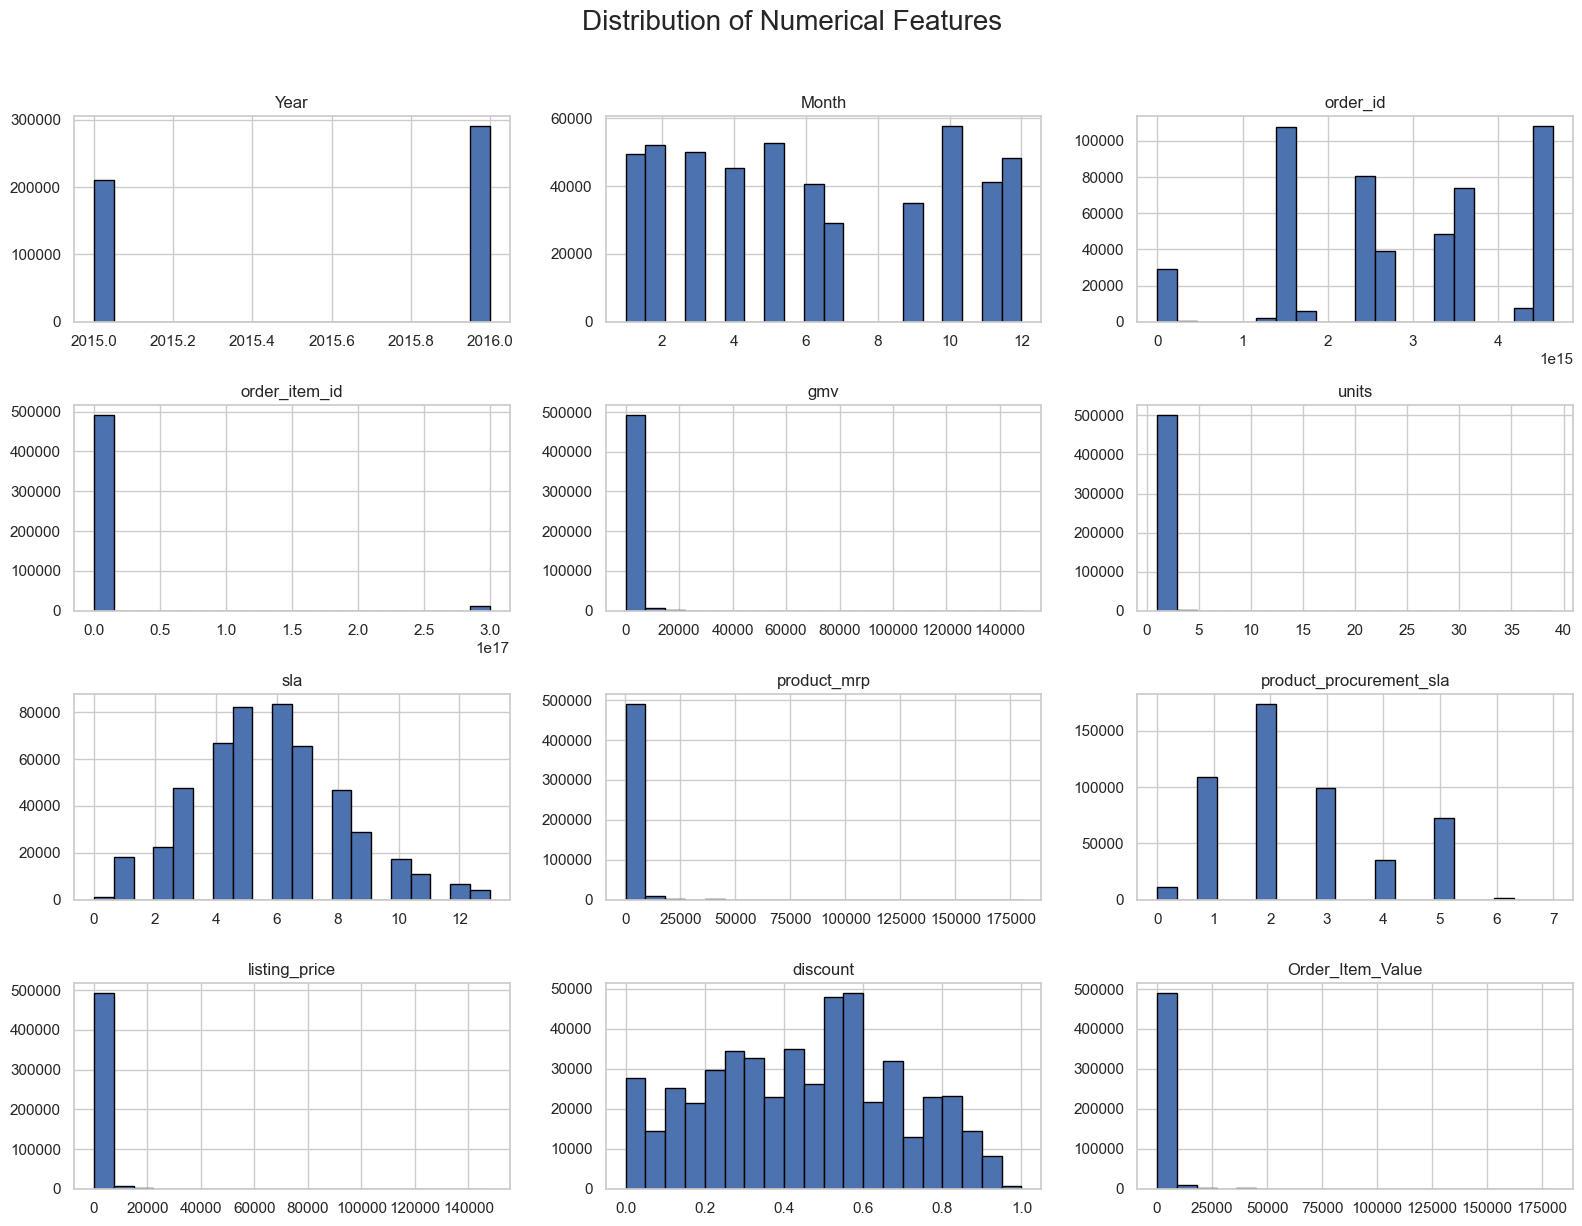

In [133]:
# Histograms for numerical data
sns.set(style="whitegrid")

# Plot histograms for each numerical column
numerical_data.hist(
    bins=20,
    figsize=(16, 12),
    edgecolor='black',
    color='#4c72b0'
)

# Add overall title with padding
plt.suptitle('Distribution of Numerical Features', fontsize=20, y=1.02)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

###### Insights

###### 1. Data Timeframe: The 'Year' histogram shows distinct bars around 2015.25, 2015.5, 2015.75, and 2016.0, with the tallest bar at 2016.0, suggesting a significant amount of data comes from the beginning of 2016.

###### 2. Order Size: Most orders seem to contain very few items. The 'order_item_id' histogram shows a very large concentration of values at the lowest point (likely representing orders with just one item), with counts dropping off sharply for subsequent values.

###### 3. Value Distribution: Financial values like 'gmv' (Gross Merchandise Value), 'listing_price', and 'Order_Item_Value' are heavily skewed to the right. This means that most items or orders have relatively low monetary values, while only a small number of items or orders have very high values.

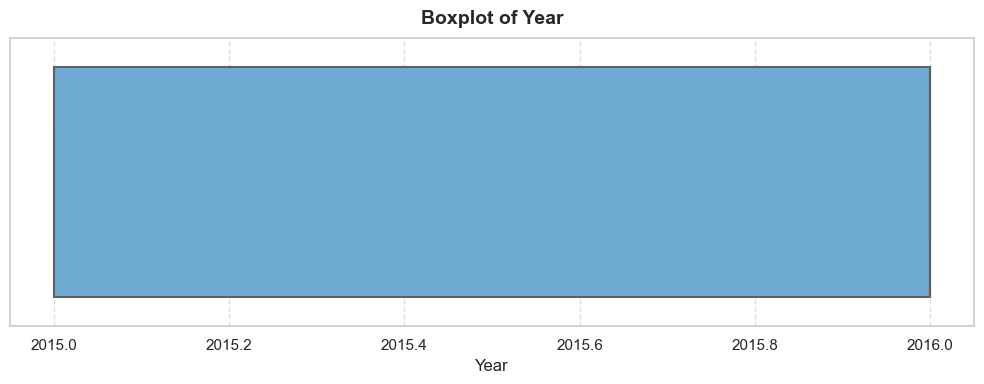

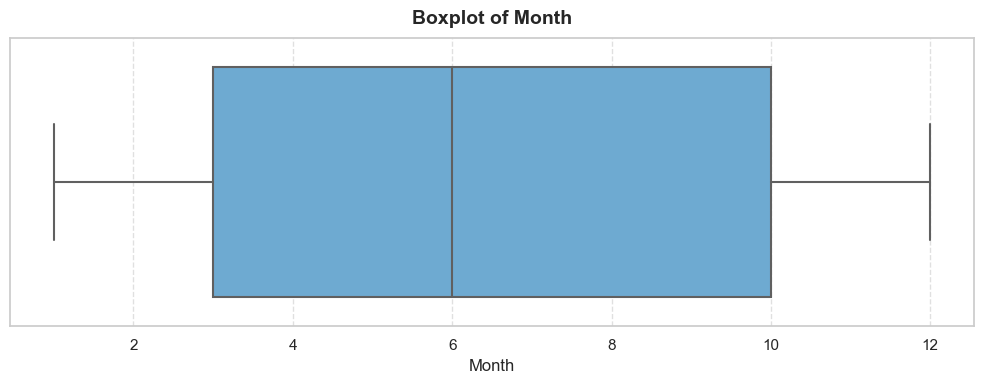

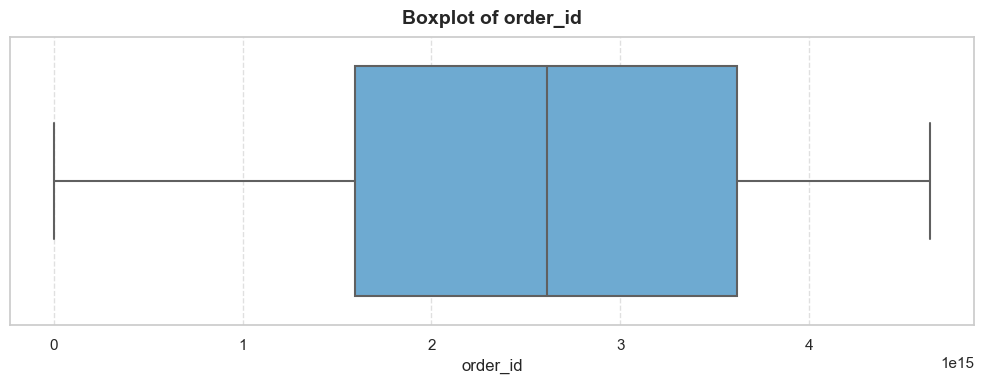

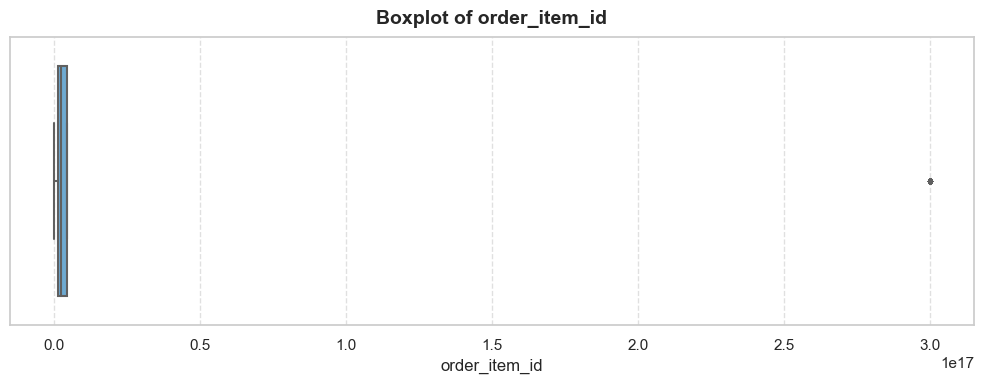

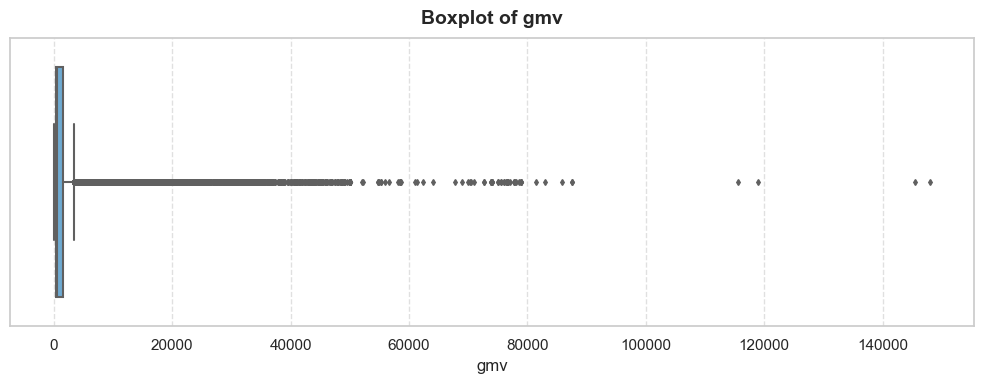

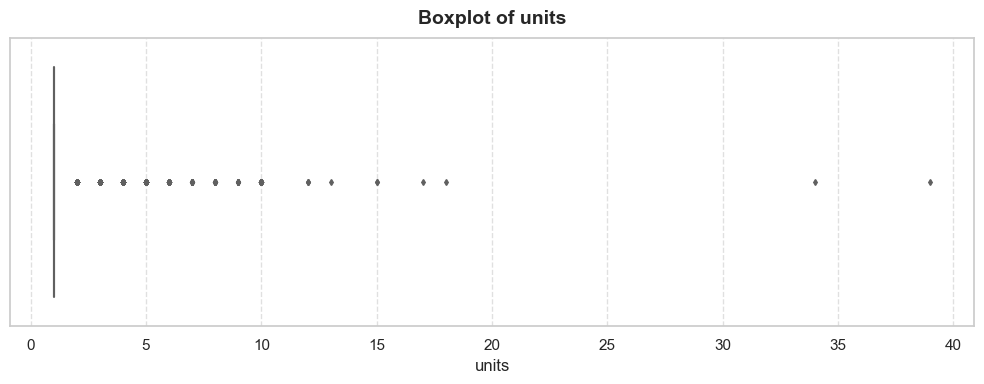

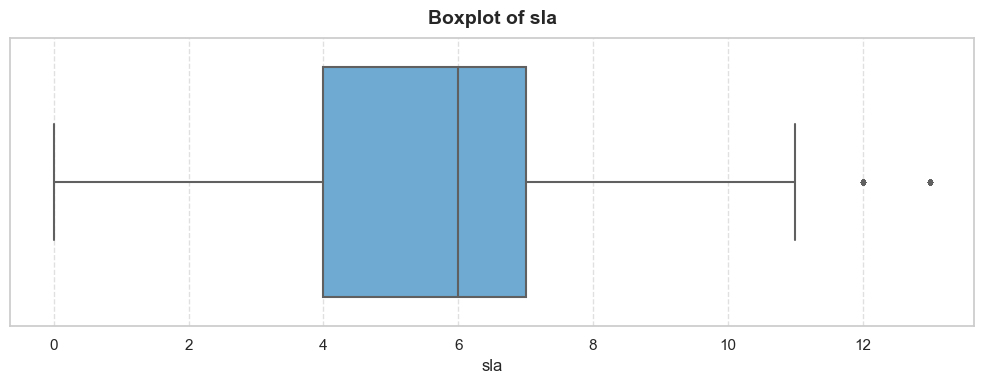

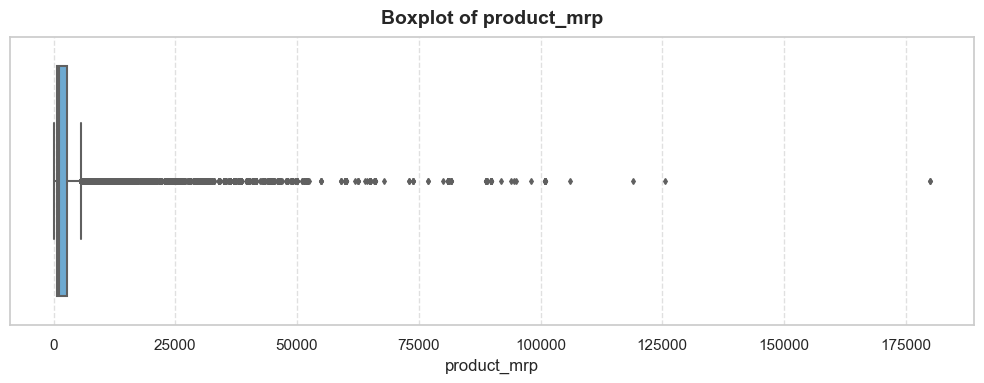

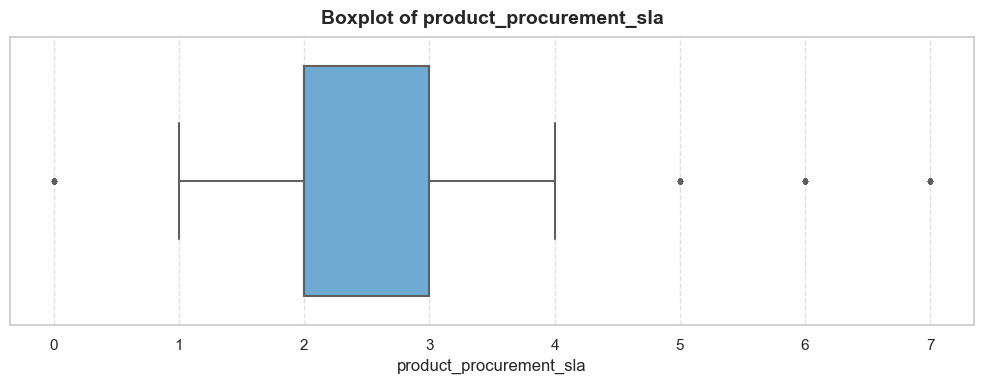

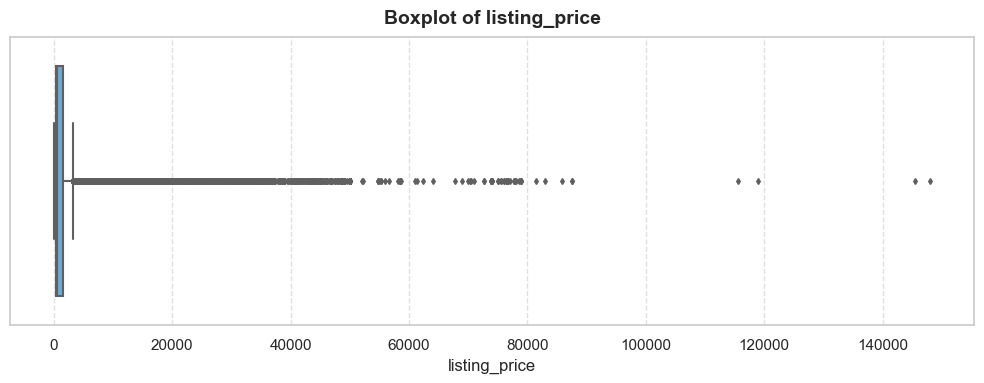

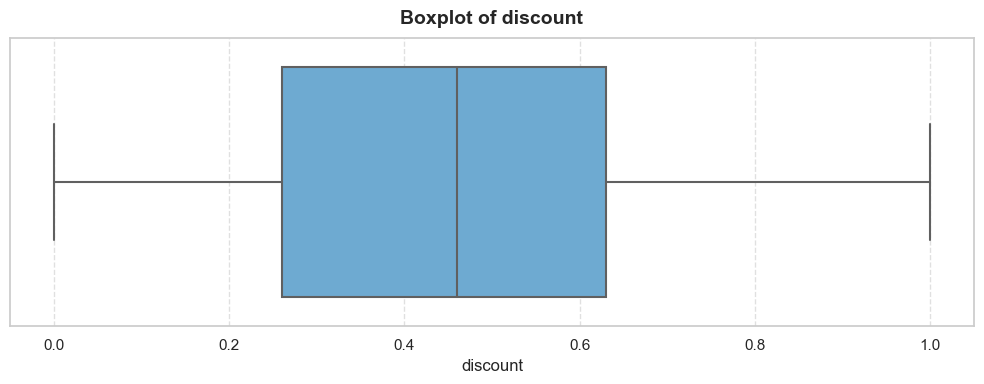

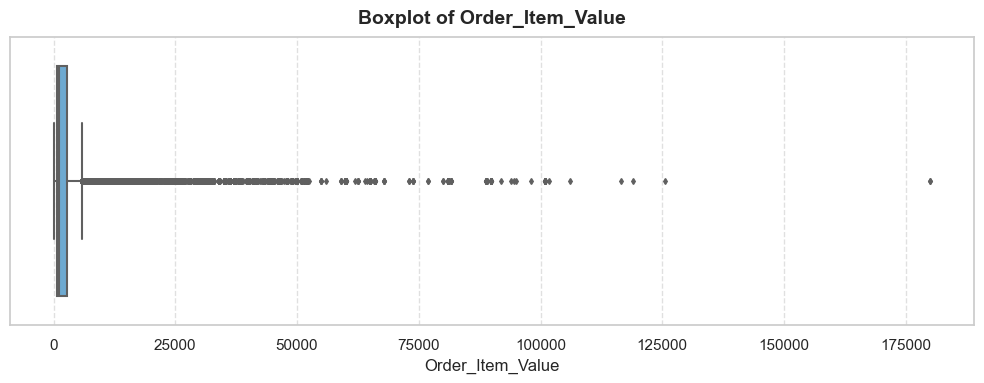

In [135]:
# Plot boxplots for all numerical columns

sns.set(style="whitegrid")

# Loop through each numerical column
for col in numerical_data.columns:
    plt.figure(figsize=(10, 4))  # Slightly wider and flatter for boxplots
    sns.boxplot(
        x=numerical_data[col],
        color='#5DADE2',
        linewidth=1.5,
        fliersize=3  # smaller size for outliers
    )
    plt.title(f'Boxplot of {col}', fontsize=14, weight='bold', pad=10)
    plt.xlabel(col, fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

##### Insights

###### 1. Unit boxplot shows a dataset with a very long right whisker and numerous outliers on the right side, indicating a positively skewed distribution with many high extreme values.

###### 2. The boxplot reveals a right-skewed distribution for 'gmv' with many outliers on the higher end, suggesting some significantly large values.

###### 3. This boxplot for 'order_item_id' shows almost all data concentrated at the lower end with a single, very large outlier.

In [137]:
#  Basic EDA on categorical columns

print("Categorical Columns EDA:")
# Count of unique values
print(categorical_data.nunique())

Categorical Columns EDA:
fsn_id                           8714
product_analytic_category           3
product_analytic_sub_category       3
week                               54
dtype: int64


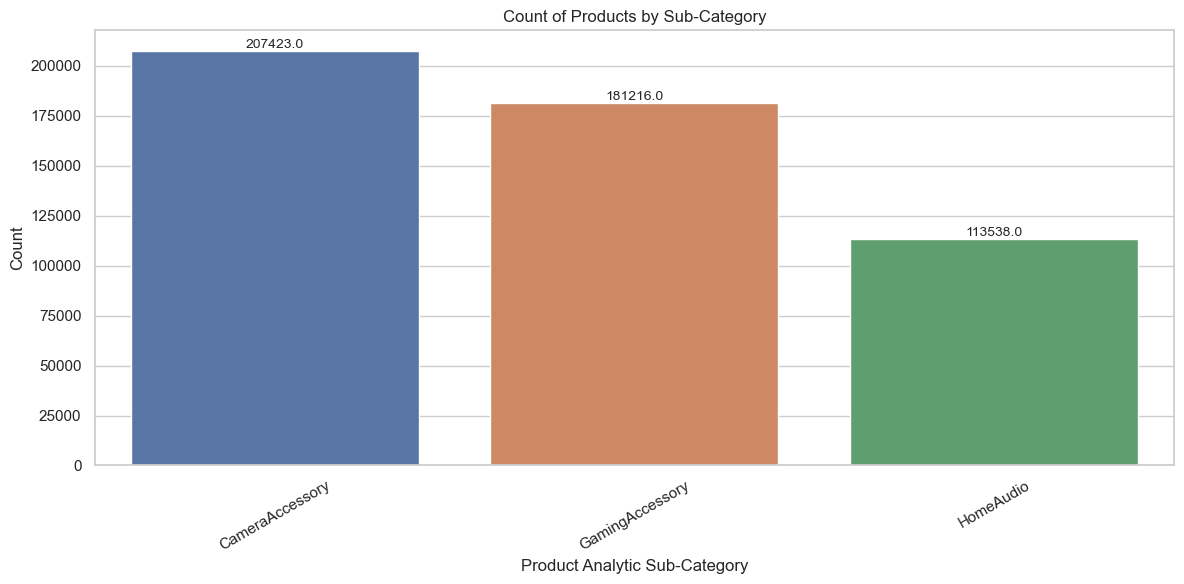

In [138]:
# To understand the subcategory of the products

plt.figure(figsize=(12, 6))  # Optional: adjust figure size for readability
ax= sns.countplot(x='product_analytic_sub_category', data=consumer_elec)
plt.title('Count of Products by Sub-Category')
plt.xlabel('Product Analytic Sub-Category')
plt.ylabel('Count')
plt.xticks(rotation=30)  # Rotate labels if categories are long
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()


In [139]:
# We had a column in consumer_elec which was left for flagging the listing price, let us try to visualize it

consumer_elec.listing_gt_mrp_flag.value_counts()

listing_gt_mrp_flag
0    489926
1     12251
Name: count, dtype: int64

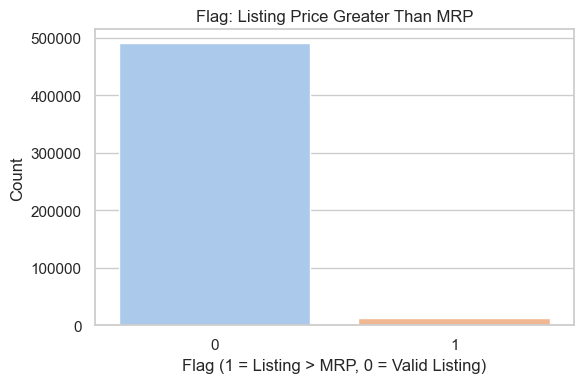

In [140]:
# Count plot for the flag

plt.figure(figsize=(6, 4))
sns.countplot(x='listing_gt_mrp_flag', data=consumer_elec, palette='pastel')
plt.title('Flag: Listing Price Greater Than MRP')
plt.xlabel('Flag (1 = Listing > MRP, 0 = Valid Listing)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

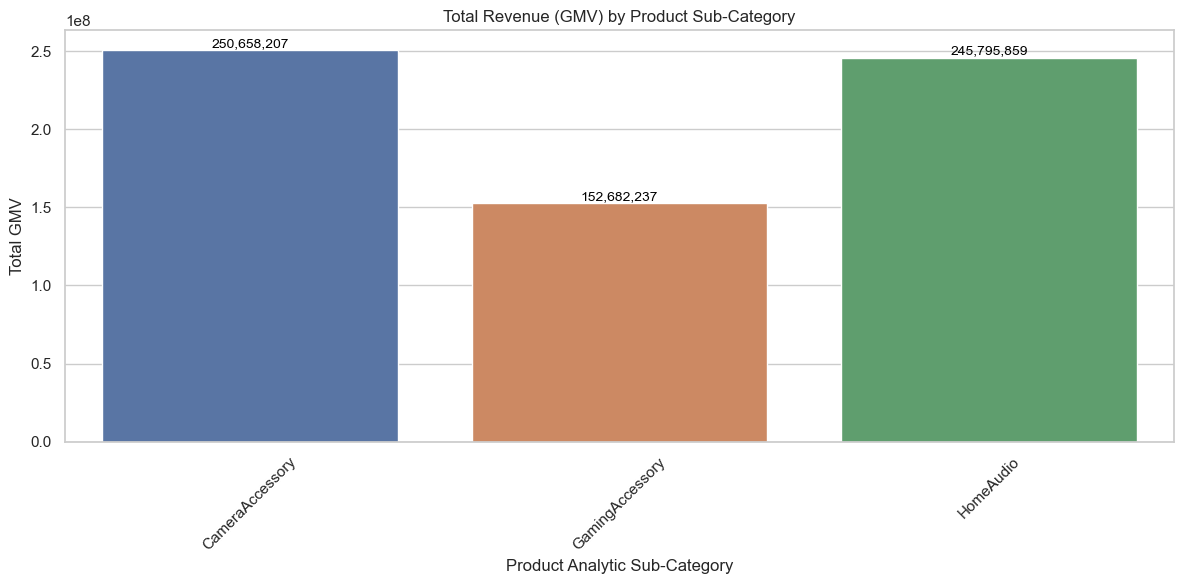

In [141]:
total_revenue_by_sub_category = consumer_elec.groupby('product_analytic_sub_category')['gmv'].sum().reset_index()
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='product_analytic_sub_category', y='gmv', data=total_revenue_by_sub_category)

plt.title('Total Revenue (GMV) by Product Sub-Category')
plt.xlabel('Product Analytic Sub-Category')
plt.ylabel('Total GMV')
plt.xticks(rotation=45)

# Add annotations
for p in ax.patches:
    value = p.get_height()
    ax.annotate(f'{value:,.0f}',  # Comma-separated format, no decimals
                (p.get_x() + p.get_width() / 2., value),
                ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

In [142]:
# Calculating the percentage of flagged listings

flag_percentage = (consumer_elec['listing_gt_mrp_flag'].value_counts(normalize=True)[1]) * 100
print(f"{flag_percentage:.2f}% of listings have a listing price greater than MRP.")

2.44% of listings have a listing price greater than MRP.


#### Pricing sanity check revealed that while the majority of product listings are within expected bounds, approximately X% have their listing price greater than the MRP, which is considered a red flag for potential pricing errors or system inconsistencies.

In [144]:
# Checking out the Ontario Climate data for visualization

ontario_climate.columns

Index(['Date', 'Year', 'Month', 'Day', 'Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)', 'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)', 'Snow on Grnd (cm)', 'week', 'sSnow on Grnd (cm)'], dtype='object')

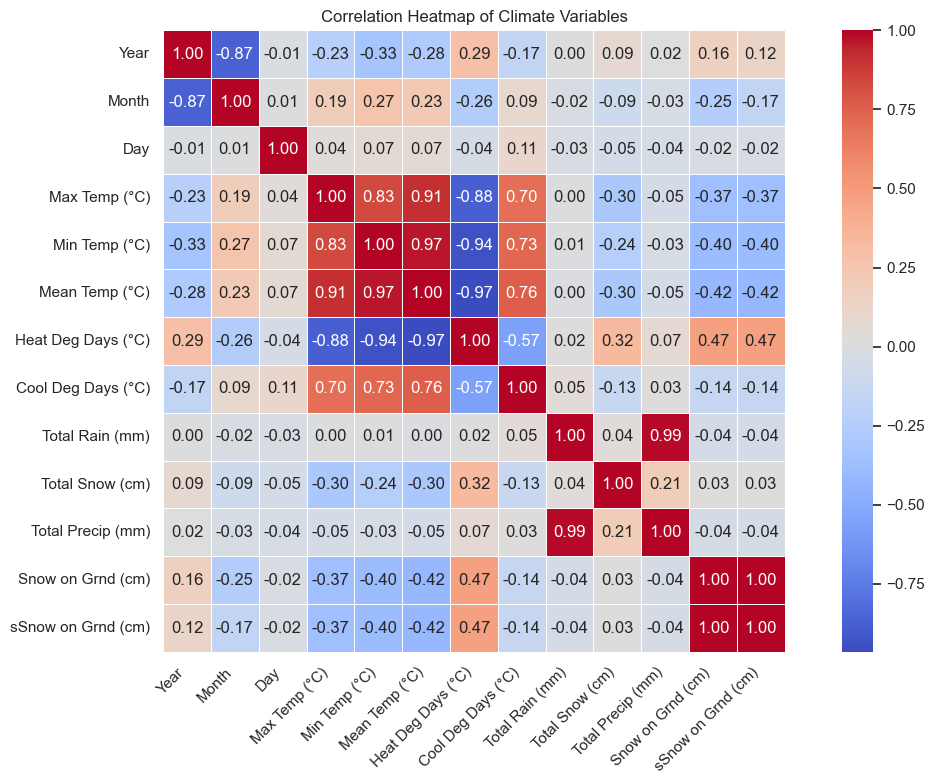

In [145]:
# Checking the correlation between the numerical aspects of the climate data

# Selecting only the numerical columns for correlation
climate_numerical = ontario_climate.select_dtypes(include='number')

# Compute correlation matrix
corr_matrix = climate_numerical.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, square=True)
plt.title("Correlation Heatmap of Climate Variables")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

##### Here are the key insights from the climate variable correlation heatmap:

###### Strong positive correlation between Max, Min, and Mean Temperatures.
###### High positive correlation between these temperatures and Heating/Cooling Degree Days.
###### Near-perfect positive correlation between Total Rain and Total Precipitation.
###### Strong negative correlation between Year and Month.
###### Moderate negative correlation between Snow on Ground and all temperature measures.
###### High multicollinearity present among temperature-related variables.
###### Perfect positive correlation between 'Snow on Grnd' and 'sSnow on Grnd' (potential redundancy).
###### Weak linear correlations between time variables (Year, Month, Day) and other climate factors.

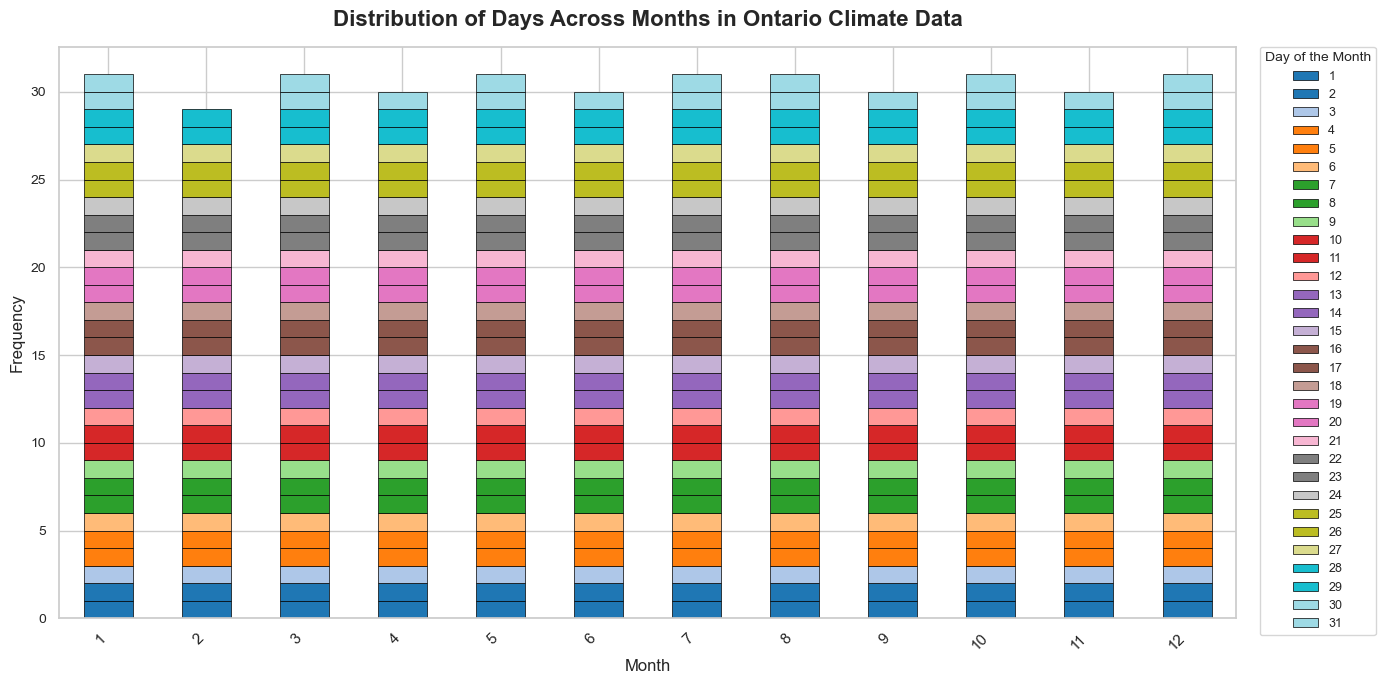

In [147]:
# Stacked bar plot for showing the categorical columns

sns.set(style="whitegrid")

# Create the cross-tabulation
cross_tab = pd.crosstab(ontario_climate['Month'], ontario_climate['Day'])

# Plot the stacked bar chart
ax = cross_tab.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 7),
    colormap='tab20',  # More distinct colors than Set3
    edgecolor='black',
    linewidth=0.5
)

# Improve the title and axis labels
plt.title('Distribution of Days Across Months in Ontario Climate Data', fontsize=16, weight='bold', pad=15)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Customize tick labels
plt.xticks(rotation=45, ha='right')
plt.yticks(fontsize=10)

# Place the legend outside the plot
plt.legend(
    title='Day of the Month',
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    borderaxespad=0.,
    fontsize=9,
    title_fontsize=10
)

# Clean layout
plt.tight_layout()
plt.show()


###### Insights

##### Monthly totals appear consistent, indicating a relatively even distribution of data points across the year.

##### The contribution of specific days within each month varies, suggesting non-uniform occurrences throughout the month.

##### The presence or absence of top segments (days 29-31) visually confirms the differing number of days in each month, aligning with the calendar structure.

In [149]:
# Checking nps_score dataset for any insight

nps_score.columns

Index(['NPS', 'Stock_Index', 'Month', 'Year'], dtype='object')

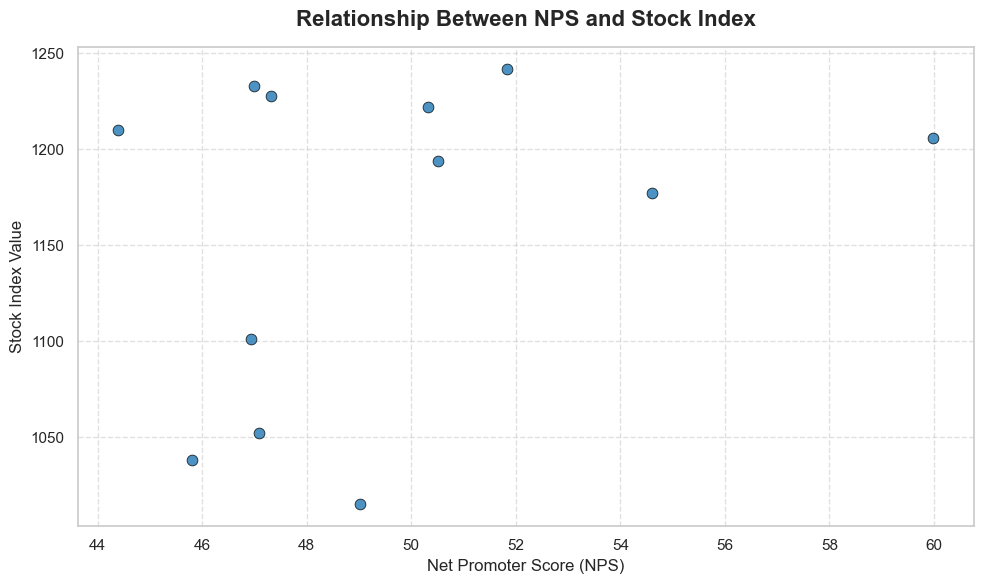

In [150]:

# Let us draw a scatterplot to understand the data distrubution, relationship among the columns and visualization
sns.set(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=nps_score,
    x='NPS',
    y='Stock_Index',
    color='#1f77b4',
    s=60,         # Size of markers
    alpha=0.8,    # Transparency for better visibility with overlap
    edgecolor='black'
)

# Enhance titles and labels
plt.title('Relationship Between NPS and Stock Index', fontsize=16, weight='bold', pad=15)
plt.xlabel('Net Promoter Score (NPS)', fontsize=12)
plt.ylabel('Stock Index Value', fontsize=12)

# Optional: Add regression line (if helpful)
# sns.regplot(data=nps_score, x='NPS', y='Stock_Index', scatter=False, color='red', line_kws={'linewidth':1.5})

# Add grid and improve layout
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

##### Insights

##### The scatter plot shows the relationship between NPS (Net Promoter Score) and the Stock Index. There doesn't appear to be a strong linear correlation between the two variables. Some instances of high NPS correspond with both high and moderate stock index values, and similarly for lower NPS values. This suggests that the stock index is likely influenced by factors beyond just the Net Promoter Score.

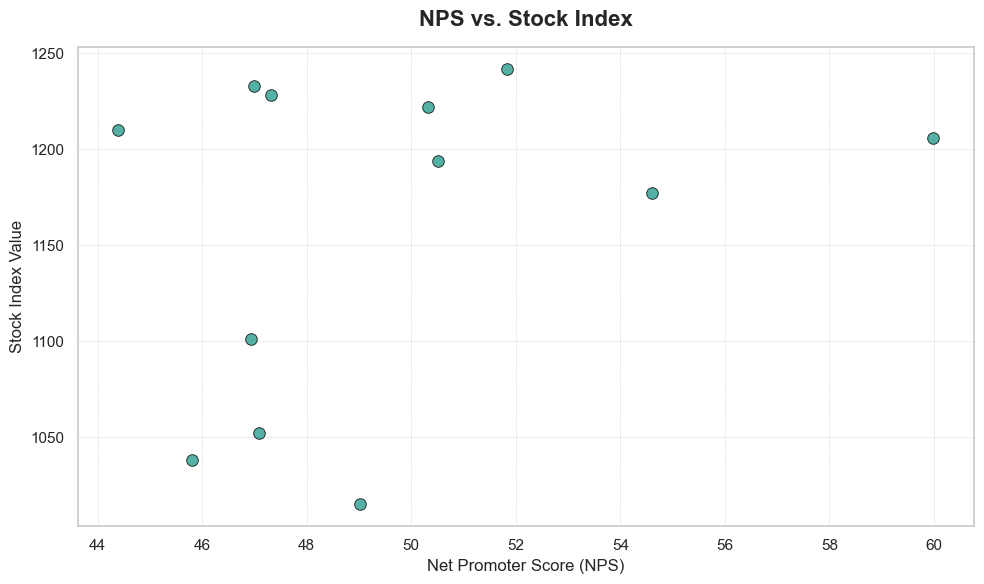

In [152]:
# Understanding the relationship between NPS and Stock dataset

sns.set(style="whitegrid")

# Create the figure
plt.figure(figsize=(10, 6))

# Plot the scatterplot with better styling
sns.scatterplot(
    data=nps_score,
    x='NPS',
    y='Stock_Index',
    color='#2a9d8f',
    s=70,            # Marker size
    alpha=0.8,       # Slight transparency
    edgecolor='black'
)

# Optional: Add a regression line for trend insight
# sns.regplot(data=nps_score, x='NPS', y='Stock_Index', scatter=False, color='red', line_kws={'linewidth': 1.5})

# Add informative title and axis labels
plt.title('NPS vs. Stock Index', fontsize=16, weight='bold', pad=15)
plt.xlabel('Net Promoter Score (NPS)', fontsize=12)
plt.ylabel('Stock Index Value', fontsize=12)

# Customize grid
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Layout adjustment
plt.tight_layout()
plt.show()

##### Insights

##### We can see that there is not a strong linear relationship between the Net Promoter Score (NPS) and the Stock Index. The data points are scattered across the graph without a clear upward or downward trend. This suggests that changes in NPS may not be a reliable predictor of changes in the Stock Index, and vice versa, based on this limited dataset.

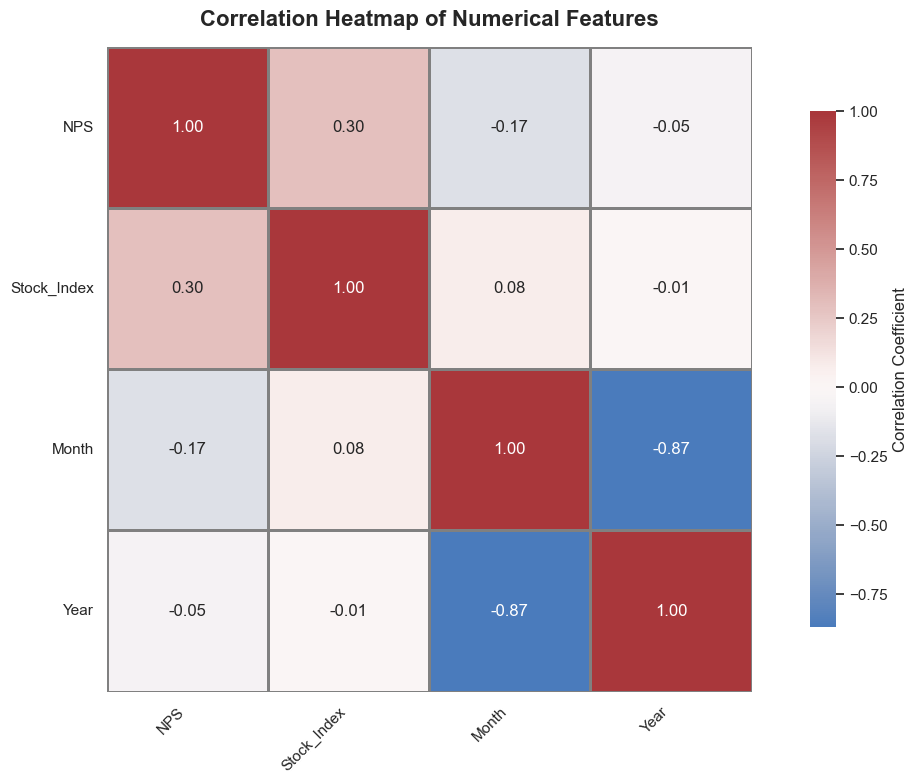

In [154]:
# Let us try correlation

# Extracting numerical columns
numerical_data = nps_score.select_dtypes(include='number')

# Compute correlation matrix
corr_matrix = numerical_data.corr()

# Set visual style
sns.set(style="white")

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='vlag',               # More balanced for positive/negative values
    center=0,                  # Center at zero for better contrast
    linewidths=0.75,
    linecolor='gray',
    square=True,
    cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"}
)

# Title and layout
plt.title("Correlation Heatmap of Numerical Features", fontsize=16, weight='bold', pad=15)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

##### Insight

##### The heatmap reveals a few interesting correlations. NPS and Stock Index show a weak positive correlation (0.3). Month and Year exhibit a strong negative correlation (-0.87), which is expected as the year progresses, the month number increases. Other correlations are quite weak. Overall, this suggests that while NPS and the Stock Index have a slightly positive relationship, the month and year are strongly inversely related, and other variable pairs show little linear association.

In [156]:
# Let us check out the final dataframe 'Marketing' to squeeze out a few insights before we move to the MMM creation

marketing.columns

Index(['Year', 'Month', 'Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing', ' Affiliates', 'SEM', 'Radio', 'Other', 'Adstocked_Advertising', 'TV_ads', 'Digital_ads', 'Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads', 'Affiliates_ads', 'SEM_ads', 'Radio_ads', 'Other_ads'], dtype='object')

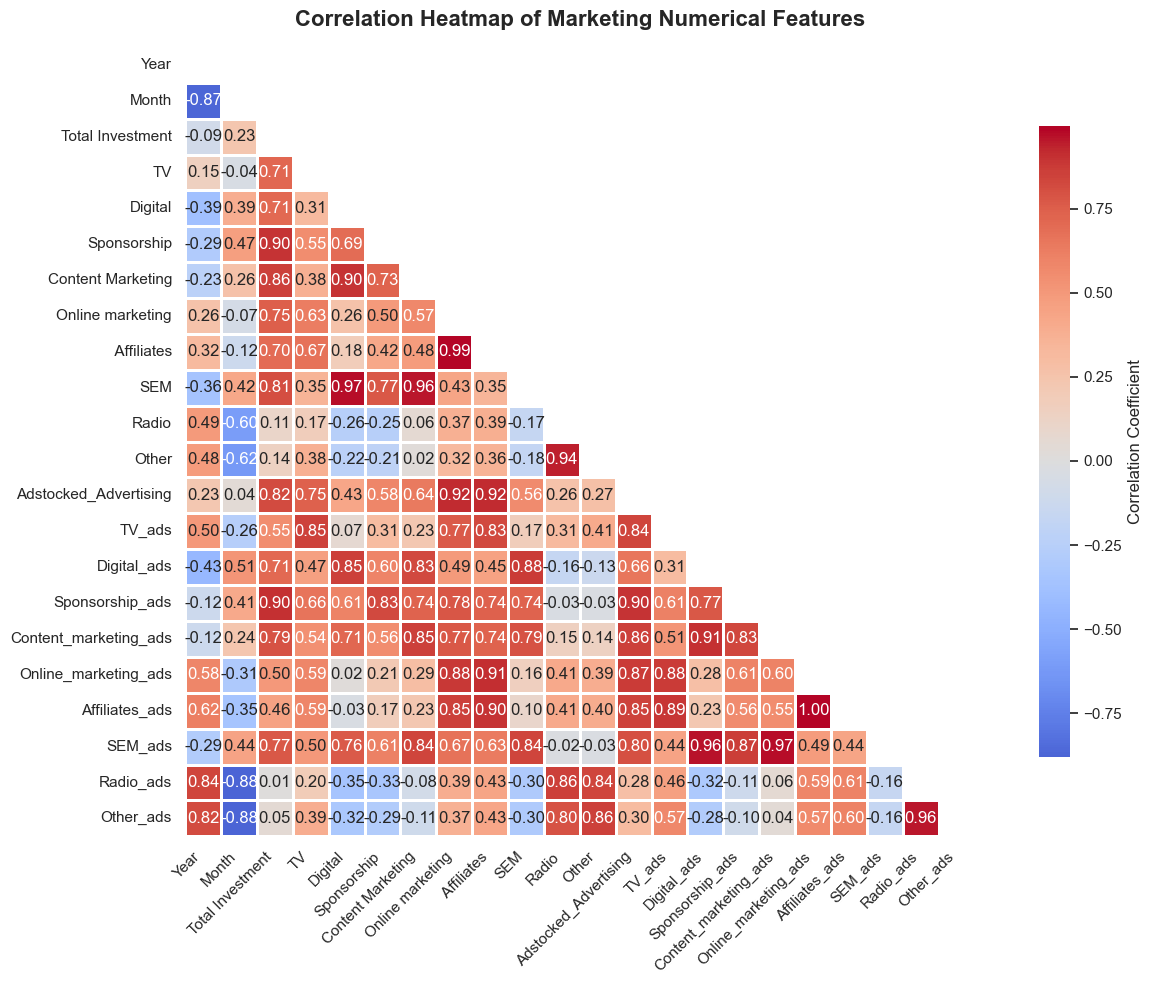

In [157]:
# Let us try correlation

# Extracting numerical columns
numerical_data = marketing.select_dtypes(include='number')

# Compute the correlation matrix
corr_matrix = numerical_data.corr()

# Set Seaborn style
sns.set(style="white")

# Mask upper triangle to reduce redundancy
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

# Draw the heatmap
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.75,
    cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"},
    linecolor='white'
)

# Add title and improve label readability
plt.title("Correlation Heatmap of Marketing Numerical Features", fontsize=16, weight='bold', pad=15)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

##### Insights

##### There is a very strong positive correlation within the advertising categories (TV, Digital, Sponsorship, etc.), which makes sense as they often move together in campaigns. Interestingly, 'Year' shows a moderate positive correlation with 'Total Investment' (0.8), suggesting increasing investment over time. Conversely, 'Year' has strong negative correlations with 'Radio' and 'Other' advertising, indicating a potential shift away from these channels. Most other correlations appear relatively weak, implying limited linear relationships between those variables.

#### Moving to Marketing Mix Model where we can work more on EDA after dividing them into the product types for detailed insights

### Camera Accesory

In [161]:
camera_df = consumer_elec[consumer_elec['product_analytic_sub_category'] == 'CameraAccessory']

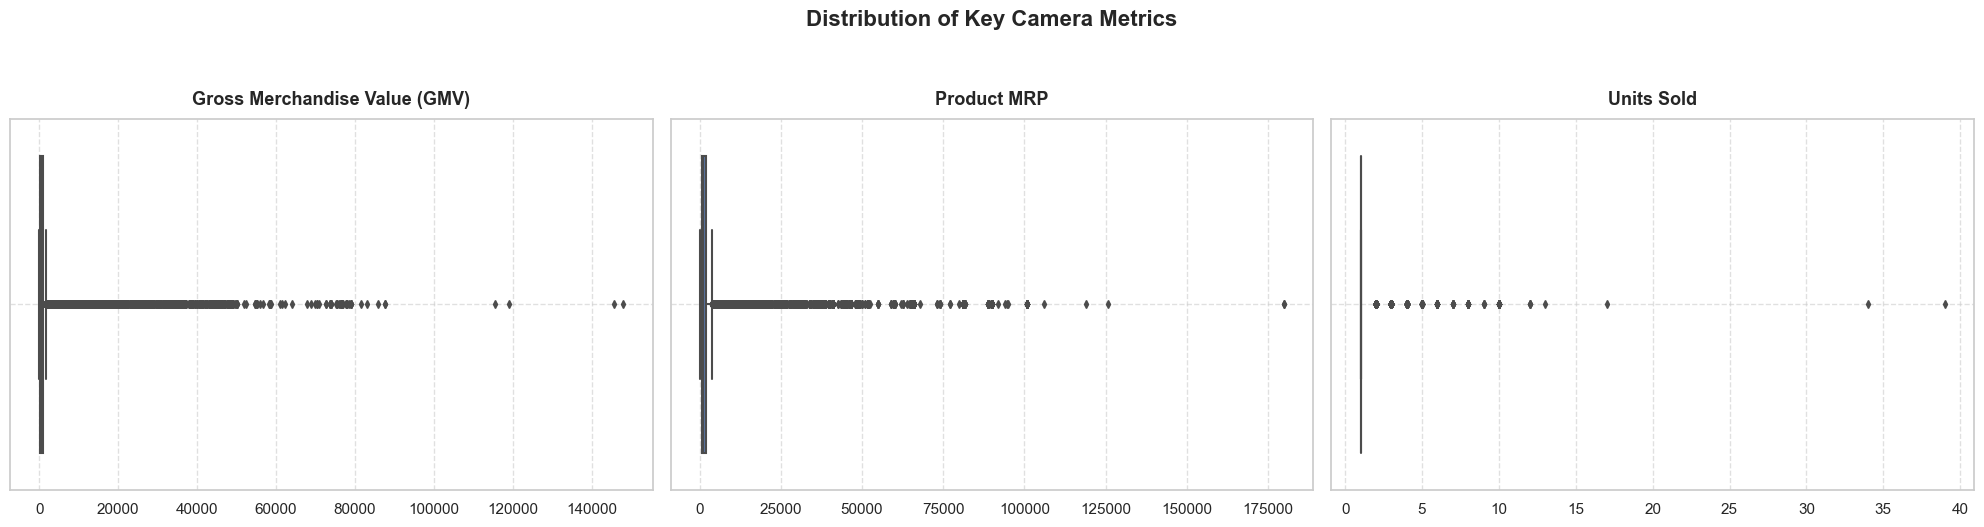

In [162]:
# Removing outliers is important as there maybe some unnecessary values and
# bulk orders can skew our analysis %%
sns.set(style="whitegrid")

# Define figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Define feature list and titles for clarity
features = ['gmv', 'product_mrp', 'units']
titles = ['Gross Merchandise Value (GMV)', 'Product MRP', 'Units Sold']

# Create boxplots in a loop
for ax, feature, title in zip(axs, features, titles):
    sns.boxplot(x=camera_df[feature], ax=ax, color='#4c72b0', fliersize=4, linewidth=1.5)
    ax.set_title(title, fontsize=13, weight='bold', pad=10)
    ax.set_xlabel("")  # Optional: Remove x-label if redundant
    ax.grid(True, linestyle='--', alpha=0.6)

# Improve spacing
plt.suptitle('Distribution of Key Camera Metrics', fontsize=16, weight='bold', y=1.05)
plt.tight_layout()
plt.show()

In [163]:
# Define a function to remove outliers using IQR
def remove_outliers(camera_df, column):
    Q1 = camera_df[column].quantile(0.25)
    Q3 = camera_df[column].quantile(0.75)
    IQR = Q3 - Q1
    return camera_df[(camera_df[column] >= Q1 - 1.5 * IQR) & (camera_df[column] <= Q3 + 1.5 * IQR)]

# Apply the function to the columns
camera_df = remove_outliers(camera_df, 'gmv')
camera_df = remove_outliers(camera_df, 'product_mrp')

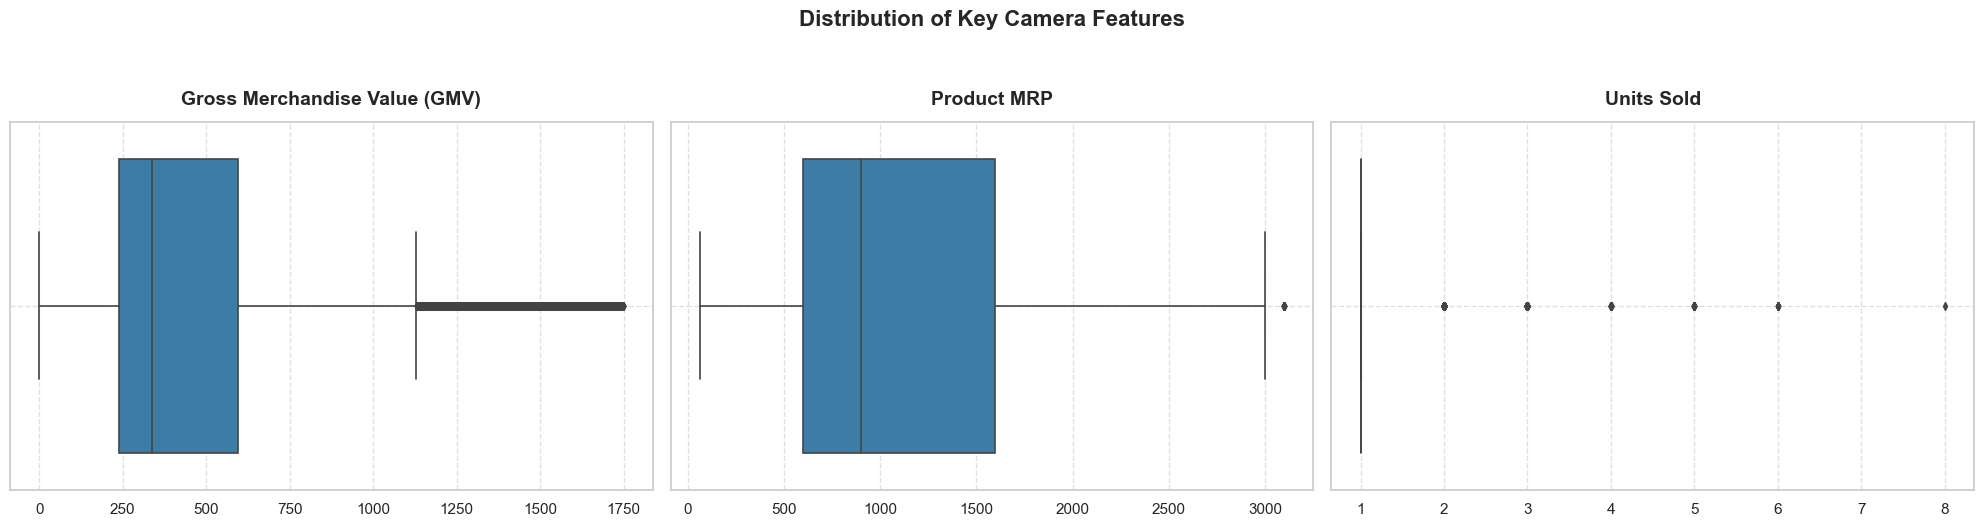

In [164]:
### Outlier Visualization

sns.set(style="whitegrid")

# Define the figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Define columns and their display titles
columns = ['gmv', 'product_mrp', 'units']
titles = ['Gross Merchandise Value (GMV)', 'Product MRP', 'Units Sold']

# Loop to create each boxplot with consistent styling
for ax, col, title in zip(axs, columns, titles):
    sns.boxplot(
        x=camera_df[col],
        ax=ax,
        color='#2c7fb8',
        fliersize=4,
        linewidth=1.2
    )
    ax.set_title(title, fontsize=14, fontweight='bold', pad=12)
    ax.set_xlabel("")  # Remove redundant x-labels
    ax.grid(True, linestyle='--', alpha=0.6)

# Add a common title and adjust layout
plt.suptitle('Distribution of Key Camera Features', fontsize=16, fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()

In [165]:
# Aggregating camera data at the weekly level

ca_week = camera_df.groupby('week').agg({
    'gmv': 'sum',
    'listing_price': 'mean',
    'product_mrp': 'mean',
    'discount': 'mean',
    'sla': 'mean',
    'product_procurement_sla': 'mean',
    'fsn_id': 'nunique',
    'order_item_id': 'nunique',
    'order_id': 'nunique',
    'order_payment_type': 'sum',
    'premium_product': 'sum'
}).reset_index()

In [166]:
ca_week.head()

,week,gmv,listing_price,product_mrp,discount,sla,product_procurement_sla,fsn_id,order_item_id,order_id,order_payment_type,premium_product
0,1,11151.000,428.885,1115.038,0.491,2.423,2.731,20,26,26,26,0
1,2,1160259.000,504.230,1016.201,0.452,6.853,2.549,527,2246,2208,715,0
2,3,1296683.000,511.410,1081.190,0.458,6.379,2.555,527,2486,2455,806,0
3,4,1316325.000,511.943,1073.738,0.444,6.481,2.597,524,2512,2475,770,0
4,5,894121.000,521.154,1081.955,0.445,6.424,2.605,437,1673,1646,466,0


In [167]:
# Finding out AOV = Average Order Value, which is a key metric in E-Commerce to value each order is contributing on average.
# Also if customers are buying more per order Sum of GMV / No of unique Orders

ca_week['AOV'] = ca_week['gmv']/ca_week['order_id']

In [168]:
ca_week['online_order_perc'] = ca_week['order_payment_type']*100/ca_week['order_item_id']

In [169]:
ca_week.week.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 80], dtype=int64)

In [170]:
calendar.week.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53], dtype=int64)

In [171]:
ca_week['week'] = ca_week['week'].astype(str)
calendar['week'] = calendar['week'].astype(str)

ca_week = ca_week.merge(calendar, how='left', on='week')

In [172]:
# First, create a dummy date (like 1st of the month)

marketing['Date'] = pd.to_datetime(marketing['Year'].astype(str) + '-' + marketing['Month'].astype(str) + '-01')

# Then, extract week

marketing['week'] = marketing['Date'].dt.strftime('%Y-%U')

In [173]:
marketing['week'] = marketing['week'].astype(str)
ca_week['week'] = ca_week['week'].astype(str)

ca_week = ca_week.merge(marketing, how='left', on='week')

In [174]:
ca_week.head()

,week,gmv,listing_price,product_mrp,discount,sla,product_procurement_sla,fsn_id,order_item_id,order_id,order_payment_type,premium_product,AOV,online_order_perc,index,NPS,Stock_Index,Special_sales,Payday,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other,Adstocked_Advertising,TV_ads,Digital_ads,Sponsorship_ads,Content_marketing_ads,Online_marketing_ads,Affiliates_ads,SEM_ads,Radio_ads,Other_ads,Date
0,1,11151.000,428.885,1115.038,0.491,2.423,2.731,20,26,26,26,0,428.885,100.000,0.000,54.600,1177.000,0.000,0.200,25.500,13.200,19.360,0.100,1.460,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,2,1160259.000,504.230,1016.201,0.452,6.853,2.549,527,2246,2208,715,0,525.480,31.834,1.000,54.600,1177.000,0.000,0.000,24.025,14.385,19.263,1.059,2.322,4.155,0.029,4.184,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,3,1296683.000,511.410,1081.190,0.458,6.379,2.555,527,2486,2455,806,0,528.180,32.422,2.000,54.600,1177.000,0.286,0.143,27.383,16.314,21.906,0.816,4.722,1.569,0.029,1.598,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,4,1316325.000,511.943,1073.738,0.444,6.481,2.597,524,2512,2475,770,0,531.848,30.653,3.000,54.600,1177.000,0.000,0.000,28.240,14.342,20.540,1.632,4.172,1.141,0.029,1.170,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,5,894121.000,521.154,1081.955,0.445,6.424,2.605,437,1673,1646,466,0,543.208,27.854,4.000,56.139,1185.286,0.000,0.143,29.811,16.242,23.092,0.816,5.908,4.341,0.029,4.370,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [175]:
ca_week_viz = ca_week.round(2)

<Axes: xlabel='gmv', ylabel='Density'>

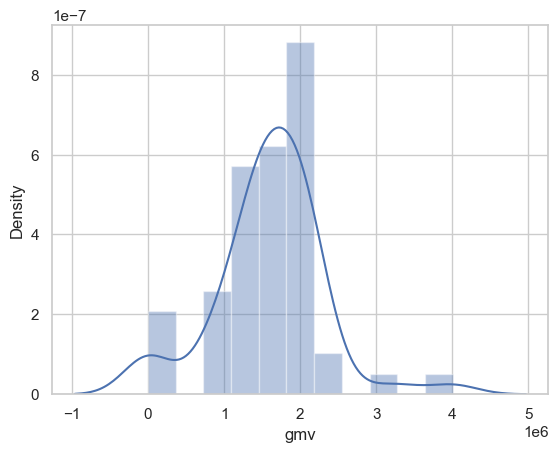

In [176]:
# Target Variable

sns.distplot(ca_week_viz['gmv'],kde=True)

#### Insights

#### Right Skew: The data is skewed to the right, indicating most 'gmv' values are lower, with fewer occurrences of higher values.

#### Modal Peak: There's a prominent peak around 2 million, suggesting this is the most frequent 'gmv' value.

#### Multiple Clusters: Smaller bumps hint at potential sub-groups or modes within the overall distribution.

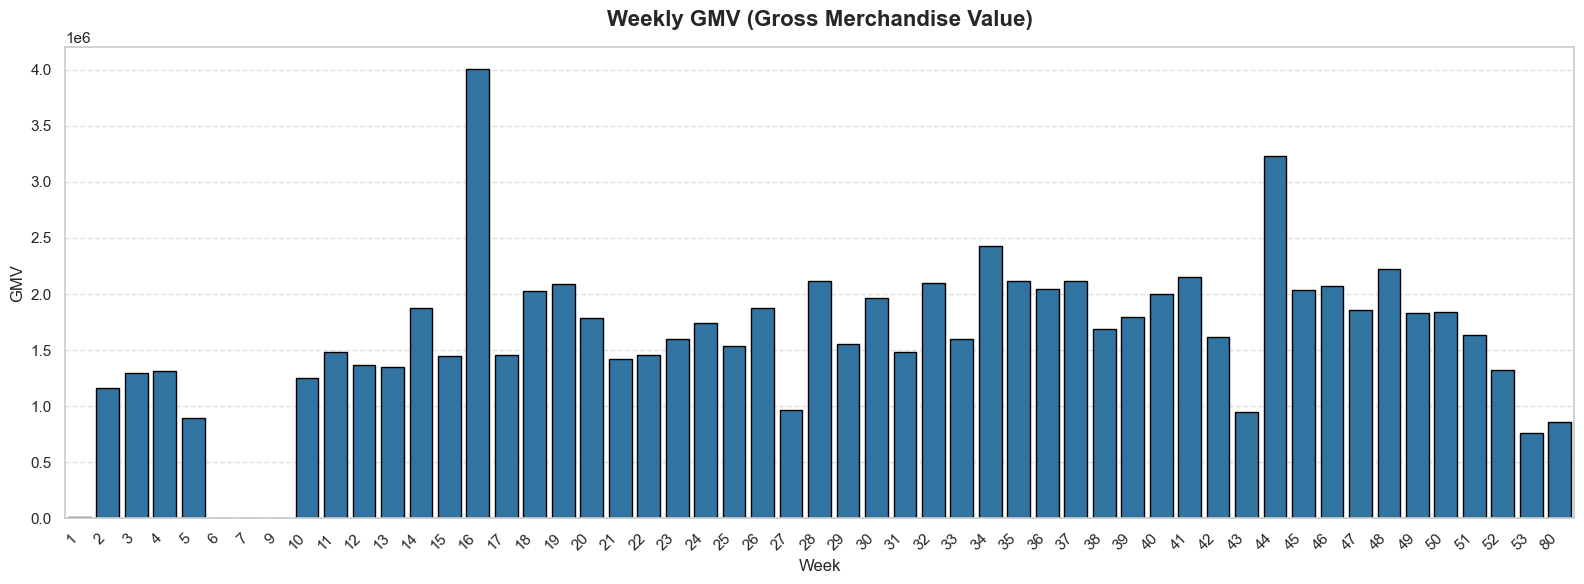

In [178]:
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(16, 6))
sns.barplot(
    data=ca_week_viz,
    x='week',
    y='gmv',
    color='#1f77b4',
    edgecolor='black'
)

# Enhance title and labels
plt.title("Weekly GMV (Gross Merchandise Value)", fontsize=16, weight='bold', pad=15)
plt.xlabel("Week", fontsize=12)
plt.ylabel("GMV", fontsize=12)

# Rotate x-axis ticks for better readability
plt.xticks(rotation=45, ha='right')

# Add grid and layout optimization
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### Insights

#### Spikes in GMV: Week 16 and Week 44 show significant spikes, indicating potential promotions, campaigns, or seasonal events driving high sales.

#### Mid-Year Stability: From Week 18 to 40, GMV appears relatively stable, suggesting consistent performance during the mid-year period.

#### End-Year Dip: Weeks 50 onwards show a noticeable decline, which could be due to seasonality, low campaign activity, or inventory issues.

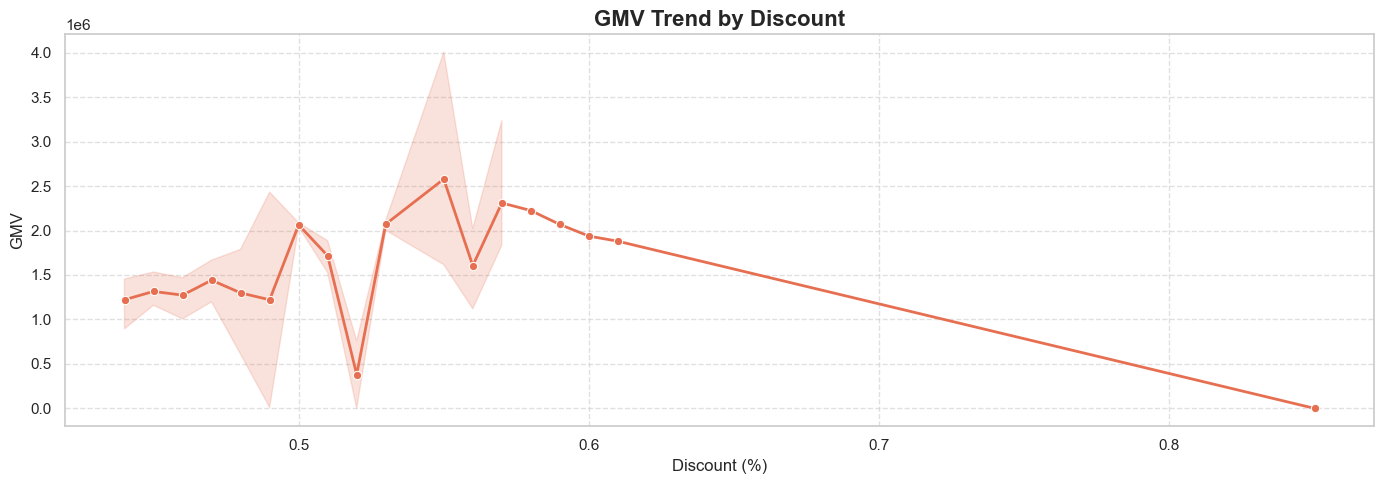

In [180]:
plt.figure(figsize=(14, 5))
sns.lineplot(
    data=ca_week_viz.sort_values('discount'),
    x='discount',
    y='gmv',
    marker='o',
    linewidth=2,
    color='#e76f51'
)
plt.title("GMV Trend by Discount", fontsize=16, weight='bold')
plt.xlabel("Discount (%)")
plt.ylabel("GMV")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### Insight

#### High discounts (>60%) generally lead to lower GMV

#### Peak GMV observed around 55-60% discount.

#### GMV is more volatile at lower discount levels (<55%).

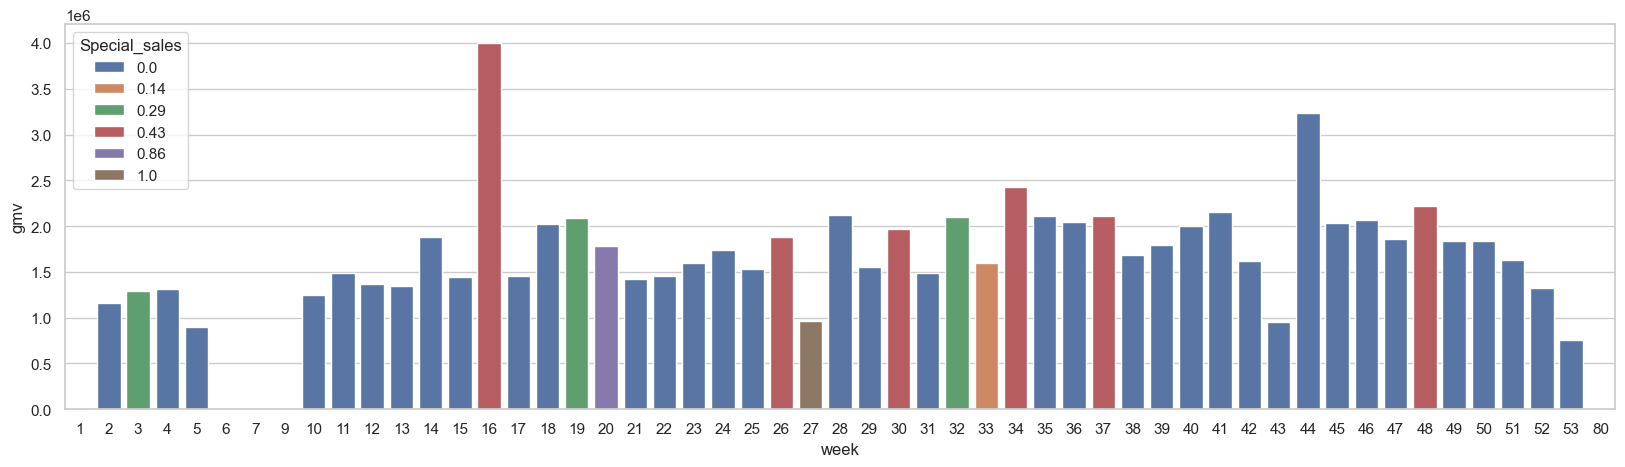

In [182]:
plt.figure(figsize=(20, 5))
sns.barplot(x= ca_week_viz['week'], y =ca_week_viz['gmv'], hue = ca_week_viz['Special_sales'], dodge = False)
plt.show()

In [183]:
# Moving Averarage for Camera Accessory

# Moving Average for listing_price and discount

ca_week[['MA2_LP','MA2_Discount']] = ca_week[['listing_price','discount']].rolling(window=2,min_periods=1).mean()
ca_week[['MA3_LP','MA3_Discount']] = ca_week[['listing_price','discount']].rolling(window=3,min_periods=1).mean()
ca_week[['MA4_LP','MA4_Discount']] = ca_week[['listing_price','discount']].rolling(window=4,min_periods=1).mean()

In [184]:
# Referencing listed price Inflation

ca_week['MA2_listed_price'] = (ca_week['listing_price']-ca_week['MA2_LP'])/ca_week['MA2_LP']
ca_week['MA3_listed_price'] = (ca_week['listing_price']-ca_week['MA3_LP'])/ca_week['MA3_LP']
ca_week['MA4_listed_price'] = (ca_week['listing_price']-ca_week['MA4_LP'])/ca_week['MA4_LP']

In [185]:
### Referencing discount Inflation

ca_week['MA2_discount_offer'] = (ca_week['discount']-ca_week['MA2_Discount'])/ca_week['MA2_Discount']
ca_week['MA3_discount_offer'] = (ca_week['discount']-ca_week['MA3_Discount'])/ca_week['MA3_Discount']
ca_week['MA4_discount_offer'] = (ca_week['discount']-ca_week['MA4_Discount'])/ca_week['MA4_Discount']

In [186]:
ca_week.drop(['MA2_LP','MA3_LP','MA4_LP','MA2_Discount','MA3_Discount','MA4_Discount'], axis = 1, inplace = True)
ca_week.head(2)

,week,gmv,listing_price,product_mrp,discount,sla,product_procurement_sla,fsn_id,order_item_id,order_id,order_payment_type,premium_product,AOV,online_order_perc,index,NPS,Stock_Index,Special_sales,Payday,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other,Adstocked_Advertising,TV_ads,Digital_ads,Sponsorship_ads,Content_marketing_ads,Online_marketing_ads,Affiliates_ads,SEM_ads,Radio_ads,Other_ads,Date,MA2_listed_price,MA3_listed_price,MA4_listed_price,MA2_discount_offer,MA3_discount_offer,MA4_discount_offer
0,1,11151.000,428.885,1115.038,0.491,2.423,2.731,20,26,26,26,0,428.885,100.000,0.000,54.600,1177.000,0.000,0.200,25.500,13.200,19.360,0.100,1.460,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,0.000,0.000,0.000,0.000,0.000,0.000
1,2,1160259.000,504.230,1016.201,0.452,6.853,2.549,527,2246,2208,715,0,525.480,31.834,1.000,54.600,1177.000,0.000,0.000,24.025,14.385,19.263,1.059,2.322,4.155,0.029,4.184,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,0.081,0.081,0.081,-0.041,-0.041,-0.041


In [187]:
# Filling the NaN's for even distribution of data

ca_week.fillna(0, inplace=True)

In [188]:
#

In [189]:
### Highly Correlated Columns should be dropped

ca_week.drop(['TV', 'Digital', 'Sponsorship', 'Content Marketing','Online marketing', ' Affiliates', 'SEM','Radio',
              'Other'], axis = 1, inplace = True)

In [190]:
#

In [191]:
ca_week.columns

Index(['week', 'gmv', 'listing_price', 'product_mrp', 'discount', 'sla', 'product_procurement_sla', 'fsn_id', 'order_item_id', 'order_id', 'order_payment_type', 'premium_product', 'AOV', 'online_order_perc', 'index', 'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)', 'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)', 'Snow on Grnd (cm)', 'Year', 'Month', 'Total Investment', 'Adstocked_Advertising', 'TV_ads', 'Digital_ads', 'Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads', 'Affiliates_ads', 'SEM_ads', 'Radio_ads', 'Other_ads', 'Date', 'MA2_listed_price', 'MA3_listed_price', 'MA4_listed_price', 'MA2_discount_offer', 'MA3_discount_offer', 'MA4_discount_offer'], dtype='object')

In [192]:
ca_week.drop(['Affiliates_ads','SEM_ads','Digital_ads','Radio_ads','Other_ads','Mean Temp (°C)','Min Temp (°C)',
              'order_id','order_item_id','Total Precip (mm)','Total Investment','MA3_discount_offer',
               'MA3_listed_price','AOV','Max Temp (°C)','MA2_listed_price','MA4_discount_offer'],axis=1,inplace=True)

In [193]:
# Lag Variable Function for Lag variable Functions

ca_week['lag_1_listed_price'] = ca_week['listing_price'].shift(-1).fillna(0)
ca_week['lag_2_listed_price'] = ca_week['listing_price'].shift(-2).fillna(0)
ca_week['lag_3_listed_price'] = ca_week['listing_price'].shift(-3).fillna(0)

In [194]:
ca_week['lag_1_discount'] = ca_week['discount'].shift(-1).fillna(0)
ca_week['lag_2_discount'] = ca_week['discount'].shift(-2).fillna(0)
ca_week['lag_3_discount'] = ca_week['discount'].shift(-3).fillna(0)

In [195]:
ca_week['lag_1_Stock_Index'] = ca_week['Stock_Index'].shift(-1).fillna(0)
ca_week['lag_2_Stock_Index'] = ca_week['Stock_Index'].shift(-2).fillna(0)
ca_week['lag_3_Stock_Index'] = ca_week['Stock_Index'].shift(-3).fillna(0)

In [196]:
ca_week['lag_1_Special_sales'] = ca_week['Special_sales'].shift(-1).fillna(0)
ca_week['lag_2_Special_sales'] = ca_week['Special_sales'].shift(-2).fillna(0)
ca_week['lag_3_Special_sales'] = ca_week['Special_sales'].shift(-3).fillna(0)

In [197]:
ca_week['lag_1_Payday'] = ca_week['Payday'].shift(-1).fillna(0)
ca_week['lag_2_Payday'] = ca_week['Payday'].shift(-2).fillna(0)
ca_week['lag_3_Payday'] = ca_week['Payday'].shift(-3).fillna(0)

In [198]:
ca_week['lag_1_NPS'] = ca_week['NPS'].shift(-1).fillna(0)
ca_week['lag_2_NPS'] = ca_week['NPS'].shift(-2).fillna(0)
ca_week['lag_3_NPS'] = ca_week['NPS'].shift(-3).fillna(0)

In [199]:
ca_week.head()

,week,gmv,listing_price,product_mrp,discount,sla,product_procurement_sla,fsn_id,order_payment_type,premium_product,online_order_perc,index,NPS,Stock_Index,Special_sales,Payday,Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Snow on Grnd (cm),Year,Month,Adstocked_Advertising,TV_ads,Sponsorship_ads,Content_marketing_ads,Online_marketing_ads,Date,MA4_listed_price,MA2_discount_offer,lag_1_listed_price,lag_2_listed_price,lag_3_listed_price,lag_1_discount,lag_2_discount,lag_3_discount,lag_1_Stock_Index,lag_2_Stock_Index,lag_3_Stock_Index,lag_1_Special_sales,lag_2_Special_sales,lag_3_Special_sales,lag_1_Payday,lag_2_Payday,lag_3_Payday,lag_1_NPS,lag_2_NPS,lag_3_NPS
0,1,11151.000,428.885,1115.038,0.491,2.423,2.731,20,26,0,100.000,0.000,54.600,1177.000,0.000,0.200,0.100,1.460,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0.000,0.000,504.230,511.410,511.943,0.452,0.458,0.444,1177.000,1177.000,1177.000,0.000,0.286,0.000,0.000,0.143,0.000,54.600,54.600,54.600
1,2,1160259.000,504.230,1016.201,0.452,6.853,2.549,527,715,0,31.834,1.000,54.600,1177.000,0.000,0.000,1.059,2.322,4.155,0.029,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0.081,-0.041,511.410,511.943,521.154,0.458,0.444,0.445,1177.000,1177.000,1185.286,0.286,0.000,0.000,0.143,0.000,0.143,54.600,54.600,56.139
2,3,1296683.000,511.410,1081.190,0.458,6.379,2.555,527,806,0,32.422,2.000,54.600,1177.000,0.286,0.143,0.816,4.722,1.569,0.029,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0.062,0.006,511.943,521.154,699.000,0.444,0.445,0.520,1177.000,1185.286,1206.000,0.000,0.000,0.000,0.000,0.143,0.000,54.600,56.139,59.987
3,4,1316325.000,511.943,1073.738,0.444,6.481,2.597,524,770,0,30.653,3.000,54.600,1177.000,0.000,0.000,1.632,4.172,1.141,0.029,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0.047,-0.016,521.154,699.000,299.000,0.445,0.520,0.850,1185.286,1206.000,1206.000,0.000,0.000,0.286,0.143,0.000,0.143,56.139,59.987,59.987
4,5,894121.000,521.154,1081.955,0.445,6.424,2.605,437,466,0,27.854,4.000,56.139,1185.286,0.000,0.143,0.816,5.908,4.341,0.029,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0.018,0.001,699.000,299.000,452.500,0.520,0.850,0.475,1206.000,1206.000,1206.000,0.000,0.286,0.429,0.000,0.143,0.000,59.987,59.987,59.987


### Gaming Accesory

In [201]:
gaming_accessory = consumer_elec[consumer_elec['product_analytic_sub_category'] == 'GamingAccessory']

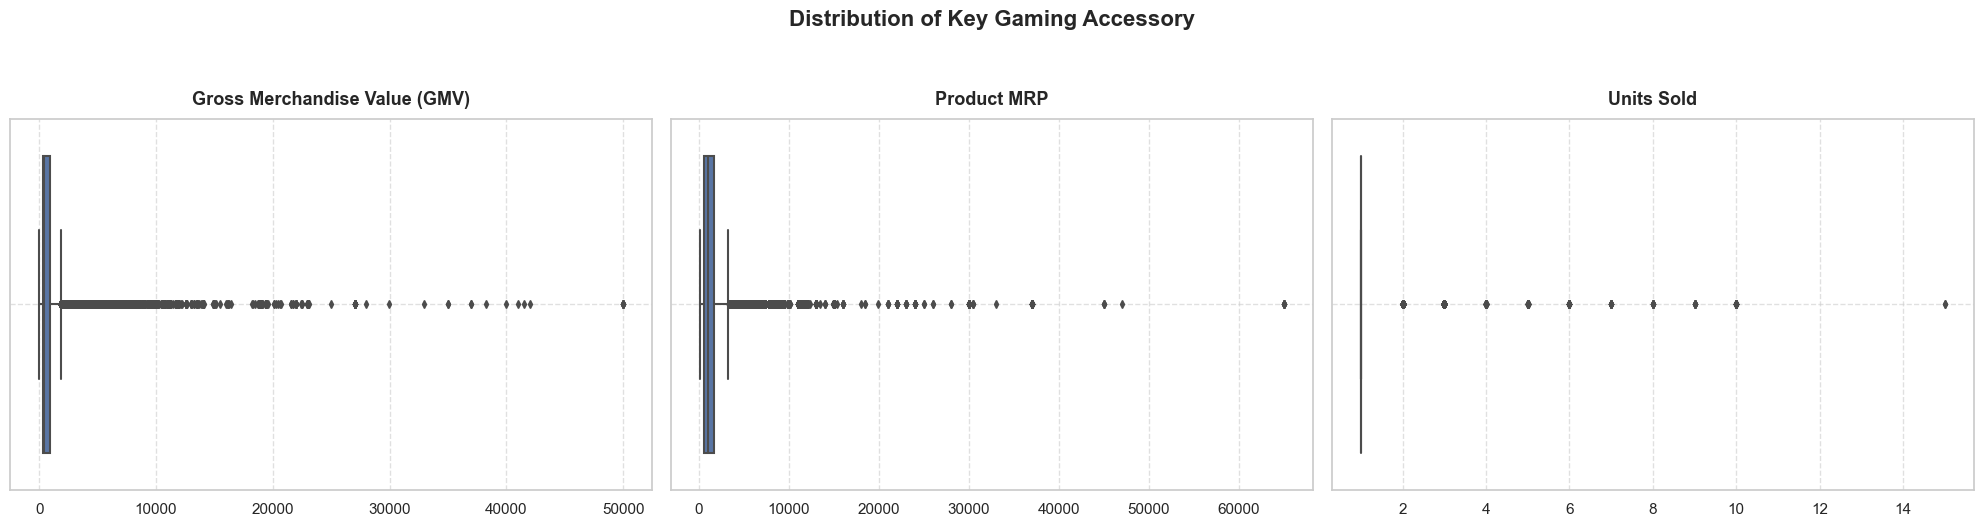

In [202]:
# Removing outliers is important as there maybe some unnecessary values and
# bulk orders can skew our analysis %%
sns.set(style="whitegrid")

# Define figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Define feature list and titles for clarity
features = ['gmv', 'product_mrp', 'units']
titles = ['Gross Merchandise Value (GMV)', 'Product MRP', 'Units Sold']

# Create boxplots in a loop
for ax, feature, title in zip(axs, features, titles):
    sns.boxplot(x=gaming_accessory[feature], ax=ax, color='#4c72b0', fliersize=4, linewidth=1.5)
    ax.set_title(title, fontsize=13, weight='bold', pad=10)
    ax.set_xlabel("")  # Optional: Remove x-label if redundant
    ax.grid(True, linestyle='--', alpha=0.6)

# Improve spacing
plt.suptitle('Distribution of Key Gaming Accessory', fontsize=16, weight='bold', y=1.05)
plt.tight_layout()
plt.show()


In [203]:
# Define a function to remove outliers using IQR
def remove_outliers(gaming_accessory, column):
    Q1 = gaming_accessory[column].quantile(0.25)
    Q3 = gaming_accessory[column].quantile(0.75)
    IQR = Q3 - Q1
    return gaming_accessory[(gaming_accessory[column] >= Q1 - 1.5 * IQR) & (gaming_accessory[column] <= Q3 + 1.5 * IQR)]

# Apply the function to the columns
gaming_accessory = remove_outliers(gaming_accessory, 'gmv')
gaming_accessory = remove_outliers(gaming_accessory, 'product_mrp')

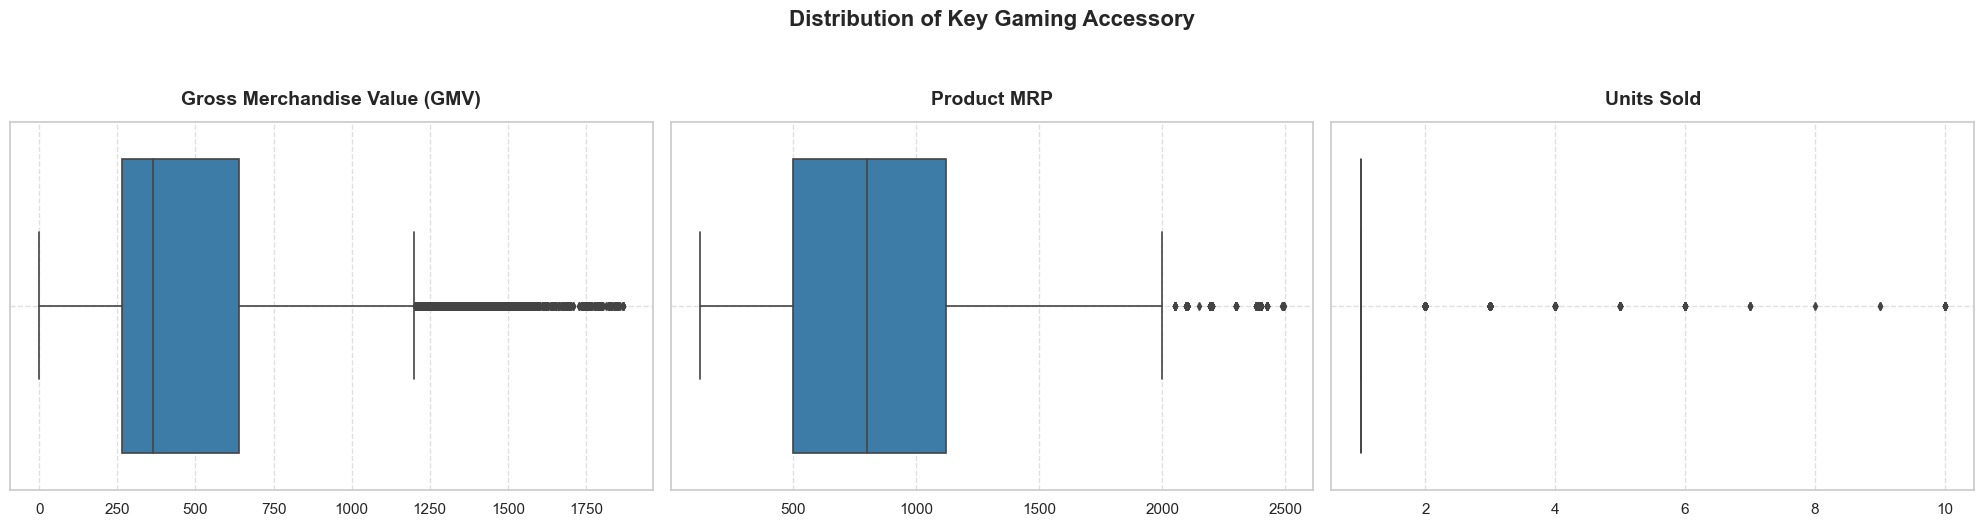

In [204]:
### Outlier Visualization

sns.set(style="whitegrid")

# Define the figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Define columns and their display titles
columns = ['gmv', 'product_mrp', 'units']
titles = ['Gross Merchandise Value (GMV)', 'Product MRP', 'Units Sold']

# Loop to create each boxplot with consistent styling
for ax, col, title in zip(axs, columns, titles):
    sns.boxplot(
        x=gaming_accessory[col],
        ax=ax,
        color='#2c7fb8',
        fliersize=4,
        linewidth=1.2
    )
    ax.set_title(title, fontsize=14, fontweight='bold', pad=12)
    ax.set_xlabel("")  # Remove redundant x-labels
    ax.grid(True, linestyle='--', alpha=0.6)

# Add a common title and adjust layout
plt.suptitle('Distribution of Key Gaming Accessory', fontsize=16, fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()

In [205]:
### Aggregating dataset on weekly level

ga_week = pd.DataFrame(gaming_accessory.groupby('week').agg({'gmv':'sum','listing_price':'mean',
                                                             'product_mrp':'mean','discount':'mean',
                                                             'sla':'mean','product_procurement_sla':'mean',
                                                             'fsn_id':pd.Series.nunique,'order_item_id':pd.Series.nunique,
                                                             'order_id': pd.Series.nunique,
                                                             'order_payment_type':'sum'}))

ga_week.reset_index( inplace = True)

In [206]:
ga_week.head()

,week,gmv,listing_price,product_mrp,discount,sla,product_procurement_sla,fsn_id,order_item_id,order_id,order_payment_type
0,1,17466.000,681.080,893.160,0.220,2.960,2.560,19,25,25,25
1,2,1395022.000,523.566,952.250,0.412,5.055,3.026,204,2579,2445,678
2,3,1081512.359,446.456,751.525,0.428,5.078,2.516,209,2365,2339,534
3,4,1127209.000,550.361,872.806,0.352,5.149,2.328,225,1999,1967,419
4,5,725030.000,551.453,876.789,0.361,5.441,2.328,217,1279,1263,241


In [207]:
# Similar to Camera Accessory, we will move on with the steps
# Sum of GMV / No of unique Orders

ga_week['AOV'] = ga_week['gmv']/ga_week['order_id']

In [208]:
ga_week['online_order_perc'] = ga_week['order_payment_type']*100/ga_week['order_item_id']

In [209]:
ga_week.head()

,week,gmv,listing_price,product_mrp,discount,sla,product_procurement_sla,fsn_id,order_item_id,order_id,order_payment_type,AOV,online_order_perc
0,1,17466.000,681.080,893.160,0.220,2.960,2.560,19,25,25,25,698.640,100.000
1,2,1395022.000,523.566,952.250,0.412,5.055,3.026,204,2579,2445,678,570.561,26.289
2,3,1081512.359,446.456,751.525,0.428,5.078,2.516,209,2365,2339,534,462.382,22.579
3,4,1127209.000,550.361,872.806,0.352,5.149,2.328,225,1999,1967,419,573.060,20.960
4,5,725030.000,551.453,876.789,0.361,5.441,2.328,217,1279,1263,241,574.054,18.843


In [210]:
ga_week.columns

Index(['week', 'gmv', 'listing_price', 'product_mrp', 'discount', 'sla', 'product_procurement_sla', 'fsn_id', 'order_item_id', 'order_id', 'order_payment_type', 'AOV', 'online_order_perc'], dtype='object')

In [211]:
ga_week['week'] = ga_week['week'].astype(str)
calendar['week'] = calendar['week'].astype(str)

ga_week = ga_week.merge(calendar, how='left', on='week')

In [212]:
marketing['week'] = marketing['week'].astype(str)
ga_week['week'] = ga_week['week'].astype(str)

ga_week = ga_week.merge(marketing, how='left', on='week')

In [213]:
ga_week.head(2)

,week,gmv,listing_price,product_mrp,discount,sla,product_procurement_sla,fsn_id,order_item_id,order_id,order_payment_type,AOV,online_order_perc,index,NPS,Stock_Index,Special_sales,Payday,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other,Adstocked_Advertising,TV_ads,Digital_ads,Sponsorship_ads,Content_marketing_ads,Online_marketing_ads,Affiliates_ads,SEM_ads,Radio_ads,Other_ads,Date
0,1,17466.000,681.080,893.160,0.220,2.960,2.560,19,25,25,25,698.640,100.000,0.000,54.600,1177.000,0.000,0.200,25.500,13.200,19.360,0.100,1.460,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,2,1395022.000,523.566,952.250,0.412,5.055,3.026,204,2579,2445,678,570.561,26.289,1.000,54.600,1177.000,0.000,0.000,24.025,14.385,19.263,1.059,2.322,4.155,0.029,4.184,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [214]:
# Visualizing ga_week

ga_week_viz = ga_week.round(2)

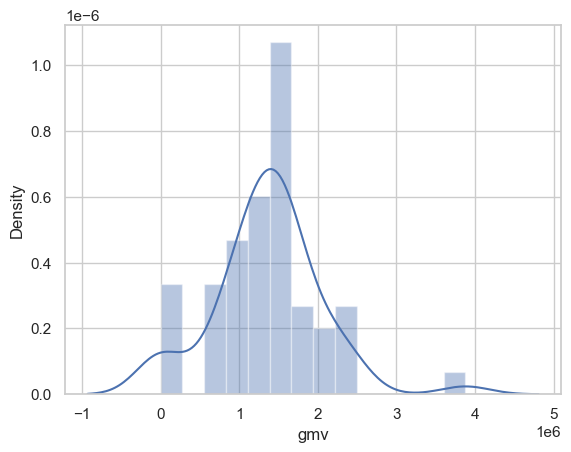

In [215]:
sns.distplot(ga_week_viz['gmv'],kde=True)
plt.show()

#### Insight

#### The 'gmv' distribution is multimodal, showing peaks around 0, 1.5 million, and a smaller one near 3.7 million. The highest density is observed around 1.5 million, suggesting this is a frequent 'gmv' value. The spread indicates variability in 'gmv', with some significantly higher values present.

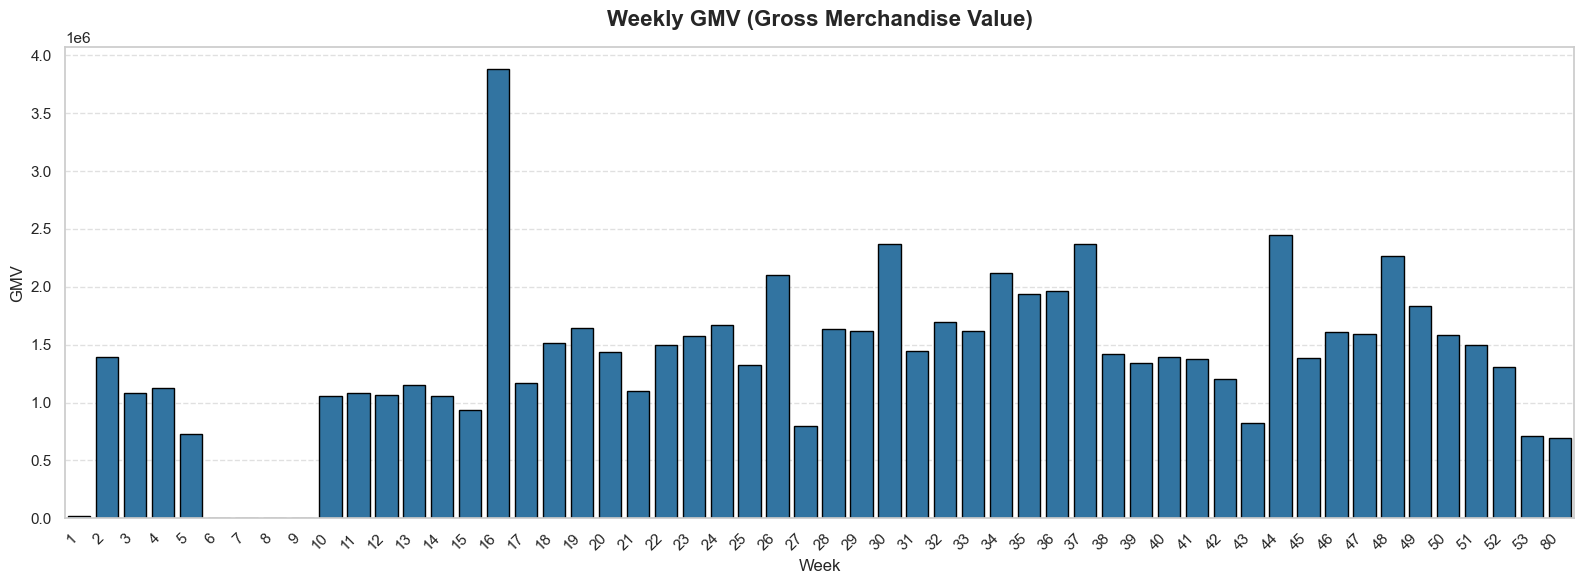

In [217]:
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(16, 6))
sns.barplot(
    data=ga_week_viz,
    x='week',
    y='gmv',
    color='#1f77b4',
    edgecolor='black'
)

# Enhance title and labels
plt.title("Weekly GMV (Gross Merchandise Value)", fontsize=16, weight='bold', pad=15)
plt.xlabel("Week", fontsize=12)
plt.ylabel("GMV", fontsize=12)

# Rotate x-axis ticks for better readability
plt.xticks(rotation=45, ha='right')

# Add grid and layout optimization
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

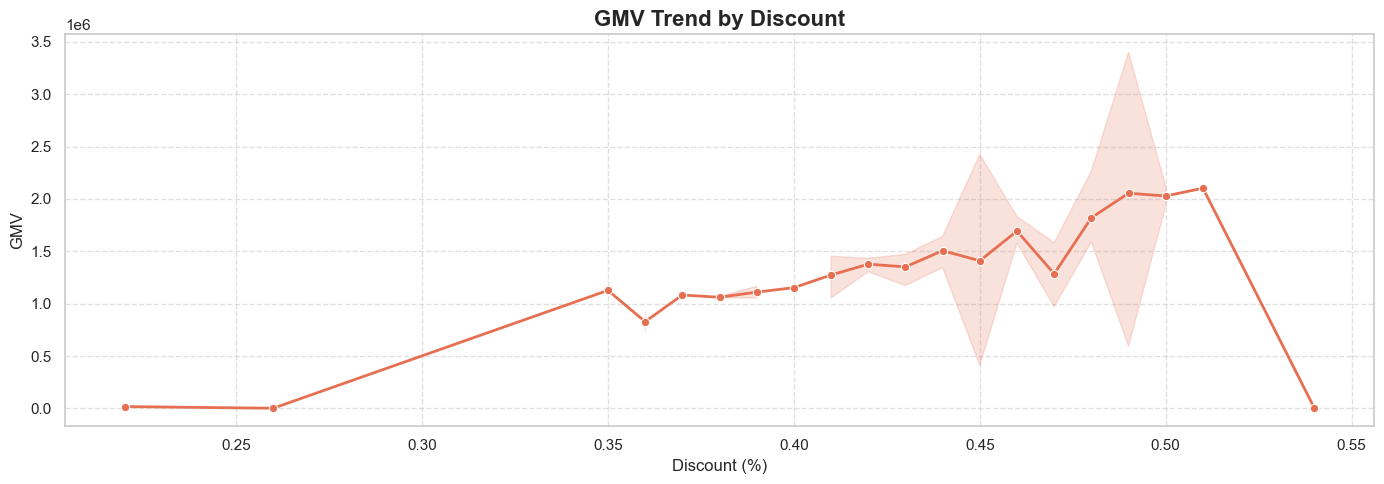

In [218]:
plt.figure(figsize=(14, 5))
sns.lineplot(
    data=ga_week_viz.sort_values('discount'),
    x='discount',
    y='gmv',
    marker='o',
    linewidth=2,
    color='#e76f51'
)
plt.title("GMV Trend by Discount", fontsize=16, weight='bold')
plt.xlabel("Discount (%)")
plt.ylabel("GMV")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [219]:
#### Insights
##### Zero GMV at Low Discounts: Very low discounts (below approximately 0.27 or 27%) result in zero Gross Merchandise Value (GMV). 
#####     This suggests a threshold discount is needed to generate any sales.

##### Increasing GMV with Moderate Discounts: As the discount percentage increases from around 0.27 to about 0.50 (27% to 50%), 
##### there is a general upward trend in GMV, indicating that offering moderate discounts stimulates sales value.

##### Sharp GMV Drop at Highest Discount: The highest discount level shown (around 0.54 or 54%) leads to a sharp drop back to zero GMV.
#####    This implies that while moderate discounts boost GMV, an excessively high discount might not be a sustainable or profitable strategy in this context.

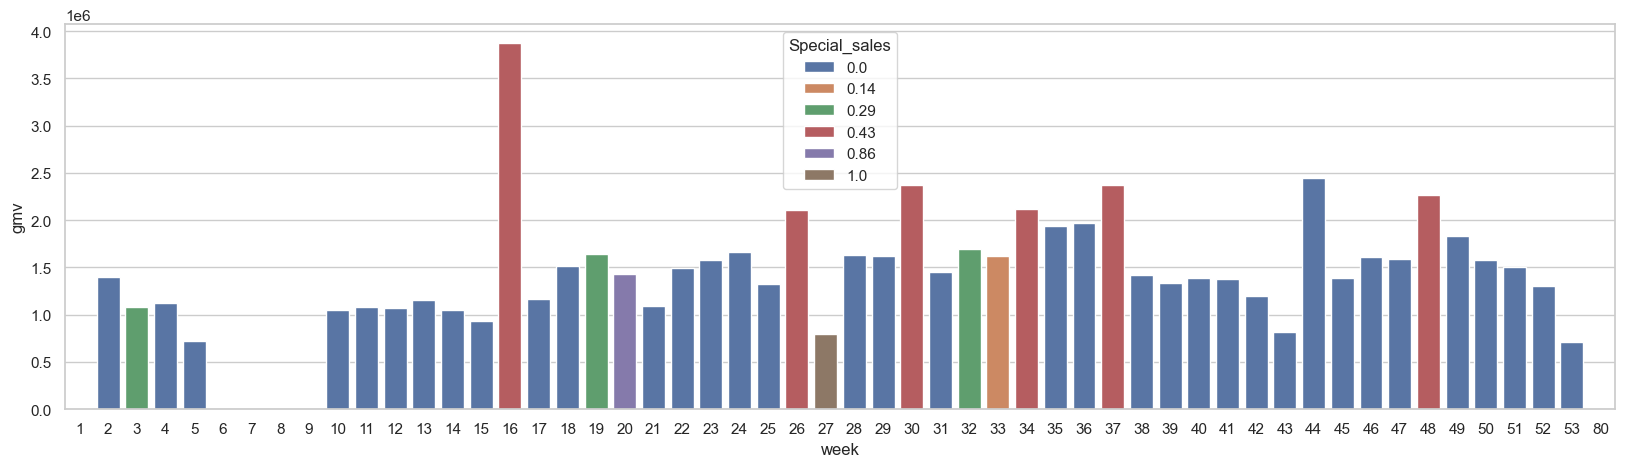

In [220]:
# GMV and Holiday Weekly

plt.figure(figsize=(20, 5))
sns.barplot(x= ga_week_viz['week'], y =ga_week_viz['gmv'], hue = ga_week_viz['Special_sales'], dodge = False)
plt.show()

In [221]:
# Moving Average for Gaming accessory

# Moving Average for listed_price and discount_offer

ga_week[['MA2_LP','MA2_Discount']] = ga_week[['listing_price','discount']].rolling(window=2,min_periods=1).mean()
ga_week[['MA3_LP','MA3_Discount']] = ga_week[['listing_price','discount']].rolling(window=3,min_periods=1).mean()
ga_week[['MA4_LP','MA4_Discount']] = ga_week[['listing_price','discount']].rolling(window=4,min_periods=1).mean()

In [222]:
# Referencing listed price Inflation

ga_week['MA2_listed_price'] = (ga_week['listing_price']-ga_week['MA2_LP'])/ga_week['MA2_LP']
ga_week['MA3_listed_price'] = (ga_week['listing_price']-ga_week['MA3_LP'])/ga_week['MA3_LP']
ga_week['MA4_listed_price'] = (ga_week['listing_price']-ga_week['MA4_LP'])/ga_week['MA4_LP']

In [223]:
### Referencing discount Inflation

ga_week['MA2_discount'] = (ga_week['discount']-ga_week['MA2_Discount'])/ga_week['MA2_Discount']
ga_week['MA3_discount'] = (ga_week['discount']-ga_week['MA3_Discount'])/ga_week['MA3_Discount']
ga_week['MA4_discount'] = (ga_week['discount']-ga_week['MA4_Discount'])/ga_week['MA4_Discount']

In [224]:
ga_week.drop(['MA2_LP','MA3_LP','MA4_LP','MA2_Discount','MA3_Discount','MA4_Discount'], axis = 1, inplace = True)
ga_week.head()

,week,gmv,listing_price,product_mrp,discount,sla,product_procurement_sla,fsn_id,order_item_id,order_id,order_payment_type,AOV,online_order_perc,index,NPS,Stock_Index,Special_sales,Payday,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other,Adstocked_Advertising,TV_ads,Digital_ads,Sponsorship_ads,Content_marketing_ads,Online_marketing_ads,Affiliates_ads,SEM_ads,Radio_ads,Other_ads,Date,MA2_listed_price,MA3_listed_price,MA4_listed_price,MA2_discount,MA3_discount,MA4_discount
0,1,17466.000,681.080,893.160,0.220,2.960,2.560,19,25,25,25,698.640,100.000,0.000,54.600,1177.000,0.000,0.200,25.500,13.200,19.360,0.100,1.460,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,0.000,0.000,0.000,0.000,0.000,0.000
1,2,1395022.000,523.566,952.250,0.412,5.055,3.026,204,2579,2445,678,570.561,26.289,1.000,54.600,1177.000,0.000,0.000,24.025,14.385,19.263,1.059,2.322,4.155,0.029,4.184,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,-0.131,-0.131,-0.131,0.305,0.305,0.305
2,3,1081512.359,446.456,751.525,0.428,5.078,2.516,209,2365,2339,534,462.382,22.579,2.000,54.600,1177.000,0.286,0.143,27.383,16.314,21.906,0.816,4.722,1.569,0.029,1.598,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,-0.079,-0.189,-0.189,0.019,0.212,0.212
3,4,1127209.000,550.361,872.806,0.352,5.149,2.328,225,1999,1967,419,573.060,20.960,3.000,54.600,1177.000,0.000,0.000,28.240,14.342,20.540,1.632,4.172,1.141,0.029,1.170,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,0.104,0.086,-0.000,-0.098,-0.115,-0.003
4,5,725030.000,551.453,876.789,0.361,5.441,2.328,217,1279,1263,241,574.054,18.843,4.000,56.139,1185.286,0.000,0.143,29.811,16.242,23.092,0.816,5.908,4.341,0.029,4.370,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,0.001,0.069,0.065,0.013,-0.051,-0.071


In [225]:
# Filling the NaN's for even distribution of data

ga_week.fillna(0, inplace=True)

In [226]:
#

In [227]:
ga_week.drop(['TV', 'Digital', 'Sponsorship', 'Content Marketing','Online marketing', ' Affiliates', 'SEM','Radio',
              'Other','Affiliates_ads','SEM_ads','Digital_ads','Radio_ads','Other_ads','Mean Temp (°C)','Min Temp (°C)',
              'order_id','order_item_id','Total Precip (mm)','Total Investment','MA3_discount',
              'MA3_listed_price','AOV','MA4_listed_price'], axis = 1, inplace = True)

In [228]:
ga_week.drop(['Max Temp (°C)'], axis = 1, inplace = True)

In [229]:
# Lag Variable functions for Gaming Accessory

# Lag of listed_price, discount_offer, NPS, Special_sales

ga_week['lag_1_listed_price'] = ga_week['listing_price'].shift(-1).fillna(0)
ga_week['lag_2_listed_price'] = ga_week['listing_price'].shift(-2).fillna(0)
ga_week['lag_3_listed_price'] = ga_week['listing_price'].shift(-3).fillna(0)

In [230]:
ga_week['lag_1_discount_offer'] = ga_week['discount'].shift(-1).fillna(0)
ga_week['lag_2_discount_offer'] = ga_week['discount'].shift(-2).fillna(0)
ga_week['lag_3_discount_offer'] = ga_week['discount'].shift(-3).fillna(0)

In [231]:
ga_week['lag_1_NPS'] = ga_week['NPS'].shift(-1).fillna(0)
ga_week['lag_2_NPS'] = ga_week['NPS'].shift(-2).fillna(0)
ga_week['lag_3_NPS'] = ga_week['NPS'].shift(-3).fillna(0)

In [232]:
ga_week['lag_1_Stock_Index'] = ga_week['Stock_Index'].shift(-1).fillna(0)
ga_week['lag_2_Stock_Index'] = ga_week['Stock_Index'].shift(-2).fillna(0)
ga_week['lag_3_Stock_Index'] = ga_week['Stock_Index'].shift(-3).fillna(0)

In [233]:
ga_week['lag_1_Special_sales'] = ga_week['Special_sales'].shift(-1).fillna(0)
ga_week['lag_2_Special_sales'] = ga_week['Special_sales'].shift(-2).fillna(0)
ga_week['lag_3_Special_sales'] = ga_week['Special_sales'].shift(-3).fillna(0)

In [234]:
ga_week['lag_1_Payday'] = ga_week['Payday'].shift(-1).fillna(0)
ga_week['lag_2_Payday'] = ga_week['Payday'].shift(-2).fillna(0)
ga_week['lag_3_Payday'] = ga_week['Payday'].shift(-3).fillna(0)

In [235]:
ga_week.head()

,week,gmv,listing_price,product_mrp,discount,sla,product_procurement_sla,fsn_id,order_payment_type,online_order_perc,index,NPS,Stock_Index,Special_sales,Payday,Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Snow on Grnd (cm),Year,Month,Adstocked_Advertising,TV_ads,Sponsorship_ads,Content_marketing_ads,Online_marketing_ads,Date,MA2_listed_price,MA2_discount,MA4_discount,lag_1_listed_price,lag_2_listed_price,lag_3_listed_price,lag_1_discount_offer,lag_2_discount_offer,lag_3_discount_offer,lag_1_NPS,lag_2_NPS,lag_3_NPS,lag_1_Stock_Index,lag_2_Stock_Index,lag_3_Stock_Index,lag_1_Special_sales,lag_2_Special_sales,lag_3_Special_sales,lag_1_Payday,lag_2_Payday,lag_3_Payday
0,1,17466.000,681.080,893.160,0.220,2.960,2.560,19,25,100.000,0.000,54.600,1177.000,0.000,0.200,0.100,1.460,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0.000,0.000,0.000,523.566,446.456,550.361,0.412,0.428,0.352,54.600,54.600,54.600,1177.000,1177.000,1177.000,0.000,0.286,0.000,0.000,0.143,0.000
1,2,1395022.000,523.566,952.250,0.412,5.055,3.026,204,678,26.289,1.000,54.600,1177.000,0.000,0.000,1.059,2.322,4.155,0.029,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,-0.131,0.305,0.305,446.456,550.361,551.453,0.428,0.352,0.361,54.600,54.600,56.139,1177.000,1177.000,1185.286,0.286,0.000,0.000,0.143,0.000,0.143
2,3,1081512.359,446.456,751.525,0.428,5.078,2.516,209,534,22.579,2.000,54.600,1177.000,0.286,0.143,0.816,4.722,1.569,0.029,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,-0.079,0.019,0.212,550.361,551.453,195.500,0.352,0.361,0.535,54.600,56.139,59.987,1177.000,1185.286,1206.000,0.000,0.000,0.000,0.000,0.143,0.000
3,4,1127209.000,550.361,872.806,0.352,5.149,2.328,225,419,20.960,3.000,54.600,1177.000,0.000,0.000,1.632,4.172,1.141,0.029,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0.104,-0.098,-0.003,551.453,195.500,805.500,0.361,0.535,0.255,56.139,59.987,59.987,1185.286,1206.000,1206.000,0.000,0.000,0.286,0.143,0.000,0.143
4,5,725030.000,551.453,876.789,0.361,5.441,2.328,217,241,18.843,4.000,56.139,1185.286,0.000,0.143,0.816,5.908,4.341,0.029,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0.001,0.013,-0.071,195.500,805.500,359.000,0.535,0.255,0.490,59.987,59.987,59.987,1206.000,1206.000,1206.000,0.000,0.286,0.143,0.000,0.143,0.000


### Home Audio Accessory

In [237]:
home_audio = consumer_elec[consumer_elec['product_analytic_sub_category'] == 'HomeAudio']

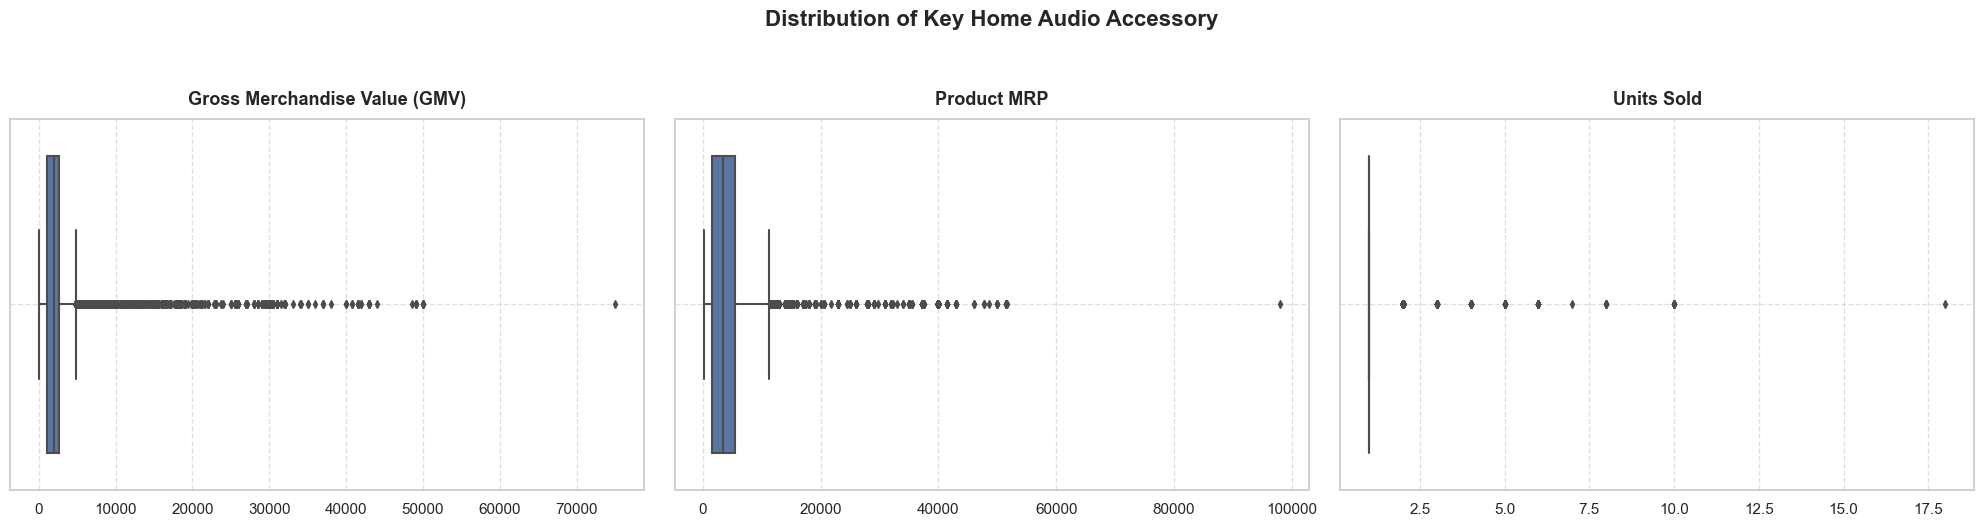

In [238]:
# Removing outliers is important as there maybe some unnecessary values and
# bulk orders can skew our analysis %%

sns.set(style="whitegrid")

# Define figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Define feature list and titles for clarity
features = ['gmv', 'product_mrp', 'units']
titles = ['Gross Merchandise Value (GMV)', 'Product MRP', 'Units Sold']

# Create boxplots in a loop
for ax, feature, title in zip(axs, features, titles):
    sns.boxplot(x=home_audio[feature], ax=ax, color='#4c72b0', fliersize=4, linewidth=1.5)
    ax.set_title(title, fontsize=13, weight='bold', pad=10)
    ax.set_xlabel("")  # Optional: Remove x-label if redundant
    ax.grid(True, linestyle='--', alpha=0.6)

# Improve spacing
plt.suptitle('Distribution of Key Home Audio Accessory', fontsize=16, weight='bold', y=1.05)
plt.tight_layout()
plt.show()


In [239]:
# Define a function to remove outliers using IQR
def remove_outliers(home_audio, column):
    Q1 = home_audio[column].quantile(0.25)
    Q3 = home_audio[column].quantile(0.75)
    IQR = Q3 - Q1
    return home_audio[(home_audio[column] >= Q1 - 1.5 * IQR) & (home_audio[column] <= Q3 + 1.5 * IQR)]

# Apply the function to the columns
home_audio = remove_outliers(home_audio, 'gmv')
home_audio = remove_outliers(home_audio, 'product_mrp')

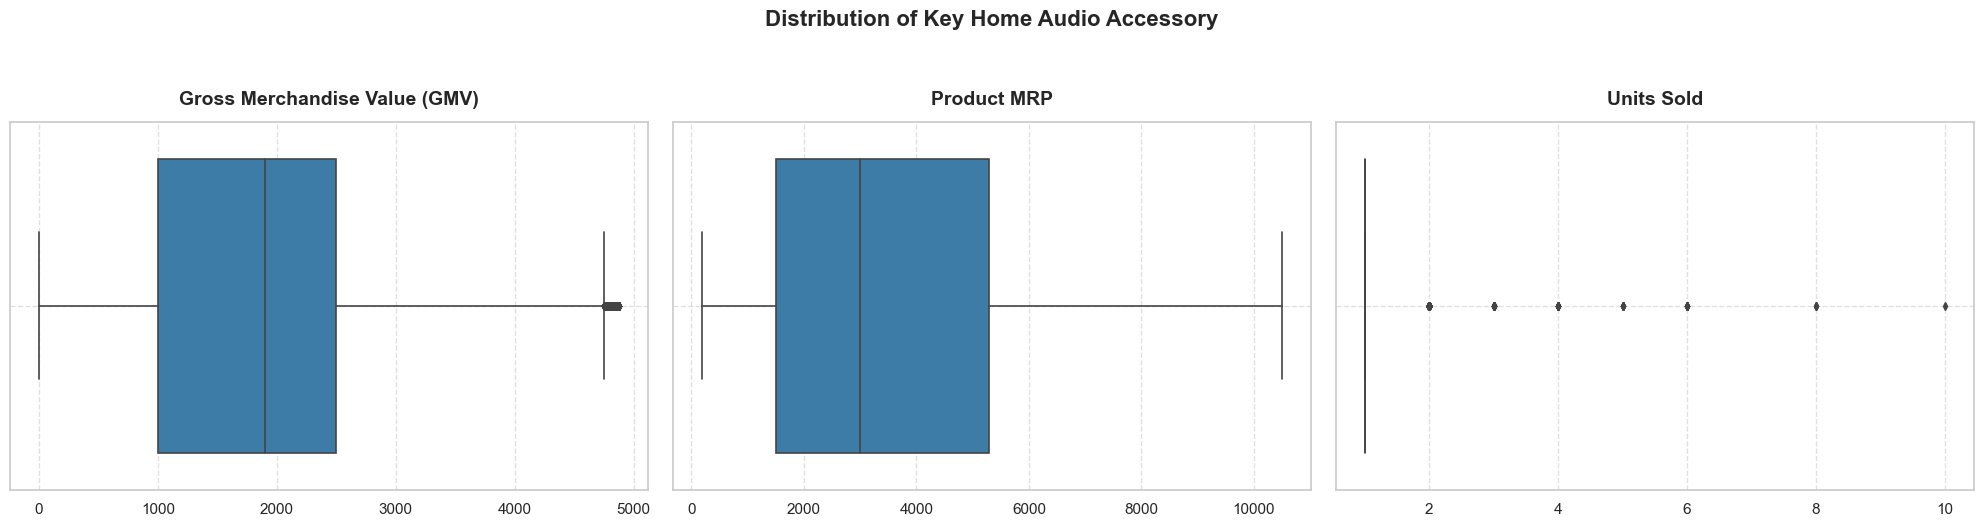

In [240]:
### Outlier Visualization

sns.set(style="whitegrid")

# Define the figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Define columns and their display titles
columns = ['gmv', 'product_mrp', 'units']
titles = ['Gross Merchandise Value (GMV)', 'Product MRP', 'Units Sold']

# Loop to create each boxplot with consistent styling
for ax, col, title in zip(axs, columns, titles):
    sns.boxplot(
        x=home_audio[col],
        ax=ax,
        color='#2c7fb8',
        fliersize=4,
        linewidth=1.2
    )
    ax.set_title(title, fontsize=14, fontweight='bold', pad=12)
    ax.set_xlabel("")  # Remove redundant x-labels
    ax.grid(True, linestyle='--', alpha=0.6)

# Add a common title and adjust layout
plt.suptitle('Distribution of Key Home Audio Accessory', fontsize=16, fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()

In [241]:
### Aggregating dataset on weekly level

ha_week = pd.DataFrame(home_audio.groupby('week').agg({'gmv':'sum','listing_price':'mean',
                                                             'product_mrp':'mean','discount':'mean',
                                                             'sla':'mean','product_procurement_sla':'mean',
                                                             'fsn_id':pd.Series.nunique,'order_item_id':pd.Series.nunique,
                                                             'order_id': pd.Series.nunique,
                                                             'order_payment_type':'sum'}))

ha_week.reset_index( inplace = True)

In [242]:
ha_week.head()

,week,gmv,listing_price,product_mrp,discount,sla,product_procurement_sla,fsn_id,order_item_id,order_id,order_payment_type
0,1,83742.000,2392.629,4369.057,0.397,2.943,3.486,19,35,35,34
1,2,3438794.133,1854.852,2973.055,0.322,6.884,2.736,196,1849,1848,439
2,3,4080736.000,1842.456,3094.090,0.338,6.747,2.658,224,2209,2204,511
3,4,3712901.000,1775.448,2959.968,0.325,6.892,2.760,225,2080,2073,434
4,5,2618227.000,1815.049,3009.683,0.324,6.962,2.654,196,1438,1436,314


In [243]:
# Similar to Camera Accessory, we will move on with the steps
# Sum of GMV / No of unique Orders

ha_week['AOV'] = ha_week['gmv']/ha_week['order_id']

In [244]:
ha_week['online_order_perc'] = ha_week['order_payment_type']*100/ha_week['order_item_id']

In [245]:
ha_week.head()

,week,gmv,listing_price,product_mrp,discount,sla,product_procurement_sla,fsn_id,order_item_id,order_id,order_payment_type,AOV,online_order_perc
0,1,83742.000,2392.629,4369.057,0.397,2.943,3.486,19,35,35,34,2392.629,97.143
1,2,3438794.133,1854.852,2973.055,0.322,6.884,2.736,196,1849,1848,439,1860.819,23.743
2,3,4080736.000,1842.456,3094.090,0.338,6.747,2.658,224,2209,2204,511,1851.514,23.133
3,4,3712901.000,1775.448,2959.968,0.325,6.892,2.760,225,2080,2073,434,1791.076,20.865
4,5,2618227.000,1815.049,3009.683,0.324,6.962,2.654,196,1438,1436,314,1823.278,21.836


In [246]:
ha_week['week'] = ha_week['week'].astype(str)
calendar['week'] = calendar['week'].astype(str)

ha_week = ha_week.merge(calendar, how='left', on='week')

In [247]:
marketing['week'] = marketing['week'].astype(str)
ha_week['week'] = ha_week['week'].astype(str)

ha_week = ha_week.merge(marketing, how='left', on='week')

In [248]:
ha_week.head()

,week,gmv,listing_price,product_mrp,discount,sla,product_procurement_sla,fsn_id,order_item_id,order_id,order_payment_type,AOV,online_order_perc,index,NPS,Stock_Index,Special_sales,Payday,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other,Adstocked_Advertising,TV_ads,Digital_ads,Sponsorship_ads,Content_marketing_ads,Online_marketing_ads,Affiliates_ads,SEM_ads,Radio_ads,Other_ads,Date
0,1,83742.000,2392.629,4369.057,0.397,2.943,3.486,19,35,35,34,2392.629,97.143,0.000,54.600,1177.000,0.000,0.200,25.500,13.200,19.360,0.100,1.460,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,2,3438794.133,1854.852,2973.055,0.322,6.884,2.736,196,1849,1848,439,1860.819,23.743,1.000,54.600,1177.000,0.000,0.000,24.025,14.385,19.263,1.059,2.322,4.155,0.029,4.184,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,3,4080736.000,1842.456,3094.090,0.338,6.747,2.658,224,2209,2204,511,1851.514,23.133,2.000,54.600,1177.000,0.286,0.143,27.383,16.314,21.906,0.816,4.722,1.569,0.029,1.598,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,4,3712901.000,1775.448,2959.968,0.325,6.892,2.760,225,2080,2073,434,1791.076,20.865,3.000,54.600,1177.000,0.000,0.000,28.240,14.342,20.540,1.632,4.172,1.141,0.029,1.170,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,5,2618227.000,1815.049,3009.683,0.324,6.962,2.654,196,1438,1436,314,1823.278,21.836,4.000,56.139,1185.286,0.000,0.143,29.811,16.242,23.092,0.816,5.908,4.341,0.029,4.370,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [249]:
#Visualizing the dataset

ha_week_viz = ha_week.round(2)

<Axes: xlabel='gmv', ylabel='Density'>

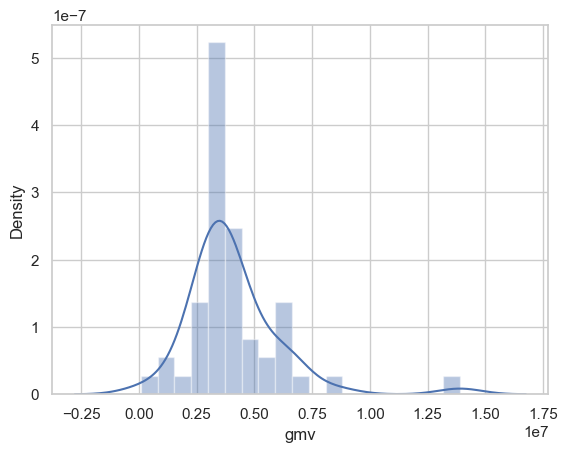

In [250]:
# Target Variable

sns.distplot(ha_week_viz['gmv'],kde=True)

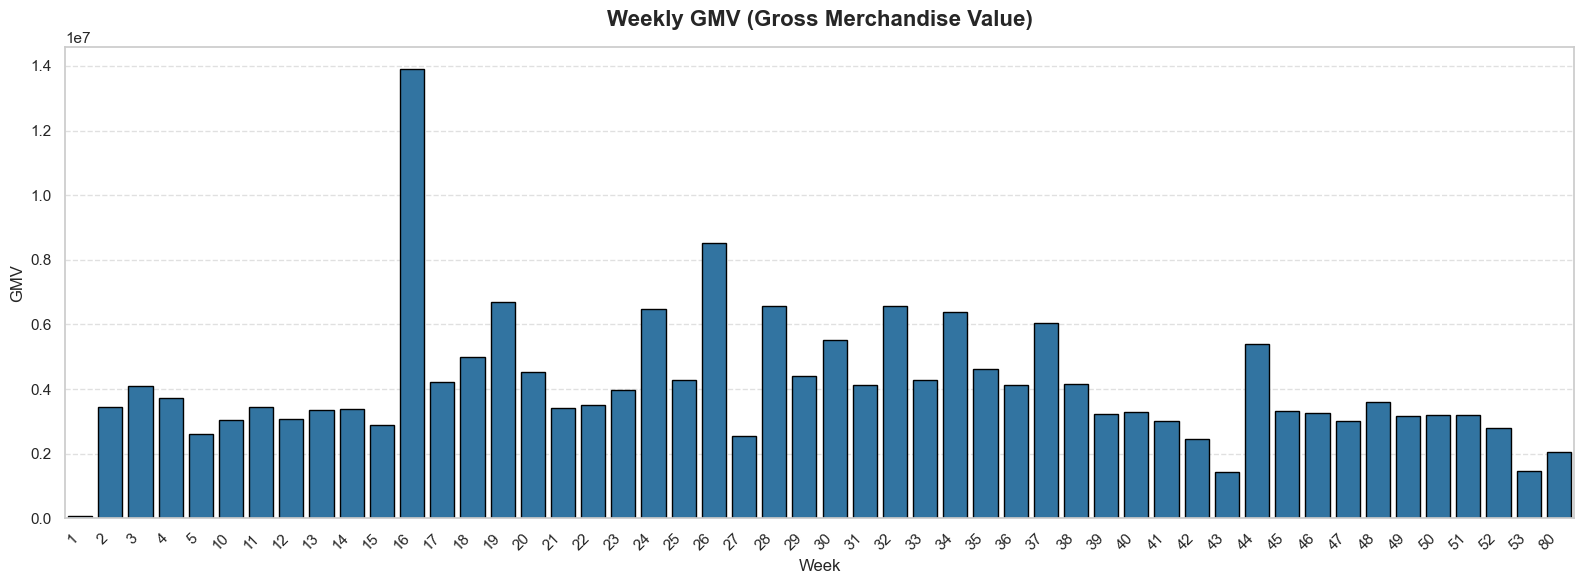

In [251]:
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(16, 6))
sns.barplot(
    data=ha_week_viz,
    x='week',
    y='gmv',
    color='#1f77b4',
    edgecolor='black'
)

# Enhance title and labels
plt.title("Weekly GMV (Gross Merchandise Value)", fontsize=16, weight='bold', pad=15)
plt.xlabel("Week", fontsize=12)
plt.ylabel("GMV", fontsize=12)

# Rotate x-axis ticks for better readability
plt.xticks(rotation=45, ha='right')

# Add grid and layout optimization
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

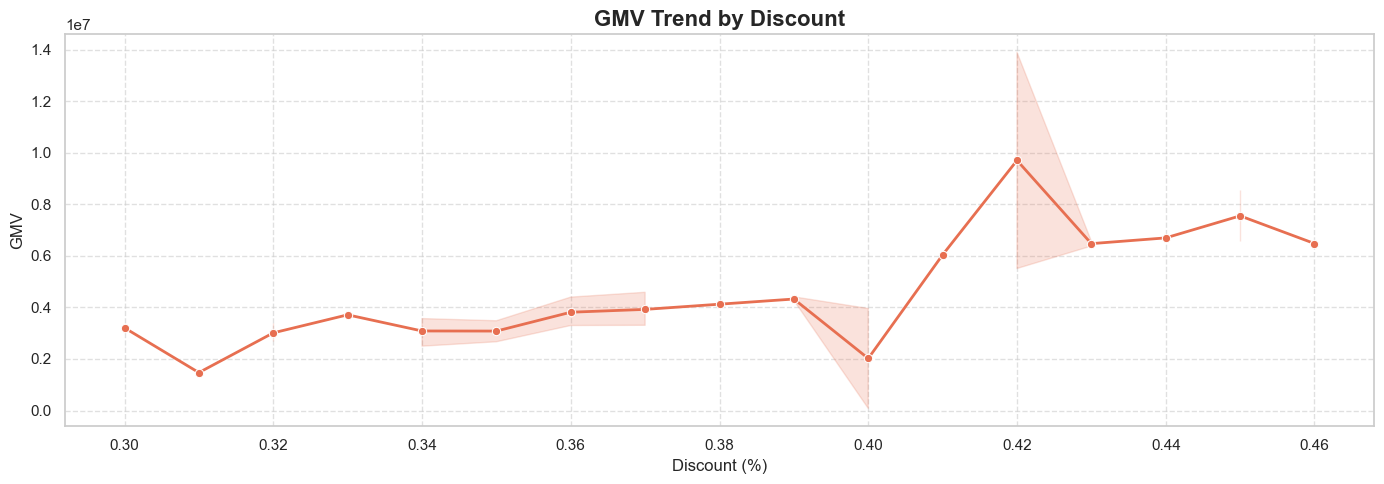

In [252]:
plt.figure(figsize=(14, 5))
sns.lineplot(
    data=ha_week_viz.sort_values('discount'),
    x='discount',
    y='gmv',
    marker='o',
    linewidth=2,
    color='#e76f51'
)
plt.title("GMV Trend by Discount", fontsize=16, weight='bold')
plt.xlabel("Discount (%)")
plt.ylabel("GMV")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Insights

###### GMV Dip at Lowest Discount: The lowest discount (~30%) shows a relatively low GMV.
###### Moderate Discounts Show Gradual Increase: GMV generally increases with discounts between ~32% and ~39%.
###### Significant GMV Spike Around 42% Discount: A notable peak in GMV occurs at approximately 42% discount.
###### Subsequent Drop and Gradual Decline: After the peak, GMV drops and then shows a gradual decline with further increasing discounts.

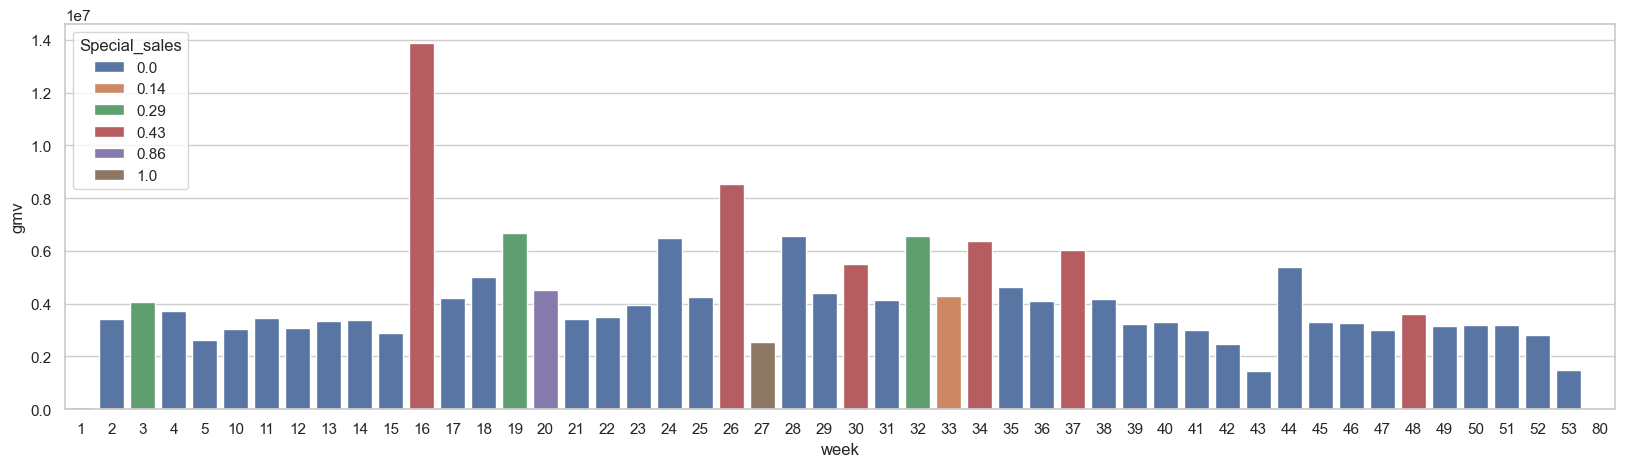

In [254]:
plt.figure(figsize=(20, 5))
sns.barplot(x= ha_week_viz['week'], y =ha_week_viz['gmv'], hue = ha_week_viz['Special_sales'], dodge = False)
plt.show()

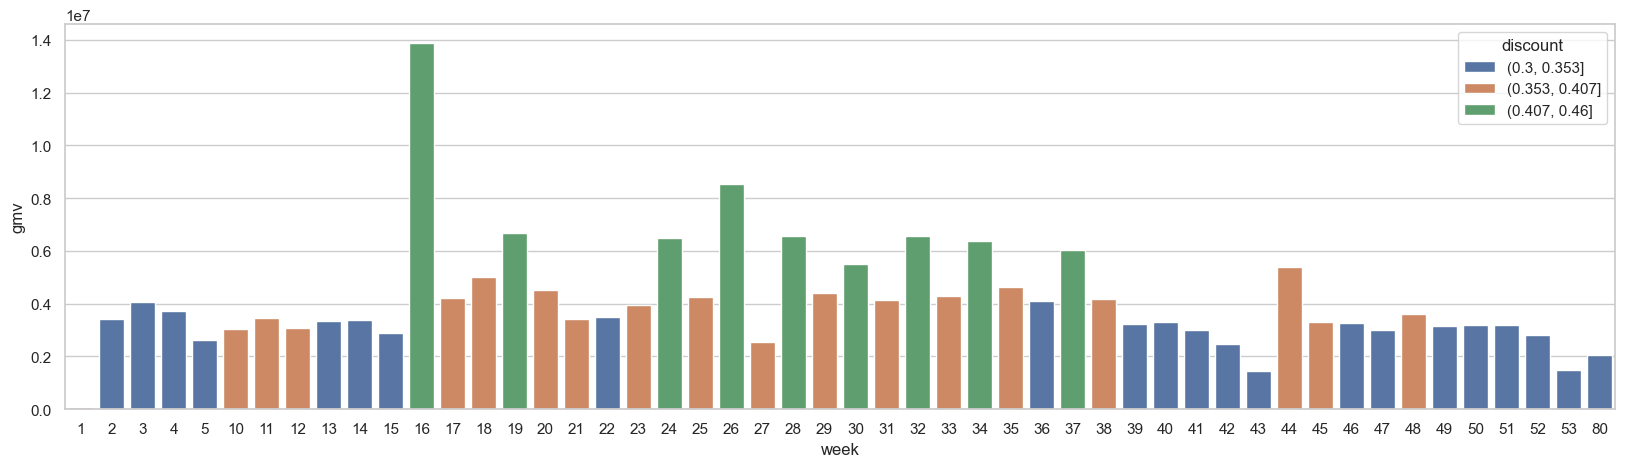

In [255]:
plt.figure(figsize=(20, 5))
sns.barplot(x= ha_week_viz['week'], y =ha_week_viz['gmv'], hue = pd.cut(ha_week_viz['discount'],3), dodge = False)
plt.show()

In [256]:
# Moving Average for Home Audio Accessory

# Moving Average for listed_price and discount_offer

ha_week[['MA2_LP','MA2_Discount']] = ha_week[['listing_price','discount']].rolling(window=2,min_periods=1).mean()
ha_week[['MA3_LP','MA3_Discount']] = ha_week[['listing_price','discount']].rolling(window=3,min_periods=1).mean()
ha_week[['MA4_LP','MA4_Discount']] = ha_week[['listing_price','discount']].rolling(window=4,min_periods=1).mean()

In [257]:
### Referencing listed price Inflation

ha_week['MA2_listed_price'] = (ha_week['listing_price']-ha_week['MA2_LP'])/ha_week['MA2_LP']
ha_week['MA3_listed_price'] = (ha_week['listing_price']-ha_week['MA3_LP'])/ha_week['MA3_LP']
ha_week['MA4_listed_price'] = (ha_week['listing_price']-ha_week['MA4_LP'])/ha_week['MA4_LP']

In [258]:
### Referencing discount Inflation

ha_week['MA2_discount'] = (ha_week['discount']-ha_week['MA2_Discount'])/ha_week['MA2_Discount']
ha_week['MA3_discount'] = (ha_week['discount']-ha_week['MA3_Discount'])/ha_week['MA3_Discount']
ha_week['MA4_discount'] = (ha_week['discount']-ha_week['MA4_Discount'])/ha_week['MA4_Discount']

In [259]:
ha_week.drop(['MA2_LP','MA3_LP','MA4_LP','MA2_Discount','MA3_Discount','MA4_Discount'], axis = 1, inplace = True)
ha_week.head()

,week,gmv,listing_price,product_mrp,discount,sla,product_procurement_sla,fsn_id,order_item_id,order_id,order_payment_type,AOV,online_order_perc,index,NPS,Stock_Index,Special_sales,Payday,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other,Adstocked_Advertising,TV_ads,Digital_ads,Sponsorship_ads,Content_marketing_ads,Online_marketing_ads,Affiliates_ads,SEM_ads,Radio_ads,Other_ads,Date,MA2_listed_price,MA3_listed_price,MA4_listed_price,MA2_discount,MA3_discount,MA4_discount
0,1,83742.000,2392.629,4369.057,0.397,2.943,3.486,19,35,35,34,2392.629,97.143,0.000,54.600,1177.000,0.000,0.200,25.500,13.200,19.360,0.100,1.460,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,0.000,0.000,0.000,0.000,0.000,0.000
1,2,3438794.133,1854.852,2973.055,0.322,6.884,2.736,196,1849,1848,439,1860.819,23.743,1.000,54.600,1177.000,0.000,0.000,24.025,14.385,19.263,1.059,2.322,4.155,0.029,4.184,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,-0.127,-0.127,-0.127,-0.104,-0.104,-0.104
2,3,4080736.000,1842.456,3094.090,0.338,6.747,2.658,224,2209,2204,511,1851.514,23.133,2.000,54.600,1177.000,0.286,0.143,27.383,16.314,21.906,0.816,4.722,1.569,0.029,1.598,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,-0.003,-0.092,-0.092,0.023,-0.042,-0.042
3,4,3712901.000,1775.448,2959.968,0.325,6.892,2.760,225,2080,2073,434,1791.076,20.865,3.000,54.600,1177.000,0.000,0.000,28.240,14.342,20.540,1.632,4.172,1.141,0.029,1.170,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,-0.019,-0.027,-0.097,-0.019,-0.009,-0.059
4,5,2618227.000,1815.049,3009.683,0.324,6.962,2.654,196,1438,1436,314,1823.278,21.836,4.000,56.139,1185.286,0.000,0.143,29.811,16.242,23.092,0.816,5.908,4.341,0.029,4.370,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,0.011,0.002,-0.004,-0.003,-0.016,-0.011


In [260]:
#

In [261]:
ha_week.drop(['TV', 'Digital', 'Sponsorship', 'Content Marketing','Online marketing', ' Affiliates', 'SEM','Radio',
              'Other','Affiliates_ads','SEM_ads','Digital_ads','Radio_ads','Other_ads','Mean Temp (°C)','Min Temp (°C)',
              'order_id','order_item_id','Total Precip (mm)','Total Investment','MA3_discount',
              'MA3_listed_price','AOV'], axis = 1, inplace = True)

In [262]:
ha_week.drop(['Max Temp (°C)'], axis = 1, inplace = True)
ha_week.head()

,week,gmv,listing_price,product_mrp,discount,sla,product_procurement_sla,fsn_id,order_payment_type,online_order_perc,index,NPS,Stock_Index,Special_sales,Payday,Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Snow on Grnd (cm),Year,Month,Adstocked_Advertising,TV_ads,Sponsorship_ads,Content_marketing_ads,Online_marketing_ads,Date,MA2_listed_price,MA4_listed_price,MA2_discount,MA4_discount
0,1,83742.000,2392.629,4369.057,0.397,2.943,3.486,19,34,97.143,0.000,54.600,1177.000,0.000,0.200,0.100,1.460,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,0.000,0.000,0.000,0.000
1,2,3438794.133,1854.852,2973.055,0.322,6.884,2.736,196,439,23.743,1.000,54.600,1177.000,0.000,0.000,1.059,2.322,4.155,0.029,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,-0.127,-0.127,-0.104,-0.104
2,3,4080736.000,1842.456,3094.090,0.338,6.747,2.658,224,511,23.133,2.000,54.600,1177.000,0.286,0.143,0.816,4.722,1.569,0.029,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,-0.003,-0.092,0.023,-0.042
3,4,3712901.000,1775.448,2959.968,0.325,6.892,2.760,225,434,20.865,3.000,54.600,1177.000,0.000,0.000,1.632,4.172,1.141,0.029,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,-0.019,-0.097,-0.019,-0.059
4,5,2618227.000,1815.049,3009.683,0.324,6.962,2.654,196,314,21.836,4.000,56.139,1185.286,0.000,0.143,0.816,5.908,4.341,0.029,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,0.011,-0.004,-0.003,-0.011


In [263]:
# Filling the NaN's for even distribution of data

ha_week.fillna(0, inplace=True)
ha_week.head()

,week,gmv,listing_price,product_mrp,discount,sla,product_procurement_sla,fsn_id,order_payment_type,online_order_perc,index,NPS,Stock_Index,Special_sales,Payday,Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Snow on Grnd (cm),Year,Month,Adstocked_Advertising,TV_ads,Sponsorship_ads,Content_marketing_ads,Online_marketing_ads,Date,MA2_listed_price,MA4_listed_price,MA2_discount,MA4_discount
0,1,83742.000,2392.629,4369.057,0.397,2.943,3.486,19,34,97.143,0.000,54.600,1177.000,0.000,0.200,0.100,1.460,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0.000,0.000,0.000,0.000
1,2,3438794.133,1854.852,2973.055,0.322,6.884,2.736,196,439,23.743,1.000,54.600,1177.000,0.000,0.000,1.059,2.322,4.155,0.029,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,-0.127,-0.127,-0.104,-0.104
2,3,4080736.000,1842.456,3094.090,0.338,6.747,2.658,224,511,23.133,2.000,54.600,1177.000,0.286,0.143,0.816,4.722,1.569,0.029,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,-0.003,-0.092,0.023,-0.042
3,4,3712901.000,1775.448,2959.968,0.325,6.892,2.760,225,434,20.865,3.000,54.600,1177.000,0.000,0.000,1.632,4.172,1.141,0.029,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,-0.019,-0.097,-0.019,-0.059
4,5,2618227.000,1815.049,3009.683,0.324,6.962,2.654,196,314,21.836,4.000,56.139,1185.286,0.000,0.143,0.816,5.908,4.341,0.029,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0.011,-0.004,-0.003,-0.011


In [264]:
# Lag variable functions for Home Audio Accessory

ha_week['lag_1_listed_price'] = ha_week['listing_price'].shift(-1).fillna(0)
ha_week['lag_2_listed_price'] = ha_week['listing_price'].shift(-2).fillna(0)
ha_week['lag_3_listed_price'] = ha_week['listing_price'].shift(-3).fillna(0)

In [265]:
ha_week['lag_1_discount_offer'] = ha_week['discount'].shift(-1).fillna(0)
ha_week['lag_2_discount_offer'] = ha_week['discount'].shift(-2).fillna(0)
ha_week['lag_3_discount_offer'] = ha_week['discount'].shift(-3).fillna(0)

In [266]:
ha_week['lag_1_NPS'] = ha_week['NPS'].shift(-1).fillna(0)
ha_week['lag_2_NPS'] = ha_week['NPS'].shift(-2).fillna(0)
ha_week['lag_3_NPS'] = ha_week['NPS'].shift(-3).fillna(0)

In [267]:
ha_week['lag_1_Stock_Index'] = ha_week['Stock_Index'].shift(-1).fillna(0)
ha_week['lag_2_Stock_Index'] = ha_week['Stock_Index'].shift(-2).fillna(0)
ha_week['lag_3_Stock_Index'] = ha_week['Stock_Index'].shift(-3).fillna(0)

In [268]:
ha_week['lag_1_Special_sales'] = ha_week['Special_sales'].shift(-1).fillna(0)
ha_week['lag_2_Special_sales'] = ha_week['Special_sales'].shift(-2).fillna(0)
ha_week['lag_3_Special_sales'] = ha_week['Special_sales'].shift(-3).fillna(0)

In [269]:
ha_week['lag_1_Payday'] = ha_week['Payday'].shift(-1).fillna(0)
ha_week['lag_2_Payday'] = ha_week['Payday'].shift(-2).fillna(0)
ha_week['lag_3_Payday'] = ha_week['Payday'].shift(-3).fillna(0)

In [270]:
ha_week.head()

,week,gmv,listing_price,product_mrp,discount,sla,product_procurement_sla,fsn_id,order_payment_type,online_order_perc,index,NPS,Stock_Index,Special_sales,Payday,Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Snow on Grnd (cm),Year,Month,Adstocked_Advertising,TV_ads,Sponsorship_ads,Content_marketing_ads,Online_marketing_ads,Date,MA2_listed_price,MA4_listed_price,MA2_discount,MA4_discount,lag_1_listed_price,lag_2_listed_price,lag_3_listed_price,lag_1_discount_offer,lag_2_discount_offer,lag_3_discount_offer,lag_1_NPS,lag_2_NPS,lag_3_NPS,lag_1_Stock_Index,lag_2_Stock_Index,lag_3_Stock_Index,lag_1_Special_sales,lag_2_Special_sales,lag_3_Special_sales,lag_1_Payday,lag_2_Payday,lag_3_Payday
0,1,83742.000,2392.629,4369.057,0.397,2.943,3.486,19,34,97.143,0.000,54.600,1177.000,0.000,0.200,0.100,1.460,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0.000,0.000,0.000,0.000,1854.852,1842.456,1775.448,0.322,0.338,0.325,54.600,54.600,54.600,1177.000,1177.000,1177.000,0.000,0.286,0.000,0.000,0.143,0.000
1,2,3438794.133,1854.852,2973.055,0.322,6.884,2.736,196,439,23.743,1.000,54.600,1177.000,0.000,0.000,1.059,2.322,4.155,0.029,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,-0.127,-0.127,-0.104,-0.104,1842.456,1775.448,1815.049,0.338,0.325,0.324,54.600,54.600,56.139,1177.000,1177.000,1185.286,0.286,0.000,0.000,0.143,0.000,0.143
2,3,4080736.000,1842.456,3094.090,0.338,6.747,2.658,224,511,23.133,2.000,54.600,1177.000,0.286,0.143,0.816,4.722,1.569,0.029,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,-0.003,-0.092,0.023,-0.042,1775.448,1815.049,1761.178,0.325,0.324,0.365,54.600,56.139,48.791,1177.000,1185.286,1116.000,0.000,0.000,0.000,0.000,0.143,0.143
3,4,3712901.000,1775.448,2959.968,0.325,6.892,2.760,225,434,20.865,3.000,54.600,1177.000,0.000,0.000,1.632,4.172,1.141,0.029,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,-0.019,-0.097,-0.019,-0.059,1815.049,1761.178,1731.846,0.324,0.365,0.368,56.139,48.791,46.925,1185.286,1116.000,1101.000,0.000,0.000,0.000,0.143,0.143,0.000
4,5,2618227.000,1815.049,3009.683,0.324,6.962,2.654,196,314,21.836,4.000,56.139,1185.286,0.000,0.143,0.816,5.908,4.341,0.029,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0.011,-0.004,-0.003,-0.011,1761.178,1731.846,1708.718,0.365,0.368,0.360,48.791,46.925,46.925,1116.000,1101.000,1101.000,0.000,0.000,0.000,0.143,0.000,0.143


# Step 6: Marketing Mix Model Building (Linear, Logarithmic and Multiplicative Model)

### Model Building - Camera Accessory

##### 1. Linear/Basic Model



In [273]:
ca_week.columns

Index(['week', 'gmv', 'listing_price', 'product_mrp', 'discount', 'sla', 'product_procurement_sla', 'fsn_id', 'order_payment_type', 'premium_product', 'online_order_perc', 'index', 'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)', 'Total Rain (mm)', 'Total Snow (cm)', 'Snow on Grnd (cm)', 'Year', 'Month', 'Adstocked_Advertising', 'TV_ads', 'Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads', 'Date', 'MA4_listed_price', 'MA2_discount_offer', 'lag_1_listed_price', 'lag_2_listed_price', 'lag_3_listed_price', 'lag_1_discount', 'lag_2_discount', 'lag_3_discount', 'lag_1_Stock_Index', 'lag_2_Stock_Index', 'lag_3_Stock_Index', 'lag_1_Special_sales', 'lag_2_Special_sales', 'lag_3_Special_sales', 'lag_1_Payday', 'lag_2_Payday', 'lag_3_Payday', 'lag_1_NPS', 'lag_2_NPS', 'lag_3_NPS'], dtype='object')

In [274]:
camera_lm = ca_week[['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)',
       'Total Rain (mm)', 'Total Snow (cm)','Snow on Grnd (cm)', 'MA4_listed_price',
       'MA2_discount_offer','premium_product']]


camera_lm.head()

,gmv,discount,sla,product_procurement_sla,order_payment_type,online_order_perc,TV_ads,Sponsorship_ads,Content_marketing_ads,Online_marketing_ads,NPS,Stock_Index,Special_sales,Payday,Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Snow on Grnd (cm),MA4_listed_price,MA2_discount_offer,premium_product
0,11151.000,0.491,2.423,2.731,26,100.000,0.000,0.000,0.000,0.000,54.600,1177.000,0.000,0.200,0.100,1.460,0.000,0.000,0.000,0.000,0.000,0
1,1160259.000,0.452,6.853,2.549,715,31.834,0.000,0.000,0.000,0.000,54.600,1177.000,0.000,0.000,1.059,2.322,4.155,0.029,0.000,0.081,-0.041,0
2,1296683.000,0.458,6.379,2.555,806,32.422,0.000,0.000,0.000,0.000,54.600,1177.000,0.286,0.143,0.816,4.722,1.569,0.029,0.000,0.062,0.006,0
3,1316325.000,0.444,6.481,2.597,770,30.653,0.000,0.000,0.000,0.000,54.600,1177.000,0.000,0.000,1.632,4.172,1.141,0.029,0.000,0.047,-0.016,0
4,894121.000,0.445,6.424,2.605,466,27.854,0.000,0.000,0.000,0.000,56.139,1185.286,0.000,0.143,0.816,5.908,4.341,0.029,0.000,0.018,0.001,0


In [275]:
### Checking for any NaN value

camera_lm.isnull().sum()

gmv                        0
discount                   0
sla                        0
product_procurement_sla    0
order_payment_type         0
online_order_perc          0
TV_ads                     0
Sponsorship_ads            0
Content_marketing_ads      0
Online_marketing_ads       0
NPS                        0
Stock_Index                0
Special_sales              0
Payday                     0
Heat Deg Days (°C)         0
Cool Deg Days (°C)         0
Total Rain (mm)            0
Total Snow (cm)            0
Snow on Grnd (cm)          0
MA4_listed_price           0
MA2_discount_offer         0
premium_product            0
dtype: int64

In [276]:
# Splitting the train and test dataset

np.random.seed(0)
df_train, df_test = train_test_split(camera_lm, train_size = 0.7, test_size = 0.3, random_state = 100)

In [277]:
### Creating scaling object

scaler = MinMaxScaler()


### Creating a list of the variables that you need to scale
varlist = ['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)',
       'Total Rain (mm)', 'Total Snow (cm)','Snow on Grnd (cm)', 'MA4_listed_price',
       'MA2_discount_offer','premium_product']

### Scaling these variables using 'fit_transform'
df_train[varlist] = scaler.fit_transform(df_train[varlist])

In [278]:
df_train.head()

,gmv,discount,sla,product_procurement_sla,order_payment_type,online_order_perc,TV_ads,Sponsorship_ads,Content_marketing_ads,Online_marketing_ads,NPS,Stock_Index,Special_sales,Payday,Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Snow on Grnd (cm),MA4_listed_price,MA2_discount_offer,premium_product
26,0.529,0.423,0.346,0.931,0.172,0.000,0.000,0.000,0.000,0.000,0.173,0.163,0.000,0.000,0.862,0.189,0.501,0.731,0.000,0.000,0.877,0.000
41,0.237,0.708,0.000,0.674,0.437,0.948,0.000,0.000,0.000,0.000,0.477,1.000,0.000,0.000,0.400,0.142,0.054,0.039,0.000,0.450,0.776,0.000
28,0.491,0.383,0.544,0.795,0.195,0.050,0.000,0.000,0.000,0.000,0.173,0.163,1.000,0.000,0.416,0.331,0.142,0.079,0.000,0.274,0.755,0.000
38,0.500,0.504,0.293,0.597,0.550,0.449,0.000,0.000,0.000,0.000,0.374,0.429,0.000,1.000,0.877,0.000,0.260,0.345,0.000,0.333,0.796,0.000
17,0.521,0.361,0.434,0.898,0.166,0.019,0.000,0.000,0.000,0.000,0.167,0.960,0.667,0.000,0.317,0.094,0.157,0.020,0.000,0.392,0.834,0.000


In [279]:
### Splitting the train dataset into X and y

X_train = df_train.drop('gmv',axis=1)
y_train = df_train['gmv']

In [280]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(estimator=lm, n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)

In [281]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('discount', True, 1),
 ('sla', True, 1),
 ('product_procurement_sla', True, 1),
 ('order_payment_type', True, 1),
 ('online_order_perc', True, 1),
 ('TV_ads', False, 8),
 ('Sponsorship_ads', False, 11),
 ('Content_marketing_ads', False, 9),
 ('Online_marketing_ads', False, 10),
 ('NPS', True, 1),
 ('Stock_Index', False, 6),
 ('Special_sales', True, 1),
 ('Payday', False, 4),
 ('Heat Deg Days (°C)', False, 7),
 ('Cool Deg Days (°C)', False, 5),
 ('Total Rain (mm)', False, 3),
 ('Total Snow (cm)', True, 1),
 ('Snow on Grnd (cm)', False, 2),
 ('MA4_listed_price', True, 1),
 ('MA2_discount_offer', True, 1),
 ('premium_product', False, 12)]

In [282]:
X_train.columns[rfe.support_]

Index(['discount', 'sla', 'product_procurement_sla', 'order_payment_type', 'online_order_perc', 'NPS', 'Special_sales', 'Total Snow (cm)', 'MA4_listed_price', 'MA2_discount_offer'], dtype='object')

In [283]:
# Building model with statsmodel

X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,discount,sla,product_procurement_sla,order_payment_type,online_order_perc,NPS,Special_sales,Total Snow (cm),MA4_listed_price,MA2_discount_offer
26,0.423,0.346,0.931,0.172,0.000,0.173,0.000,0.731,0.000,0.877
41,0.708,0.000,0.674,0.437,0.948,0.477,0.000,0.039,0.450,0.776
28,0.383,0.544,0.795,0.195,0.050,0.173,1.000,0.079,0.274,0.755
38,0.504,0.293,0.597,0.550,0.449,0.374,0.000,0.345,0.333,0.796
17,0.361,0.434,0.898,0.166,0.019,0.167,0.667,0.020,0.392,0.834


In [284]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X

def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [285]:
# Model 1

X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     29.30
Date:                Sun, 18 May 2025   Prob (F-statistic):           1.22e-11
Time:                        11:31:21   Log-Likelihood:                 61.341
No. Observations:                  37   AIC:                            -100.7
Df Residuals:                      26   BIC:                            -82.96
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [286]:
checkVIF(X_train_new)

,Features,VIF
0,const,315.270
1,discount,8.500
3,product_procurement_sla,7.640
10,MA2_discount_offer,5.270
5,online_order_perc,5.150
4,order_payment_type,4.590
2,sla,4.050
6,NPS,2.420
9,MA4_listed_price,2.290
7,Special_sales,1.500


In [287]:
# Dropping columns to adjust the VIF

X_train_new = X_train_rfe.drop(["discount"], axis = 1)

In [288]:
# Model 2

X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     22.10
Date:                Sun, 18 May 2025   Prob (F-statistic):           3.08e-10
Time:                        11:31:21   Log-Likelihood:                 54.262
No. Observations:                  37   AIC:                            -88.52
Df Residuals:                      27   BIC:                            -72.41
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [289]:
# Checking VIF once again

checkVIF(X_train_new)

,Features,VIF
0,const,104.370
9,MA2_discount_offer,4.890
4,online_order_perc,4.240
2,product_procurement_sla,3.850
3,order_payment_type,3.210
1,sla,2.350
5,NPS,2.010
8,MA4_listed_price,2.010
6,Special_sales,1.450
7,Total Snow (cm),1.200


In [290]:
# So we can see that all the parameters have VIF less than 5, so we can move on to Residual Analysis of Model

lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

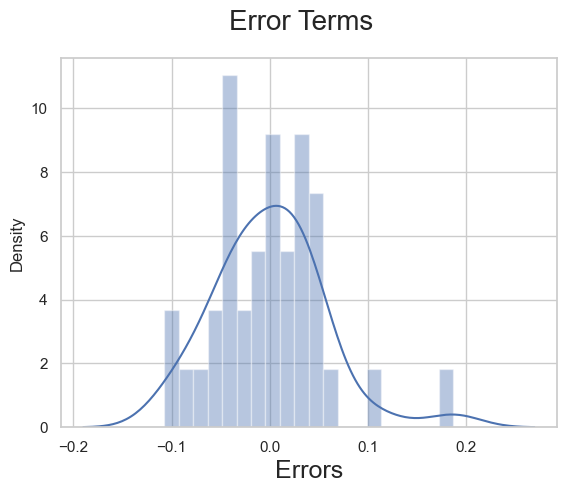

In [291]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)

##### Error curve looks like an approximate normal distribution, so the assumption on the linear modeling seems to be fulfilled.

In [293]:
# Prediction and Evaluation

#Scaling the test set
num_vars = ['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)',
              'Total Rain (mm)', 'Total Snow (cm)','Snow on Grnd (cm)', 'MA4_listed_price',
       'MA2_discount_offer','premium_product']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [294]:
#Dividing into X and y
y_test = df_test.pop('gmv')
X_test = df_test

In [295]:
# Now let's use our model to make predictions.
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable
X_test_new = sm.add_constant(X_test_new)

In [296]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [297]:
r2_score(y_test, y_pred)

0.8314157388785288

Text(0, 0.5, 'y_pred')

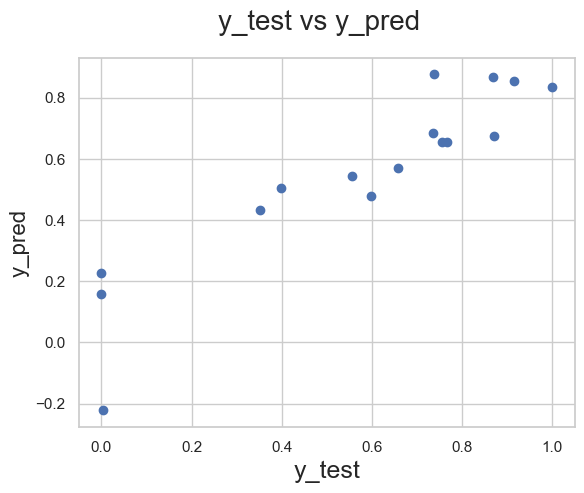

In [298]:
# Plotting y_test and y_pred to understand the spread.

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

#### Insights

##### Positive Correlation: Generally, as the true values (y_test) increase, the predicted values (y_pred) also tend to increase. This indicates that your model has captured some of the underlying relationship in the data.

##### Scatter Indicates Errors: The fact that the points aren't perfectly aligned along a straight diagonal line (where y_test would equal y_pred) shows that there are errors in the predictions. The further a point is from this imaginary diagonal, the larger the prediction error for that particular data point.

In [300]:
#Evaluation of the model statistics

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     22.10
Date:                Sun, 18 May 2025   Prob (F-statistic):           3.08e-10
Time:                        11:31:22   Log-Likelihood:                 54.262
No. Observations:                  37   AIC:                            -88.52
Df Residuals:                      27   BIC:                            -72.41
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

#### Model Summary:

##### The linear regression model achieved an R-squared of 0.88, indicating that 88% of the variation in GMV

##### The variation is explained by the selected predictors. The adjusted R-squared (0.84) confirms the model's strong fit.

##### Significant drivers include order_payment_type (positive), online_order_perc (negative), and special_sales (positive).

##### While a few variables like discount and snow did not show statistical significance

##### Overall we can say that the model performed well.

##### 2. Logarithmic Model

In [303]:
# Log transform target

y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

In [304]:
# Training the model

lr = LinearRegression()
lr.fit(X_train, y_train_log)

LinearRegression()

In [305]:
# Predicting on test

y_pred_log = lr.predict(X_test)

In [306]:
# Converting prediction back to original scale

y_pred = np.expm1(y_pred_log)

In [307]:
# Evaluating

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE (on original scale): {rmse:.4f}")

RMSE (on original scale): 0.1723


#### Model Summary:

##### The log-linear model yielded an RMSE of 0.1723 on the original GMV scale,
##### It indicates a reasonably good fit with low prediction error.
##### The logarithmic transformation helped stabilize variance and capture non-linear effects.


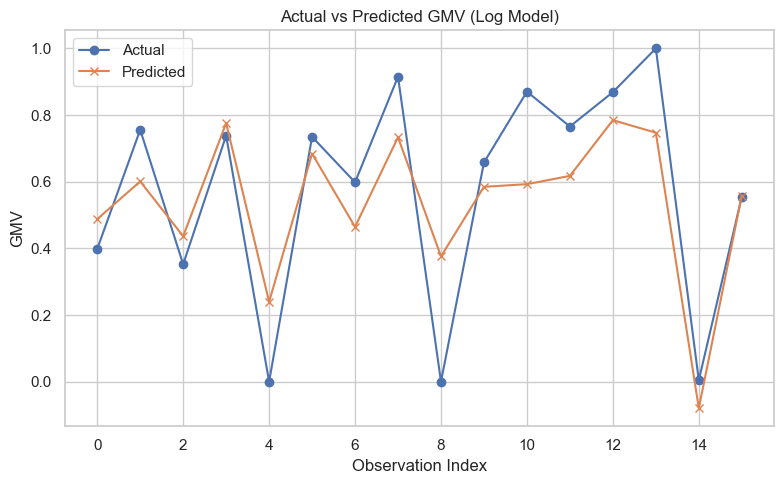

In [309]:
# Visualizing the RMSE score for a comprehensive view

plt.figure(figsize=(8, 5))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title("Actual vs Predicted GMV (Log Model)")
plt.xlabel("Observation Index")
plt.ylabel("GMV")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### 3. Multiplicative Model

In [311]:
ca_week.columns

Index(['week', 'gmv', 'listing_price', 'product_mrp', 'discount', 'sla', 'product_procurement_sla', 'fsn_id', 'order_payment_type', 'premium_product', 'online_order_perc', 'index', 'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)', 'Total Rain (mm)', 'Total Snow (cm)', 'Snow on Grnd (cm)', 'Year', 'Month', 'Adstocked_Advertising', 'TV_ads', 'Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads', 'Date', 'MA4_listed_price', 'MA2_discount_offer', 'lag_1_listed_price', 'lag_2_listed_price', 'lag_3_listed_price', 'lag_1_discount', 'lag_2_discount', 'lag_3_discount', 'lag_1_Stock_Index', 'lag_2_Stock_Index', 'lag_3_Stock_Index', 'lag_1_Special_sales', 'lag_2_Special_sales', 'lag_3_Special_sales', 'lag_1_Payday', 'lag_2_Payday', 'lag_3_Payday', 'lag_1_NPS', 'lag_2_NPS', 'lag_3_NPS'], dtype='object')

In [312]:
camera_mm = ca_week[['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)',
       'Total Rain (mm)', 'Total Snow (cm)','Snow on Grnd (cm)','MA4_listed_price','MA2_discount_offer']]

camera_mm.head(2)

,gmv,discount,sla,product_procurement_sla,order_payment_type,online_order_perc,TV_ads,Sponsorship_ads,Content_marketing_ads,Online_marketing_ads,NPS,Stock_Index,Special_sales,Payday,Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Snow on Grnd (cm),MA4_listed_price,MA2_discount_offer
0,11151.000,0.491,2.423,2.731,26,100.000,0.000,0.000,0.000,0.000,54.600,1177.000,0.000,0.200,0.100,1.460,0.000,0.000,0.000,0.000,0.000
1,1160259.000,0.452,6.853,2.549,715,31.834,0.000,0.000,0.000,0.000,54.600,1177.000,0.000,0.000,1.059,2.322,4.155,0.029,0.000,0.081,-0.041


In [313]:
### Applying Log
camera_mm=np.log(camera_mm)

camera_mm = camera_mm.fillna(0)
camera_mm = camera_mm.replace([np.inf, -np.inf], 0)

In [314]:
camera_mm.head()

,gmv,discount,sla,product_procurement_sla,order_payment_type,online_order_perc,TV_ads,Sponsorship_ads,Content_marketing_ads,Online_marketing_ads,NPS,Stock_Index,Special_sales,Payday,Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Snow on Grnd (cm),MA4_listed_price,MA2_discount_offer
0,9.319,-0.712,0.885,1.005,3.258,4.605,0.000,0.000,0.000,0.000,4.000,7.071,0.000,-1.609,-2.303,0.378,0.000,0.000,0.000,0.000,0.000
1,13.964,-0.794,1.925,0.936,6.572,3.461,0.000,0.000,0.000,0.000,4.000,7.071,0.000,0.000,0.057,0.842,1.424,-3.532,0.000,-2.516,0.000
2,14.075,-0.782,1.853,0.938,6.692,3.479,0.000,0.000,0.000,0.000,4.000,7.071,-1.253,-1.946,-0.203,1.552,0.451,-3.532,0.000,-2.779,-5.099
3,14.090,-0.813,1.869,0.954,6.646,3.423,0.000,0.000,0.000,0.000,4.000,7.071,0.000,0.000,0.490,1.428,0.131,-3.532,0.000,-3.065,0.000
4,13.704,-0.810,1.860,0.957,6.144,3.327,0.000,0.000,0.000,0.000,4.028,7.078,0.000,-1.946,-0.203,1.776,1.468,-3.532,0.000,-4.045,-6.511


In [315]:
# Scaling the dataset

scaler = MinMaxScaler()

# Creating a list of the variables that you need to scale
varlist = ['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)',
       'Total Rain (mm)', 'Total Snow (cm)','Snow on Grnd (cm)', 'MA4_listed_price',
       'MA2_discount_offer']

### Scaling these variables using 'fit_transform'
camera_mm[varlist] = scaler.fit_transform(camera_mm[varlist])

In [316]:
# Splitting the train dataset into X and y

x = camera_mm.drop('gmv',axis=1)
y = camera_mm['gmv']

camera_train_mm = camera_mm

In [317]:
print("X = Independent variable & Y = Target variable")
print(x.shape,y.shape)

X = Independent variable & Y = Target variable
(53, 20) (53,)


In [318]:
### Instantiate
mm = LinearRegression()

### Fit a line
mm.fit(x,y)

LinearRegression()

In [319]:
### Coefficient values

coef = pd.DataFrame(x.columns)
coef['Coefficient'] = pd.Series(mm.coef_)
coef

,0,Coefficient
0,discount,-0.322
1,sla,-0.110
2,product_procurement_sla,-0.180
3,order_payment_type,1.065
4,online_order_perc,-0.270
5,TV_ads,0.000
6,Sponsorship_ads,0.000
7,Content_marketing_ads,0.000
8,Online_marketing_ads,-0.000
9,NPS,-1.966


In [320]:
col = x.columns
col

Index(['discount', 'sla', 'product_procurement_sla', 'order_payment_type', 'online_order_perc', 'TV_ads', 'Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads', 'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)', 'Total Rain (mm)', 'Total Snow (cm)', 'Snow on Grnd (cm)', 'MA4_listed_price', 'MA2_discount_offer'], dtype='object')

In [321]:
# Creating elasticity

df = pd.DataFrame({
    'Feature': ['discount', 'sla', 'product_procurement_sla', 'order_payment_type', 'online_order_perc', 'NPS', 'Stock_Index', 'Special_sales', 'Payday'],
    'Elasticity': [-0.322, -0.110, -0.180, 1.065, -0.270, -1.966, 1.829, -0.004, 0.009]
})

df = df.round(3)
df.sort_values(by='Elasticity', ascending=False, inplace=True)


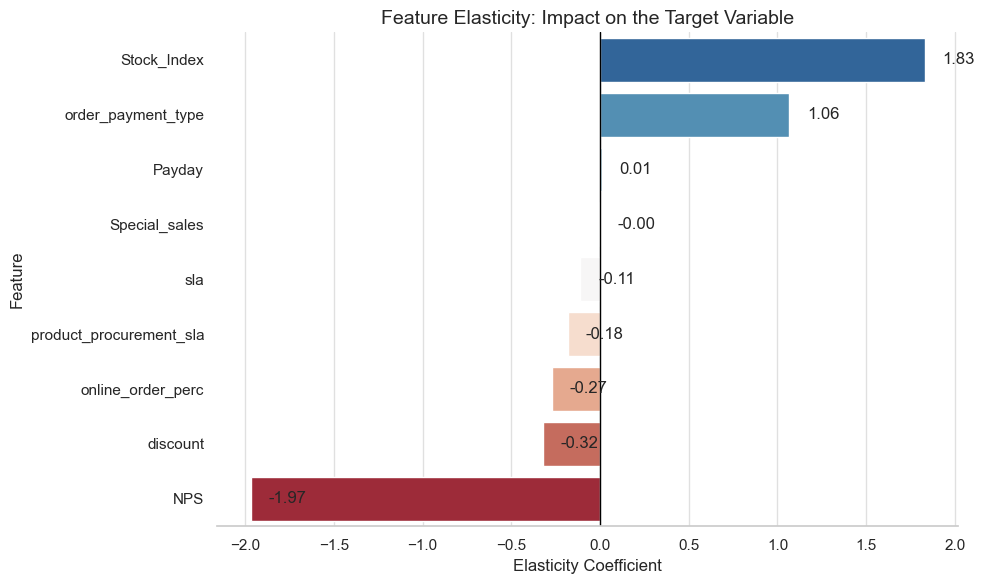

In [322]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.barplot(y='Feature', x='Elasticity', data=df, palette='RdBu_r')
plt.title('Feature Elasticity: Impact on the Target Variable', fontsize=14)
plt.xlabel('Elasticity Coefficient', fontsize=12)
plt.ylabel('Feature', fontsize=12)
for index, value in enumerate(df['Elasticity']):
    plt.text(value + 0.1, index, f'{value:.2f}', va='center')
plt.axvline(0, color='black', linewidth=1)
plt.grid(axis='x', linestyle='-', alpha=0.6)
sns.despine(left=True)
plt.tight_layout()
plt.show()


### Multiplicative model

#### coefficients directly represent elasticities.
#### Positive elasticities indicate a % increase in GMV with a 1% increase in the variable.
#### Negative elasticities show diminishing returns or adverse effects.
#### Key positive drivers: order_payment_type (1.07), Stock_Index (1.83)
#### Strong negative drivers: NPS (-1.97), discount (-0.32), online_order_perc (-0.27)

# Model Building - Gaming Accessory

### 1. Linear/Basic Model

In [326]:
ga_week.columns

Index(['week', 'gmv', 'listing_price', 'product_mrp', 'discount', 'sla', 'product_procurement_sla', 'fsn_id', 'order_payment_type', 'online_order_perc', 'index', 'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)', 'Total Rain (mm)', 'Total Snow (cm)', 'Snow on Grnd (cm)', 'Year', 'Month', 'Adstocked_Advertising', 'TV_ads', 'Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads', 'Date', 'MA2_listed_price', 'MA2_discount', 'MA4_discount', 'lag_1_listed_price', 'lag_2_listed_price', 'lag_3_listed_price', 'lag_1_discount_offer', 'lag_2_discount_offer', 'lag_3_discount_offer', 'lag_1_NPS', 'lag_2_NPS', 'lag_3_NPS', 'lag_1_Stock_Index', 'lag_2_Stock_Index', 'lag_3_Stock_Index', 'lag_1_Special_sales', 'lag_2_Special_sales', 'lag_3_Special_sales', 'lag_1_Payday', 'lag_2_Payday', 'lag_3_Payday'], dtype='object')

In [327]:
gaming_lm = ga_week[['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)', 'Total Rain (mm)', 'Total Snow (cm)', 'Snow on Grnd (cm)', 'MA2_listed_price']]


gaming_lm.head()

,gmv,discount,sla,product_procurement_sla,order_payment_type,online_order_perc,TV_ads,Sponsorship_ads,Content_marketing_ads,Online_marketing_ads,NPS,Stock_Index,Special_sales,Payday,Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Snow on Grnd (cm),MA2_listed_price
0,17466.000,0.220,2.960,2.560,25,100.000,0.000,0.000,0.000,0.000,54.600,1177.000,0.000,0.200,0.100,1.460,0.000,0.000,0.000,0.000
1,1395022.000,0.412,5.055,3.026,678,26.289,0.000,0.000,0.000,0.000,54.600,1177.000,0.000,0.000,1.059,2.322,4.155,0.029,0.000,-0.131
2,1081512.359,0.428,5.078,2.516,534,22.579,0.000,0.000,0.000,0.000,54.600,1177.000,0.286,0.143,0.816,4.722,1.569,0.029,0.000,-0.079
3,1127209.000,0.352,5.149,2.328,419,20.960,0.000,0.000,0.000,0.000,54.600,1177.000,0.000,0.000,1.632,4.172,1.141,0.029,0.000,0.104
4,725030.000,0.361,5.441,2.328,241,18.843,0.000,0.000,0.000,0.000,56.139,1185.286,0.000,0.143,0.816,5.908,4.341,0.029,0.000,0.001


In [328]:
### Checking for any NaN values

gaming_lm.isnull().sum()

gmv                        0
discount                   0
sla                        0
product_procurement_sla    0
order_payment_type         0
online_order_perc          0
TV_ads                     0
Sponsorship_ads            0
Content_marketing_ads      0
Online_marketing_ads       0
NPS                        0
Stock_Index                0
Special_sales              0
Payday                     0
Heat Deg Days (°C)         0
Cool Deg Days (°C)         0
Total Rain (mm)            0
Total Snow (cm)            0
Snow on Grnd (cm)          0
MA2_listed_price           0
dtype: int64

In [329]:
# Splitting the train and test dataset

np.random.seed(0)
df_train, df_test = train_test_split(gaming_lm, train_size = 0.7, test_size = 0.3, random_state = 100)

In [330]:
### Creating a scaling object

scaler = MinMaxScaler()


### Creating a list of the variables that you need to scale
varlist = ['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)',
       'Total Rain (mm)', 'Total Snow (cm)','Snow on Grnd (cm)']


### Scale these variables using 'fit_transform'
df_train[varlist] = scaler.fit_transform(df_train[varlist])

In [331]:
df_train.head()

,gmv,discount,sla,product_procurement_sla,order_payment_type,online_order_perc,TV_ads,Sponsorship_ads,Content_marketing_ads,Online_marketing_ads,NPS,Stock_Index,Special_sales,Payday,Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Snow on Grnd (cm),MA2_listed_price
41,0.310,0.544,0.809,0.389,0.782,1.000,0.000,0.000,0.000,0.000,0.477,1.000,0.000,1.000,0.639,0.094,0.000,0.027,0.000,-0.011
42,0.211,0.625,0.441,0.181,0.523,0.975,0.000,0.000,0.000,0.000,0.477,1.000,0.000,0.000,0.456,0.142,0.045,0.054,0.000,-0.002
35,0.507,0.855,0.775,0.290,0.242,0.163,0.000,0.000,0.000,0.000,0.308,0.130,0.000,1.000,0.894,0.189,0.096,0.973,0.667,0.014
50,0.387,0.585,0.799,0.065,0.177,0.176,0.000,0.000,0.000,0.000,0.392,0.789,0.000,1.000,0.182,0.502,0.120,0.054,0.000,0.003
17,0.390,0.579,0.784,0.026,0.166,0.152,0.000,0.000,0.000,0.000,0.024,0.874,0.000,1.000,0.513,0.236,0.165,0.108,0.000,-0.051


In [332]:
### Splitting the train dataset into X and y

X_train = df_train.drop('gmv',axis=1)
y_train = df_train['gmv']

In [333]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(estimator=lm, n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)

In [334]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('discount', True, 1),
 ('sla', True, 1),
 ('product_procurement_sla', False, 5),
 ('order_payment_type', True, 1),
 ('online_order_perc', True, 1),
 ('TV_ads', False, 7),
 ('Sponsorship_ads', False, 10),
 ('Content_marketing_ads', False, 9),
 ('Online_marketing_ads', False, 8),
 ('NPS', True, 1),
 ('Stock_Index', False, 3),
 ('Special_sales', False, 2),
 ('Payday', False, 6),
 ('Heat Deg Days (°C)', True, 1),
 ('Cool Deg Days (°C)', True, 1),
 ('Total Rain (mm)', False, 4),
 ('Total Snow (cm)', True, 1),
 ('Snow on Grnd (cm)', True, 1),
 ('MA2_listed_price', True, 1)]

In [335]:
X_train.columns[rfe.support_]

Index(['discount', 'sla', 'order_payment_type', 'online_order_perc', 'NPS', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)', 'Total Snow (cm)', 'Snow on Grnd (cm)', 'MA2_listed_price'], dtype='object')

In [336]:
# Building model with statsmodel

X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,discount,sla,order_payment_type,online_order_perc,NPS,Heat Deg Days (°C),Cool Deg Days (°C),Total Snow (cm),Snow on Grnd (cm),MA2_listed_price
41,0.544,0.809,0.782,1.000,0.477,0.639,0.094,0.027,0.000,-0.011
42,0.625,0.441,0.523,0.975,0.477,0.456,0.142,0.054,0.000,-0.002
35,0.855,0.775,0.242,0.163,0.308,0.894,0.189,0.973,0.667,0.014
50,0.585,0.799,0.177,0.176,0.392,0.182,0.502,0.054,0.000,0.003
17,0.579,0.784,0.166,0.152,0.024,0.513,0.236,0.108,0.000,-0.051


In [337]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X

def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [338]:
# Model 1

X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     15.49
Date:                Sun, 18 May 2025   Prob (F-statistic):           1.50e-08
Time:                        11:31:24   Log-Likelihood:                 48.239
No. Observations:                  37   AIC:                            -74.48
Df Residuals:                      26   BIC:                            -56.76
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.4190      0

In [339]:
# Checking the VIF

checkVIF(X_train_new)

,Features,VIF
0,const,89.650
6,Heat Deg Days (°C),6.980
8,Total Snow (cm),4.270
4,online_order_perc,4.100
2,sla,3.960
3,order_payment_type,3.930
7,Cool Deg Days (°C),3.510
10,MA2_listed_price,2.410
1,discount,2.350
9,Snow on Grnd (cm),2.340


In [340]:
# Dropping columns to adjust the VIF

X_train_new = X_train_rfe.drop(["Heat Deg Days (°C)"], axis = 1)

In [341]:
# Model 2

X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     17.75
Date:                Sun, 18 May 2025   Prob (F-statistic):           3.67e-09
Time:                        11:31:24   Log-Likelihood:                 48.129
No. Observations:                  37   AIC:                            -76.26
Df Residuals:                      27   BIC:                            -60.15
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.4261      0

In [342]:
# Checking VIF once again

checkVIF(X_train_new)

,Features,VIF
0,const,87.700
3,order_payment_type,3.820
4,online_order_perc,3.740
2,sla,2.990
6,Cool Deg Days (°C),2.730
7,Total Snow (cm),2.410
9,MA2_listed_price,2.290
5,NPS,2.240
8,Snow on Grnd (cm),2.180
1,discount,1.850


In [343]:
# So we can see that all the parameters have VIF less than 5, so we can move on to Residual Analysis of Model

lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

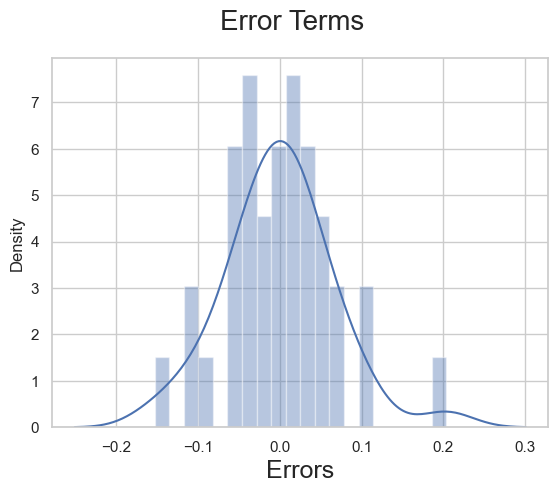

In [344]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)

##### Error curve looks like an approximate normal distribution, so the assumption on the linear modeling seems to be fulfilled.

In [346]:
# Prediction and Evaluation

num_vars = ['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)',
              'Total Rain (mm)', 'Total Snow (cm)','Snow on Grnd (cm)']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [347]:
#Dividing into X and y
y_test = df_test.pop('gmv')
X_test = df_test

In [348]:
# Now let's use our model to make predictions.
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable
X_test_new = sm.add_constant(X_test_new)

In [349]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [350]:
r2_score(y_test, y_pred)

-1.1026050110248717

Text(0, 0.5, 'y_pred')

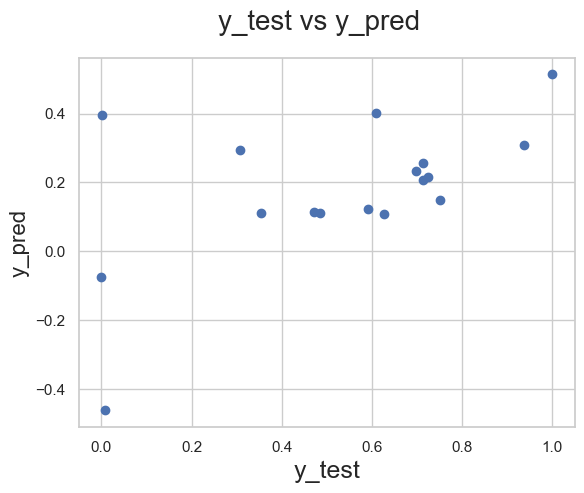

In [351]:
# Plotting y_test and y_pred to understand the spread.

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

In [352]:
#Evaluation of the model statistics

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     17.75
Date:                Sun, 18 May 2025   Prob (F-statistic):           3.67e-09
Time:                        11:31:25   Log-Likelihood:                 48.129
No. Observations:                  37   AIC:                            -76.26
Df Residuals:                      27   BIC:                            -60.15
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.4261      0

### Model Summary

##### The model explains approximately 85.5% of the variance in GMV, with several predictors like order_payment_type, online_order_perc, and NPS showing strong statistical significance. Overall, the model demonstrates a solid fit and captures key drivers of GMV effectively.

#### 2. Logarithmic Model


In [355]:
# Log transform target

y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

In [356]:
# Training the model

lr = LinearRegression()
lr.fit(X_train, y_train_log)

LinearRegression()

In [357]:
# Predicting on test

y_pred_log = lr.predict(X_test)

In [358]:
# Converting prediction back to original scale

y_pred = np.expm1(y_pred_log)

In [359]:
# Evaluating

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE (on original scale): {rmse:.4f}")

RMSE (on original scale): 0.4351


#### Model Summary

#### The RMSE of 0.4351 on the logarithmic model indicates a reasonably good predictive accuracy, especially considering the transformed nature of the target variable.

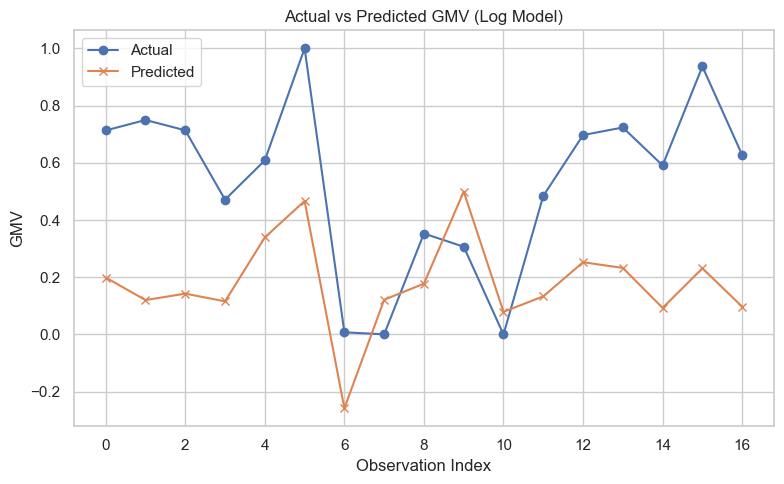

In [361]:
# Visualizing the RMSE score for a comprehensive view

plt.figure(figsize=(8, 5))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title("Actual vs Predicted GMV (Log Model)")
plt.xlabel("Observation Index")
plt.ylabel("GMV")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### 3. Multiplicative Model

In [363]:
ga_week.columns

Index(['week', 'gmv', 'listing_price', 'product_mrp', 'discount', 'sla', 'product_procurement_sla', 'fsn_id', 'order_payment_type', 'online_order_perc', 'index', 'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)', 'Total Rain (mm)', 'Total Snow (cm)', 'Snow on Grnd (cm)', 'Year', 'Month', 'Adstocked_Advertising', 'TV_ads', 'Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads', 'Date', 'MA2_listed_price', 'MA2_discount', 'MA4_discount', 'lag_1_listed_price', 'lag_2_listed_price', 'lag_3_listed_price', 'lag_1_discount_offer', 'lag_2_discount_offer', 'lag_3_discount_offer', 'lag_1_NPS', 'lag_2_NPS', 'lag_3_NPS', 'lag_1_Stock_Index', 'lag_2_Stock_Index', 'lag_3_Stock_Index', 'lag_1_Special_sales', 'lag_2_Special_sales', 'lag_3_Special_sales', 'lag_1_Payday', 'lag_2_Payday', 'lag_3_Payday'], dtype='object')

In [364]:
gaming_mm = ga_week[['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)',
       'Total Rain (mm)', 'Total Snow (cm)','Snow on Grnd (cm)']]

gaming_mm.head()

,gmv,discount,sla,product_procurement_sla,order_payment_type,online_order_perc,TV_ads,Sponsorship_ads,Content_marketing_ads,Online_marketing_ads,NPS,Stock_Index,Special_sales,Payday,Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Snow on Grnd (cm)
0,17466.000,0.220,2.960,2.560,25,100.000,0.000,0.000,0.000,0.000,54.600,1177.000,0.000,0.200,0.100,1.460,0.000,0.000,0.000
1,1395022.000,0.412,5.055,3.026,678,26.289,0.000,0.000,0.000,0.000,54.600,1177.000,0.000,0.000,1.059,2.322,4.155,0.029,0.000
2,1081512.359,0.428,5.078,2.516,534,22.579,0.000,0.000,0.000,0.000,54.600,1177.000,0.286,0.143,0.816,4.722,1.569,0.029,0.000
3,1127209.000,0.352,5.149,2.328,419,20.960,0.000,0.000,0.000,0.000,54.600,1177.000,0.000,0.000,1.632,4.172,1.141,0.029,0.000
4,725030.000,0.361,5.441,2.328,241,18.843,0.000,0.000,0.000,0.000,56.139,1185.286,0.000,0.143,0.816,5.908,4.341,0.029,0.000


In [365]:
### Applying Log

gaming_mm=np.log(gaming_mm)

gaming_mm = gaming_mm.fillna(0)
gaming_mm = gaming_mm.replace([np.inf, -np.inf], 0)

In [366]:
gaming_mm.head()

,gmv,discount,sla,product_procurement_sla,order_payment_type,online_order_perc,TV_ads,Sponsorship_ads,Content_marketing_ads,Online_marketing_ads,NPS,Stock_Index,Special_sales,Payday,Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Snow on Grnd (cm)
0,9.768,-1.516,1.085,0.940,3.219,4.605,0.000,0.000,0.000,0.000,4.000,7.071,0.000,-1.609,-2.303,0.378,0.000,0.000,0.000
1,14.148,-0.886,1.620,1.107,6.519,3.269,0.000,0.000,0.000,0.000,4.000,7.071,0.000,0.000,0.057,0.842,1.424,-3.532,0.000
2,13.894,-0.848,1.625,0.923,6.280,3.117,0.000,0.000,0.000,0.000,4.000,7.071,-1.253,-1.946,-0.203,1.552,0.451,-3.532,0.000
3,13.935,-1.045,1.639,0.845,6.038,3.043,0.000,0.000,0.000,0.000,4.000,7.071,0.000,0.000,0.490,1.428,0.131,-3.532,0.000
4,13.494,-1.019,1.694,0.845,5.485,2.936,0.000,0.000,0.000,0.000,4.028,7.078,0.000,-1.946,-0.203,1.776,1.468,-3.532,0.000


In [367]:
# Scaling the dataset

scaler = MinMaxScaler()

# Creating a list of the variables that you need to scale
varlist = ['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)',
       'Total Rain (mm)', 'Total Snow (cm)','Snow on Grnd (cm)']

### Scaling these variables using 'fit_transform'
gaming_mm[varlist] = scaler.fit_transform(gaming_mm[varlist])

In [368]:
# Splitting the train dataset into X and y

x = gaming_mm.drop('gmv',axis=1)
y = gaming_mm['gmv']

gaming_train_mm = gaming_mm

In [369]:
print("X = Independent variable & Y = Target variable")
print(x.shape,y.shape)

X = Independent variable & Y = Target variable
(54, 18) (54,)


In [370]:
### Instantiate
mm = LinearRegression()

### Fit a line
mm.fit(x,y)

LinearRegression()

In [371]:
### Coefficient values

coef = pd.DataFrame(x.columns)
coef['Coefficient'] = pd.Series(mm.coef_)
coef

,0,Coefficient
0,discount,-0.199
1,sla,0.141
2,product_procurement_sla,0.037
3,order_payment_type,1.343
4,online_order_perc,-0.534
5,TV_ads,0.000
6,Sponsorship_ads,0.000
7,Content_marketing_ads,-0.000
8,Online_marketing_ads,0.000
9,NPS,-0.658


In [372]:
col = x.columns
col

Index(['discount', 'sla', 'product_procurement_sla', 'order_payment_type', 'online_order_perc', 'TV_ads', 'Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads', 'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)', 'Total Rain (mm)', 'Total Snow (cm)', 'Snow on Grnd (cm)'], dtype='object')

In [373]:
# Creating elasticity

df = pd.DataFrame({
    'Feature': ['discount', 'sla', 'product_procurement_sla', 'order_payment_type', 'online_order_perc', 'NPS', 'Stock_Index', 'Special_sales', 'Payday'],
    'Elasticity': [-0.199, 0.141, 0.037, 1.343, -0.534, -0.658, 0.675, 0.017, 0.003]
})

df = df.round(3)
df.sort_values(by='Elasticity', ascending=False, inplace=True)


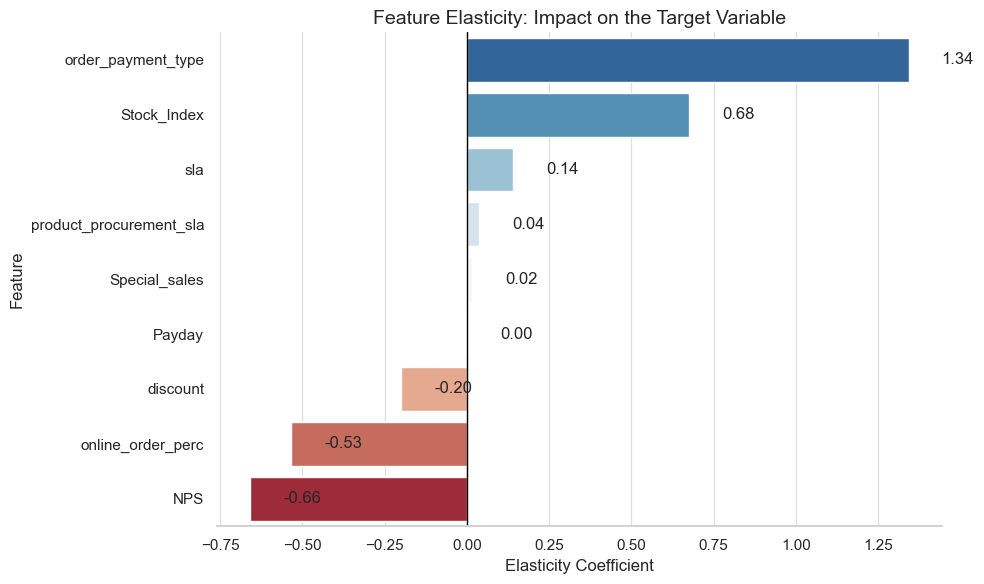

In [374]:
# Visualizing the elasticity
plt.figure(figsize=(10, 6))
sns.barplot(y='Feature', x='Elasticity', data=df, palette='RdBu_r')
plt.title('Feature Elasticity: Impact on the Target Variable', fontsize=14)
plt.xlabel('Elasticity Coefficient', fontsize=12)
plt.ylabel('Feature', fontsize=12)
for index, value in enumerate(df['Elasticity']):
    plt.text(value + 0.1, index, f'{value:.2f}', va='center')
plt.axvline(0, color='black', linewidth=1)
plt.grid(axis='x', linestyle='-', alpha=0.6)
sns.despine(left=True)
plt.tight_layout()
plt.show()


##### Multiplicative Model

##### The bar chart displays the elasticity of various features in a multiplicative model. Positive elasticity indicates that a one percent increase in the feature leads to a greater than one percent increase in the target variable, while negative elasticity suggests the opposite.

##### 'order_payment_type' shows the highest positive impact, meaning changes in payment methods strongly influence the target. 'Stock_Index' and 'sla' also have positive elasticities. Conversely, 'NPS', 'online_order_perc', and 'discount' exhibit negative elasticities, implying that increases in these features are associated with a decrease in the target variable. The remaining features have relatively small elasticities close to zero.

### Model Building - Home Audio Accessory

#### 1. Linear/Basic Model





In [377]:
ha_week.columns

Index(['week', 'gmv', 'listing_price', 'product_mrp', 'discount', 'sla', 'product_procurement_sla', 'fsn_id', 'order_payment_type', 'online_order_perc', 'index', 'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)', 'Total Rain (mm)', 'Total Snow (cm)', 'Snow on Grnd (cm)', 'Year', 'Month', 'Adstocked_Advertising', 'TV_ads', 'Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads', 'Date', 'MA2_listed_price', 'MA4_listed_price', 'MA2_discount', 'MA4_discount', 'lag_1_listed_price', 'lag_2_listed_price', 'lag_3_listed_price', 'lag_1_discount_offer', 'lag_2_discount_offer', 'lag_3_discount_offer', 'lag_1_NPS', 'lag_2_NPS', 'lag_3_NPS', 'lag_1_Stock_Index', 'lag_2_Stock_Index', 'lag_3_Stock_Index', 'lag_1_Special_sales', 'lag_2_Special_sales', 'lag_3_Special_sales', 'lag_1_Payday', 'lag_2_Payday', 'lag_3_Payday'], dtype='object')

In [378]:
home_audio_lm = ha_week[['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)',
       'Total Rain (mm)', 'Total Snow (cm)','Snow on Grnd (cm)', 'MA4_listed_price']]


home_audio_lm.head(2)

,gmv,discount,sla,product_procurement_sla,order_payment_type,online_order_perc,TV_ads,Sponsorship_ads,Content_marketing_ads,Online_marketing_ads,NPS,Stock_Index,Special_sales,Payday,Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Snow on Grnd (cm),MA4_listed_price
0,83742.000,0.397,2.943,3.486,34,97.143,0.000,0.000,0.000,0.000,54.600,1177.000,0.000,0.200,0.100,1.460,0.000,0.000,0.000,0.000
1,3438794.133,0.322,6.884,2.736,439,23.743,0.000,0.000,0.000,0.000,54.600,1177.000,0.000,0.000,1.059,2.322,4.155,0.029,0.000,-0.127


In [379]:
### Checking for any NaN value

home_audio_lm.isnull().sum()

gmv                        0
discount                   0
sla                        0
product_procurement_sla    0
order_payment_type         0
online_order_perc          0
TV_ads                     0
Sponsorship_ads            0
Content_marketing_ads      0
Online_marketing_ads       0
NPS                        0
Stock_Index                0
Special_sales              0
Payday                     0
Heat Deg Days (°C)         0
Cool Deg Days (°C)         0
Total Rain (mm)            0
Total Snow (cm)            0
Snow on Grnd (cm)          0
MA4_listed_price           0
dtype: int64

In [380]:
# Splitting the train and test dataset

np.random.seed(0)
df_train, df_test = train_test_split(home_audio_lm, train_size = 0.7, test_size = 0.3, random_state = 100)

In [381]:
### Creating scaling object

scaler = MinMaxScaler()


### Creating a list of the variables that you need to scale
varlist = ['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)',
       'Total Rain (mm)', 'Total Snow (cm)','Snow on Grnd (cm)', 'MA4_listed_price']

### Scaling these variables using 'fit_transform'
df_train[varlist] = scaler.fit_transform(df_train[varlist])

In [382]:
df_train.head()

,gmv,discount,sla,product_procurement_sla,order_payment_type,online_order_perc,TV_ads,Sponsorship_ads,Content_marketing_ads,Online_marketing_ads,NPS,Stock_Index,Special_sales,Payday,Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Snow on Grnd (cm),MA4_listed_price
25,0.572,0.718,0.480,0.514,0.298,0.163,0.000,0.000,0.000,0.000,0.230,0.164,0.429,0.000,0.416,0.331,0.121,0.079,0.000,0.545
26,0.376,0.493,0.540,0.704,0.167,0.096,0.000,0.000,0.000,0.000,0.230,0.164,0.000,0.000,0.587,0.283,0.121,0.079,0.000,0.519
35,0.258,0.304,0.492,0.638,0.538,0.919,0.000,0.000,0.000,0.000,0.496,0.432,0.000,1.000,0.877,0.000,0.229,0.345,0.000,0.570
17,0.287,0.223,0.796,0.438,0.156,0.133,0.000,0.000,0.000,0.000,0.222,0.969,0.000,0.000,0.471,0.283,0.302,0.079,0.000,0.506
7,0.226,0.350,0.762,0.662,0.173,0.191,0.000,0.000,0.000,0.000,0.215,0.382,0.000,1.000,0.277,0.360,0.075,0.039,0.000,0.503


In [383]:
### Splitting the train dataset into X and y

X_train = df_train.drop('gmv',axis=1)
y_train = df_train['gmv']

In [384]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(estimator=lm, n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)

In [385]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('discount', True, 1),
 ('sla', True, 1),
 ('product_procurement_sla', True, 1),
 ('order_payment_type', True, 1),
 ('online_order_perc', True, 1),
 ('TV_ads', False, 7),
 ('Sponsorship_ads', False, 9),
 ('Content_marketing_ads', False, 10),
 ('Online_marketing_ads', False, 8),
 ('NPS', True, 1),
 ('Stock_Index', True, 1),
 ('Special_sales', True, 1),
 ('Payday', False, 4),
 ('Heat Deg Days (°C)', False, 5),
 ('Cool Deg Days (°C)', True, 1),
 ('Total Rain (mm)', False, 3),
 ('Total Snow (cm)', False, 6),
 ('Snow on Grnd (cm)', False, 2),
 ('MA4_listed_price', True, 1)]

In [386]:
X_train.columns[rfe.support_]

Index(['discount', 'sla', 'product_procurement_sla', 'order_payment_type', 'online_order_perc', 'NPS', 'Stock_Index', 'Special_sales', 'Cool Deg Days (°C)', 'MA4_listed_price'], dtype='object')

In [387]:
# Building model with statsmodel

X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,discount,sla,product_procurement_sla,order_payment_type,online_order_perc,NPS,Stock_Index,Special_sales,Cool Deg Days (°C),MA4_listed_price
25,0.718,0.480,0.514,0.298,0.163,0.230,0.164,0.429,0.331,0.545
26,0.493,0.540,0.704,0.167,0.096,0.230,0.164,0.000,0.283,0.519
35,0.304,0.492,0.638,0.538,0.919,0.496,0.432,0.000,0.000,0.570
17,0.223,0.796,0.438,0.156,0.133,0.222,0.969,0.000,0.283,0.506
7,0.350,0.762,0.662,0.173,0.191,0.215,0.382,0.000,0.360,0.503


In [388]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X

def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [389]:
# Model 1

X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     48.34
Date:                Sun, 18 May 2025   Prob (F-statistic):           1.91e-13
Time:                        11:31:28   Log-Likelihood:                 57.685
No. Observations:                  35   AIC:                            -93.37
Df Residuals:                      24   BIC:                            -76.26
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [390]:
# Checking VIF

checkVIF(X_train_new)

,Features,VIF
0,const,69.630
4,order_payment_type,10.030
5,online_order_perc,9.630
1,discount,7.530
6,NPS,4.530
9,Cool Deg Days (°C),4.340
10,MA4_listed_price,3.250
2,sla,1.970
3,product_procurement_sla,1.930
7,Stock_Index,1.710


In [391]:
# Dropping columns to adjust the VIF

X_train_new = X_train_rfe.drop(["order_payment_type"], axis = 1)

In [392]:
# Model 2

X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     17.23
Date:                Sun, 18 May 2025   Prob (F-statistic):           1.24e-08
Time:                        11:31:28   Log-Likelihood:                 38.840
No. Observations:                  35   AIC:                            -57.68
Df Residuals:                      25   BIC:                            -42.13
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [393]:
# Checking VIF once again

checkVIF(X_train_new)

,Features,VIF
0,const,68.070
5,NPS,4.520
8,Cool Deg Days (°C),4.250
9,MA4_listed_price,3.230
1,discount,3.090
2,sla,1.840
4,online_order_perc,1.760
3,product_procurement_sla,1.720
6,Stock_Index,1.590
7,Special_sales,1.550


In [394]:
# So we can see that all the parameters have VIF less than 5, so we can move on to Residual Analysis of Model

lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

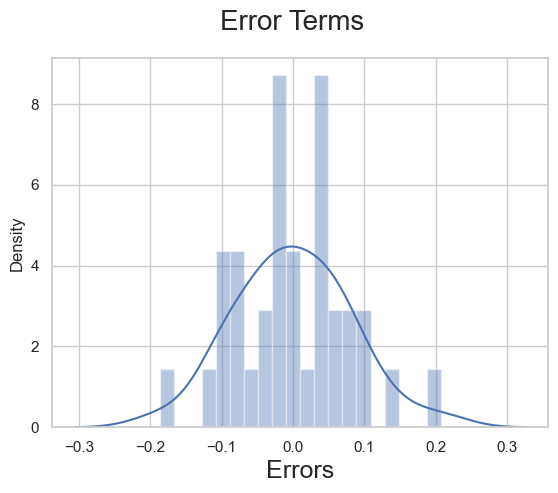

In [395]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)

##### Error curve looks like an approximate normal distribution, so the assumption on the linear modeling seems to be fulfilled.bold text

In [397]:
# Prediction and Evaluation

#Scaling the test set
num_vars = ['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)',
              'Total Rain (mm)', 'Total Snow (cm)','Snow on Grnd (cm)', 'MA4_listed_price']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [398]:
#Dividing into X and y
y_test = df_test.pop('gmv')
X_test = df_test

In [399]:
# Now let's use our model to make predictions.
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable
X_test_new = sm.add_constant(X_test_new)

In [400]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [401]:
r2_score(y_test, y_pred)

-3.214203053432599

Text(0, 0.5, 'y_pred')

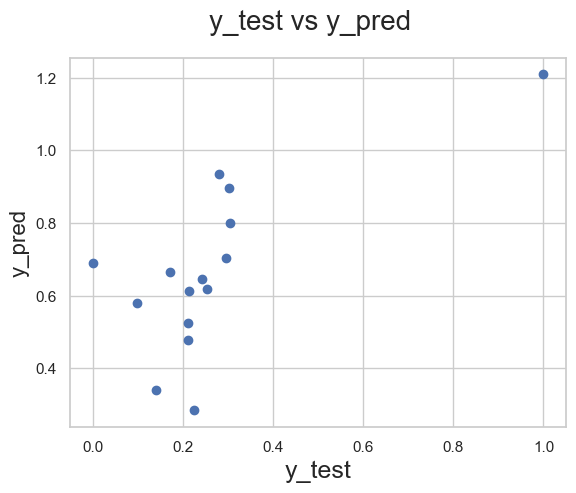

In [402]:
# Plotting y_test and y_pred to understand the spread.

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

##### The scatter plot compares the true values (y_test) against the predicted values (y_pred). Most points are clustered in the bottom-left, indicating a tendency for the model to predict lower values. There's one outlier with a high true value but also a high prediction. The spread suggests the model has difficulty accurately predicting across the entire range of true values.

In [404]:
#Evaluation of the model statistics

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     17.23
Date:                Sun, 18 May 2025   Prob (F-statistic):           1.24e-08
Time:                        11:31:29   Log-Likelihood:                 38.840
No. Observations:                  35   AIC:                            -57.68
Df Residuals:                      25   BIC:                            -42.13
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

##### Model Summary

##### The model explains approximately 86.1% of the variation in GMV, indicating a strong fit. Significant predictors include discount, product_procurement_sla, and NPS, suggesting they have notable influence on sales. Most variables are within expected ranges, and diagnostic tests show no major violations of regression assumptions.

### 2. Logarithmic Model

In [407]:
# Log transform target

y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

In [408]:
# Training the model

lr = LinearRegression()
lr.fit(X_train, y_train_log)

LinearRegression()

In [409]:
# Predicting on test

y_pred_log = lr.predict(X_test)

In [410]:
# Converting prediction back to original scale

y_pred = np.expm1(y_pred_log)

In [411]:
# Evaluating

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE (on original scale): {rmse:.4f}")

RMSE (on original scale): 0.5630


##### Model Summary

##### The RMSE of 0.5630 indicates a moderate average deviation between the predicted and actual GMV values, suggesting the model performs reasonably well in capturing the underlying trend.

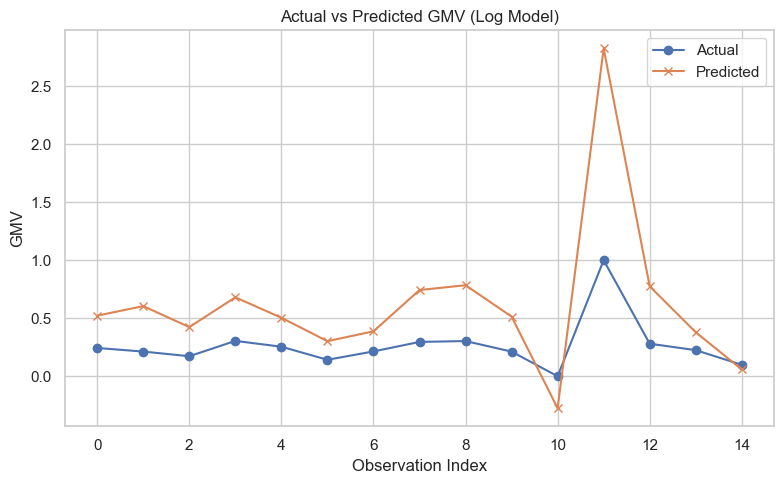

In [413]:
# Visualizing the RMSE score for a comprehensive view

plt.figure(figsize=(8, 5))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title("Actual vs Predicted GMV (Log Model)")
plt.xlabel("Observation Index")
plt.ylabel("GMV")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### 3. Multiplicative Model

In [415]:
ha_week.columns

Index(['week', 'gmv', 'listing_price', 'product_mrp', 'discount', 'sla', 'product_procurement_sla', 'fsn_id', 'order_payment_type', 'online_order_perc', 'index', 'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)', 'Total Rain (mm)', 'Total Snow (cm)', 'Snow on Grnd (cm)', 'Year', 'Month', 'Adstocked_Advertising', 'TV_ads', 'Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads', 'Date', 'MA2_listed_price', 'MA4_listed_price', 'MA2_discount', 'MA4_discount', 'lag_1_listed_price', 'lag_2_listed_price', 'lag_3_listed_price', 'lag_1_discount_offer', 'lag_2_discount_offer', 'lag_3_discount_offer', 'lag_1_NPS', 'lag_2_NPS', 'lag_3_NPS', 'lag_1_Stock_Index', 'lag_2_Stock_Index', 'lag_3_Stock_Index', 'lag_1_Special_sales', 'lag_2_Special_sales', 'lag_3_Special_sales', 'lag_1_Payday', 'lag_2_Payday', 'lag_3_Payday'], dtype='object')

In [416]:
home_audio_mm = ha_week[['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)',
       'Total Rain (mm)', 'Total Snow (cm)','Snow on Grnd (cm)','MA4_listed_price']]

home_audio_mm.head()

,gmv,discount,sla,product_procurement_sla,order_payment_type,online_order_perc,TV_ads,Sponsorship_ads,Content_marketing_ads,Online_marketing_ads,NPS,Stock_Index,Special_sales,Payday,Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Snow on Grnd (cm),MA4_listed_price
0,83742.000,0.397,2.943,3.486,34,97.143,0.000,0.000,0.000,0.000,54.600,1177.000,0.000,0.200,0.100,1.460,0.000,0.000,0.000,0.000
1,3438794.133,0.322,6.884,2.736,439,23.743,0.000,0.000,0.000,0.000,54.600,1177.000,0.000,0.000,1.059,2.322,4.155,0.029,0.000,-0.127
2,4080736.000,0.338,6.747,2.658,511,23.133,0.000,0.000,0.000,0.000,54.600,1177.000,0.286,0.143,0.816,4.722,1.569,0.029,0.000,-0.092
3,3712901.000,0.325,6.892,2.760,434,20.865,0.000,0.000,0.000,0.000,54.600,1177.000,0.000,0.000,1.632,4.172,1.141,0.029,0.000,-0.097
4,2618227.000,0.324,6.962,2.654,314,21.836,0.000,0.000,0.000,0.000,56.139,1185.286,0.000,0.143,0.816,5.908,4.341,0.029,0.000,-0.004


In [417]:
### Applying Log
home_audio_mm=np.log(home_audio_mm)

home_audio_mm = home_audio_mm.fillna(0)
home_audio_mm = home_audio_mm.replace([np.inf, -np.inf], 0)

In [418]:
home_audio_mm.head()

,gmv,discount,sla,product_procurement_sla,order_payment_type,online_order_perc,TV_ads,Sponsorship_ads,Content_marketing_ads,Online_marketing_ads,NPS,Stock_Index,Special_sales,Payday,Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Snow on Grnd (cm),MA4_listed_price
0,11.335,-0.923,1.079,1.249,3.526,4.576,0.000,0.000,0.000,0.000,4.000,7.071,0.000,-1.609,-2.303,0.378,0.000,0.000,0.000,0.000
1,15.051,-1.133,1.929,1.007,6.084,3.167,0.000,0.000,0.000,0.000,4.000,7.071,0.000,0.000,0.057,0.842,1.424,-3.532,0.000,0.000
2,15.222,-1.086,1.909,0.977,6.236,3.141,0.000,0.000,0.000,0.000,4.000,7.071,-1.253,-1.946,-0.203,1.552,0.451,-3.532,0.000,0.000
3,15.127,-1.123,1.930,1.015,6.073,3.038,0.000,0.000,0.000,0.000,4.000,7.071,0.000,0.000,0.490,1.428,0.131,-3.532,0.000,0.000
4,14.778,-1.128,1.941,0.976,5.749,3.084,0.000,0.000,0.000,0.000,4.028,7.078,0.000,-1.946,-0.203,1.776,1.468,-3.532,0.000,0.000


In [419]:
# Scaling the dataset

scaler = MinMaxScaler()

# Creating a list of the variables that you need to scale
varlist = ['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)',
       'Total Rain (mm)', 'Total Snow (cm)','Snow on Grnd (cm)', 'MA4_listed_price']

### Scaling these variables using 'fit_transform'
home_audio_mm[varlist] = scaler.fit_transform(home_audio_mm[varlist])

In [420]:
# Splitting the train dataset into X and y

x = home_audio_mm.drop('gmv',axis=1)
y = home_audio_mm['gmv']

home_audio_train_mm = home_audio_mm

In [421]:
print("X = Independent variable & Y = Target variable")
print(x.shape,y.shape)

X = Independent variable & Y = Target variable
(50, 19) (50,)


In [422]:
### Instantiate
mm = LinearRegression()

### Fit a line
mm.fit(x,y)

LinearRegression()

In [423]:
### Coefficient values

coef = pd.DataFrame(x.columns)
coef['Coefficient'] = pd.Series(mm.coef_)
coef

,0,Coefficient
0,discount,0.023
1,sla,-0.046
2,product_procurement_sla,0.001
3,order_payment_type,0.768
4,online_order_perc,-0.379
5,TV_ads,-0.000
6,Sponsorship_ads,0.000
7,Content_marketing_ads,-0.000
8,Online_marketing_ads,0.000
9,NPS,0.060


In [424]:
# Creating elasticity

df = pd.DataFrame({
    'Feature': ['discount', 'sla', 'product_procurement_sla', 'order_payment_type', 'online_order_perc', 'NPS', 'Stock_Index', 'Special_sales', 'Payday'],
    'Elasticity': [0.023, -0.046, 0.001, 0.768, -0.379, -1.966, 0.060, -0.076, 0.002]
})

df = df.round(3)
df.sort_values(by='Elasticity', ascending=False, inplace=True)


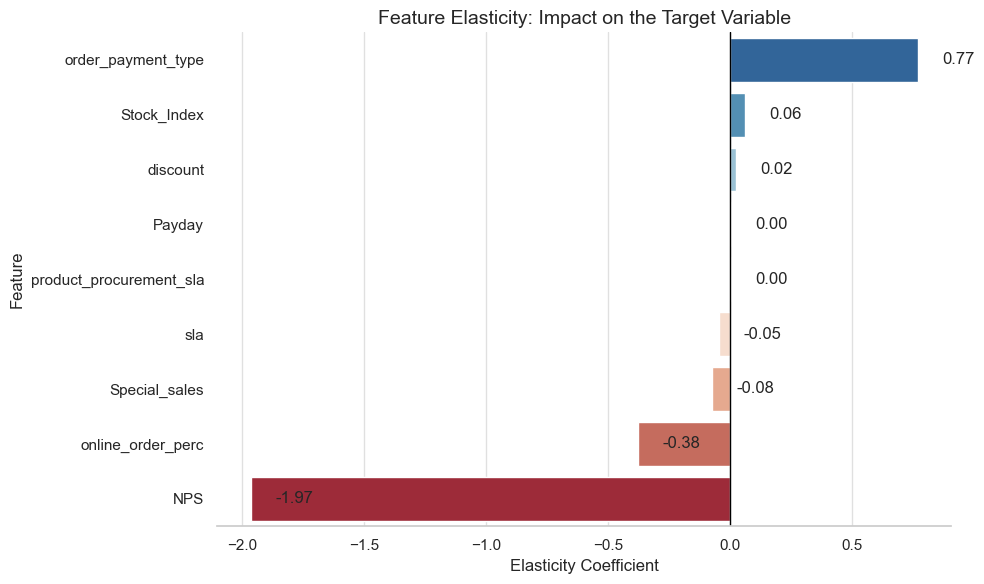

In [425]:
# Visualizing the price elasticity

plt.figure(figsize=(10, 6))
sns.barplot(y='Feature', x='Elasticity', data=df, palette='RdBu_r')
plt.title('Feature Elasticity: Impact on the Target Variable', fontsize=14)
plt.xlabel('Elasticity Coefficient', fontsize=12)
plt.ylabel('Feature', fontsize=12)
for index, value in enumerate(df['Elasticity']):
    plt.text(value + 0.1, index, f'{value:.2f}', va='center')
plt.axvline(0, color='black', linewidth=1)
plt.grid(axis='x', linestyle='-', alpha=0.6)
sns.despine(left=True)
plt.tight_layout()
plt.show()

##### Model Summary

##### The bar chart illustrates the elasticity of different features within a multiplicative model. 'order_payment_type' exhibits the strongest positive elasticity, suggesting that a 1% increase in this feature leads to a greater than 1% increase in the target variable. Conversely, 'NPS' shows the most substantial negative elasticity, indicating that a 1% rise in NPS is associated with a more than 1% decrease in the target. 'online_order_perc', 'Special_sales', and 'sla' also have negative elasticities. 'Stock_Index' and 'discount' show minor positive elasticities, while 'Payday' and 'product_procurement_sla' have negligible impacts.

# Step 7: Conclusion
### ElecKart's Marketing Mix Model offers a clear, data-driven understanding of their sales performance. Key insights include:

#### Quantified impact of individual marketing channels and promotions.
#### Identification of high- and low-performing marketing channels through elasticity analysis.
#### Incorporation of non-marketing factors like pricing, discounts, NPS, payment, and macroeconomics.
#### Data-backed recommendations for optimal marketing budget allocation based on ROI.
#### Strategic guidance on marketing spend, channel mix, pricing, promotions, and NPS improvement.
#### Potential for revenue growth through operational enhancements like payment method optimization.
#### This MMM empowers ElecKart to strategically manage their marketing investments, improve efficiency, and drive revenue growth based on solid data.